# Исследование объявлений о продаже квартир

Цель исследования - установить параметры для определения рыночной стоимости объектов недвижимости, основываясь на данных сервиса Яндекс.Недвижимость - архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Это позволит построить автоматизированную систему, которая сможет отслеживать аномалии и мошенническую деятельность.


Исследование пройдёт в пять этапов: <a name="0"> </a>

1. [Обзор данных](#1)

Произведем первичный обзор данных из файла real_estate.csv. При обзоре будет совершена проверка на возможные ошибки, которые могут помещать исследованию.

2. [Предобработка данных](#2)

После обзора данных будет совершена их предобработка с целью исправления ошибок и обработки пропущенных значений, при необходимости буду изменены типы данных.

3. [Расчёт дополнительных параметров](#3)

На основе обработанных данных будут расчитаны дополнительные параметры, которые помогут в работе на следующем этапе.

4. [Исследовательский анализ данных](#4)

Проведем исследовательский анализ для понимания распределения данных в датасете.

5. [Общий вывод](#5)

Общий вывод по проделанной работе и полученным наблюдениям.

<a name="1"> </a>

### Обзор данных. 

In [1]:
# Сперва импортируем необходимые для работы библиотеки:

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import warnings

sns.set_theme(style="darkgrid")
warnings.filterwarnings("ignore")
os.chdir('C:\\Users\\79771\\Documents\\GitHub\\yandex_practicum_projects\\datasets')

In [2]:
# изменим написание типа данных float для улучшения читаемости:
pd.options.display.float_format = '{:.2f}'.format

# Выведем на экран 10 случайных строк датасета, информацию о нем и количество пропусков в столбцах:
raw_data = pd.read_csv('real_estate_data.csv', sep='\t', decimal='.')
display(raw_data.sample(10, random_state=0).T)
raw_data.info()
raw_data.isna().sum()

4631                 17913  \
total_images                            2                   15   
last_price                     7570000.00           2490000.00   
total_area                          67.00                30.20   
first_day_exposition  2017-11-10T00:00:00  2018-11-06T00:00:00   
rooms                                   2                    1   
ceiling_height                        NaN                 2.50   
floors_total                        25.00                 5.00   
living_area                         29.00                16.60   
floor                                   2                    5   
is_apartment                          NaN                  NaN   
studio                              False                False   
open_plan                           False                False   
kitchen_area                        18.00                 5.50   
balcony                              2.00                  NaN   
locality_name             Санкт-Петербург            Кронштадт   
airports_nearest                  7711.00             67816.00   
cityCenters_nearest              13845.00             49542.00   
parks_around3000                     1.00                 2.00   
parks_nearest                     1326.00               445.00   
ponds_around3000                     0.00                 2.00   
ponds_nearest                         NaN               387.00   
days_exposition                     60.00                32.00   

                                    21278                22608  \
total_images                            8                    9   
last_price                     2850000.00           8580000.00   
total_area                          54.00                94.00   
first_day_exposition  2016-01-26T00:00:00  2017-11-02T00:00:00   
rooms                                   2                    4   
ceiling_height                        NaN                 2.80   
floors_total                         5.00                 6.00   
living_area                         32.00                61.35   
floor                                   5                    2   
is_apartment                          NaN                  NaN   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         9.00                10.43   
balcony                              0.00                  NaN   
locality_name                      Выборг      Санкт-Петербург   
airports_nearest                      NaN             22562.00   
cityCenters_nearest                   NaN              3828.00   
parks_around3000                      NaN                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                      NaN                 1.00   
ponds_nearest                         NaN               627.00   
days_exposition                    467.00                52.00   

                                    2606                 8120   \
total_images                           11                   10   
last_price                    12000000.00           1990000.00   
total_area                          84.68                56.50   
first_day_exposition  2017-06-19T00:00:00  2018-07-10T00:00:00   
rooms                                   2                    3   
ceiling_height                        NaN                  NaN   
floors_total                         9.00                 4.00   
living_area                         45.40                28.40   
floor                                   8                    2   
is_apartment                          NaN                  NaN   
studio                              False                False   
open_plan                           False                False   
kitchen_area                        16.40                 5.30   
balcony                              0.00                  NaN   
locality

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('missing values percentage' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

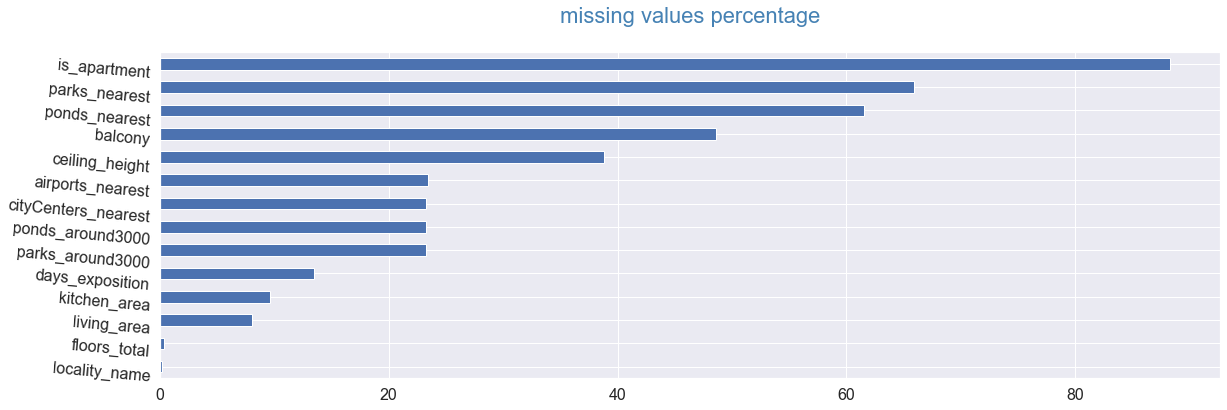

In [5]:
pass_value_barh(raw_data)

total_images   last_price  total_area    rooms  ceiling_height  \
count      23699.00     23699.00    23699.00 23699.00        14504.00   
mean           9.86   6541548.77       60.35     2.07            2.77   
std            5.68  10887013.27       35.65     1.08            1.26   
min            0.00     12190.00       12.00     0.00            1.00   
25%            6.00   3400000.00       40.00     1.00            2.52   
50%            9.00   4650000.00       52.00     2.00            2.65   
75%           14.00   6800000.00       69.90     3.00            2.80   
max           50.00 763000000.00      900.00    19.00          100.00   

       floors_total  living_area    floor  kitchen_area  balcony  \
count      23613.00     21796.00 23699.00      21421.00 12180.00   
mean          10.67        34.46     5.89         10.57     1.15   
std            6.60        22.03     4.89          5.91     1.07   
min            1.00         2.00     1.00          1.30     0.00   
25%            5.00        18.60     2.00          7.00     0.00   
50%            9.00        30.00     4.00          9.10     1.00   
75%           16.00        42.30     8.00         12.00     2.00   
max           60.00       409.70    33.00        112.00     5.00   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count          18157.00             18180.00          18181.00        8079.00   
mean           28793.67             14191.28              0.61         490.80   
std            12630.88              8608.39              0.80         342.32   
min                0.00               181.00              0.00           1.00   
25%            18585.00              9238.00              0.00         288.00   
50%            26726.00             13098.50              0.00         455.00   
75%            37273.00             16293.00              1.00         612.00   
max            84869.00             65968.00              3.00        3190.00   

       ponds_around3000  ponds_nearest  days_exposition  
count          18181.00        9110.00         20518.00  
mean               0.77         517.98           180.89  
std                0.94         277.72           219.73  
min                0.00          13.00             1.00  
25%                0.00         294.00            45.00  
50%                1.00         502.00            95.00  
75%                1.00         729.00           232.00  
max                3.00        1344.00          1580.00

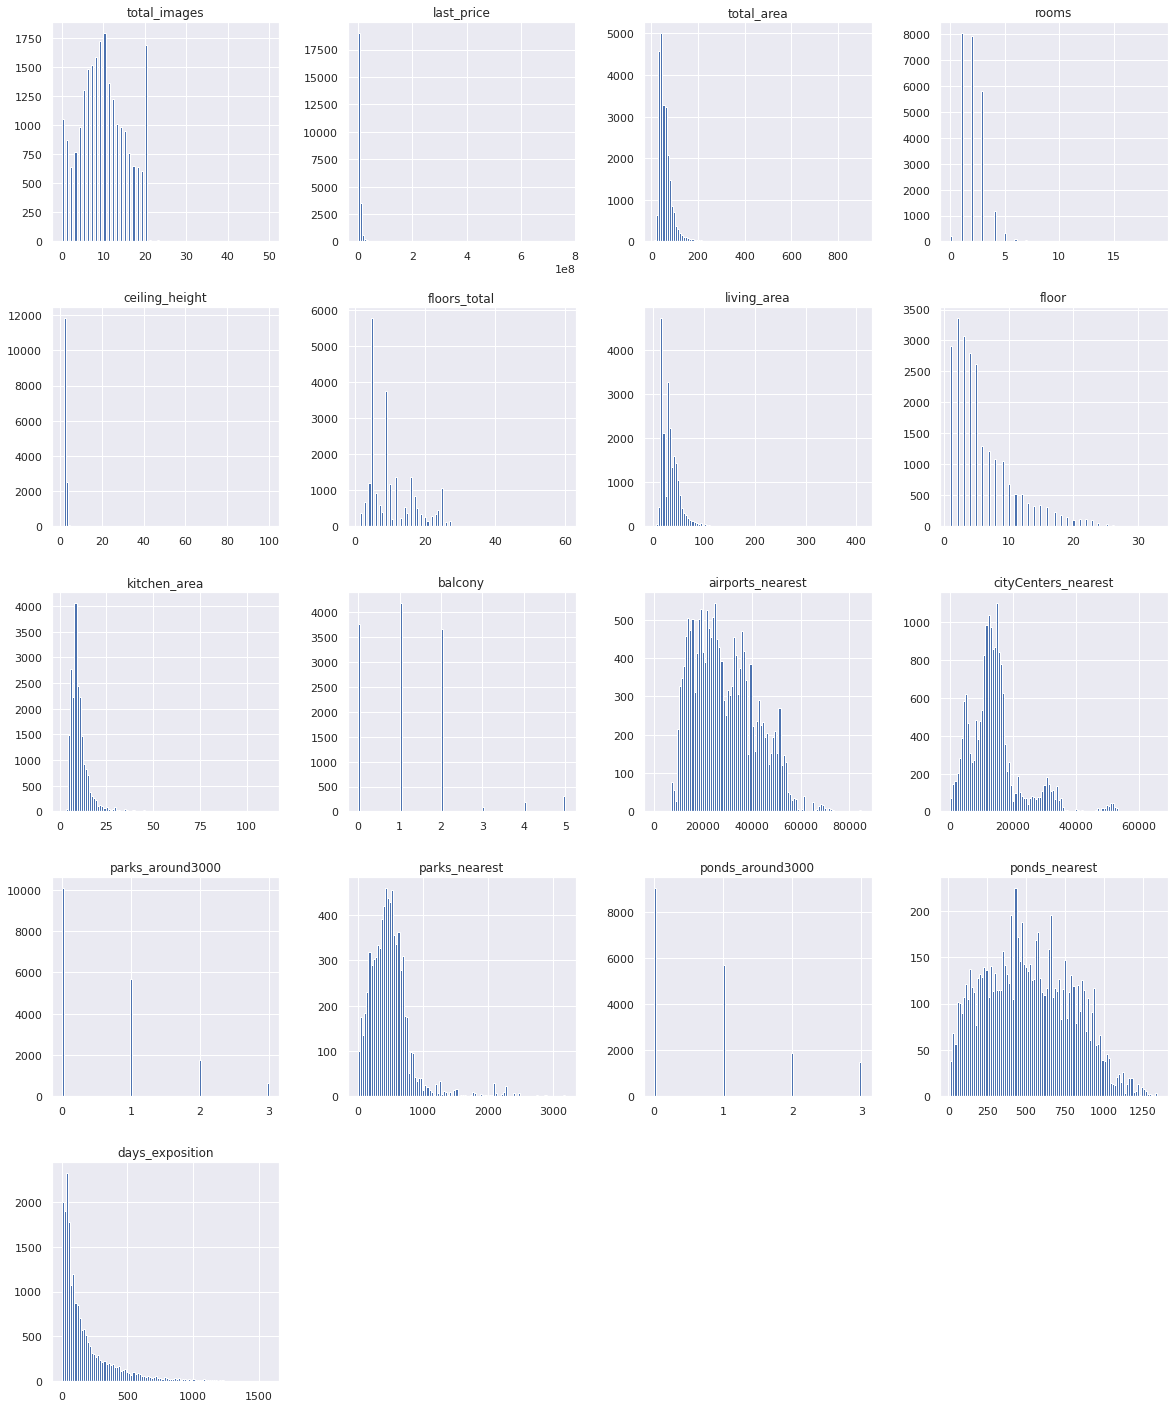

In [5]:
# Выводим первичное описание значений каждого столбца и гистограммы:
display(raw_data.describe())
raw_data.hist(bins=100, figsize=(20,25))
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

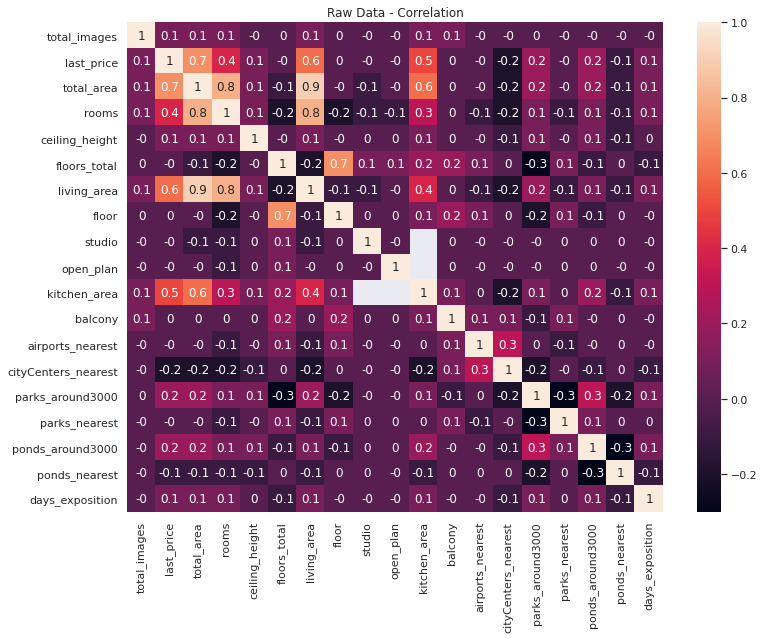

In [6]:
# Первичные корреляции и их визуализация через heatmap:
plt.figure(figsize=(12,9))
sns.heatmap(round(raw_data.corr(), 1), annot=True)
plt.title('Raw Data - Correlation')
plt.show()

#### Общая информация - Выводы:

---

- Больше половины столбцов содержат пропущенные значения.
- Некоторые столбцы содержат аномальные значения - например, минимальные значения столбцов last_price, rooms, airports_nearest и максимальные значения kitchen_area и balcony.
- Большинство указанных типов данных можно изменить с float64/int64 на float32/int32 или float16/int16 без потери диапазона значений столбцов, при этом сэкономить занимаемую память.
- Согласно документации, столбец first_day_exposition должен содержать даты публикации объявления, но данные сохранены как object.
- Столбец is_apartment, согласно документации, должен содержать булев тип данных, но из-за пропущенных значений данные отображаются как object.

---

<a name="2"> </a>
### Предобработка данных

[Вернуться в оглавление](#0)

In [7]:
# Обьявляем filt_data и обьявим три функии для работы с пропусками и оценкой значений:
filt_data = raw_data


def min_max_info(col_name, bins=100):
    
    '''Функция для вывода минимальных и максимальных значений 
       cтолбцов с пропущенными данными'''
    
    # 10 самых распространенных значений в столбце
    
    top_5 = (
              filt_data[col_name]
              .value_counts()
              .sort_values(ascending=False)
              .head()
             ) 
    
    # 10 самых редких значений в столбце
    
    top_5_r = (
                filt_data[col_name]
                .value_counts()
                .sort_values()
                .head() 
               )
    
    print(filt_data[col_name].describe(datetime_is_numeric=True), '\n')
    print('5 самых распространенных значений в столбце: \n')
    print(top_5, '\n')
    print('5 самых редких значений в столбце: \n')
    print(top_5_r, '\n')
    filt_data[col_name].hist(bins=bins, figsize=(20,10))
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()
    display(filt_data.sort_values(col_name).head().T)

    
    
def col_miss(col_name):
    
    '''Функция для указания пропусков в процентах
       для столбцов с пропущенными данными'''
    
    isna_sum = (
                filt_data[col_name]
                .isna()
                .sum()
               )
    
    percent = (
               filt_data[col_name]
               .isna()
               .sum() / len(filt_data[col_name])
              )
    
    print(f'Всего в столбце "{col_name}" - {isna_sum} пропусков из {len(filt_data[col_name])}, или {percent:.1%} \n')
    


С помощью функции .isna() оценим количество явных пропусков в столбцах:

In [8]:
# Оценим количестов пропусков в датасете:
filt_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Насколько известно из описания проекта и UI Яндекс.Недвижимости при создании нового обьявления о продаже квартиры, часть указанных столбцов заполняется самими пользователями (пример: 'rooms', 'total_area', 'total_images' и т.п.), другая часть заполняется внутри самого сервиса Яндекс.Недвижимость (как 'first_day_exposition', 'airports_nearest', 'days_exposition' и т.п.). Происхождение столбца 'open_plan' не совсем ясно, скорее всего является частью коммерческой базы данных внутри компании или же добавлен специально для учебных целей.

Начнем предобработку столбца 'total_images' - количество фотографий в обьявлении.

Всего в столбце "total_images" - 0 пропусков из 23699, или 0.0% 

count   23699.00
mean        9.86
std         5.68
min         0.00
25%         6.00
50%         9.00
75%        14.00
max        50.00
Name: total_images, dtype: float64 

5 самых распространенных значений в столбце: 

10    1798
9     1725
20    1694
8     1585
7     1521
Name: total_images, dtype: int64 

5 самых редких значений в столбце: 

37    1
39    1
42    1
25    1
31    2
Name: total_images, dtype: int64 



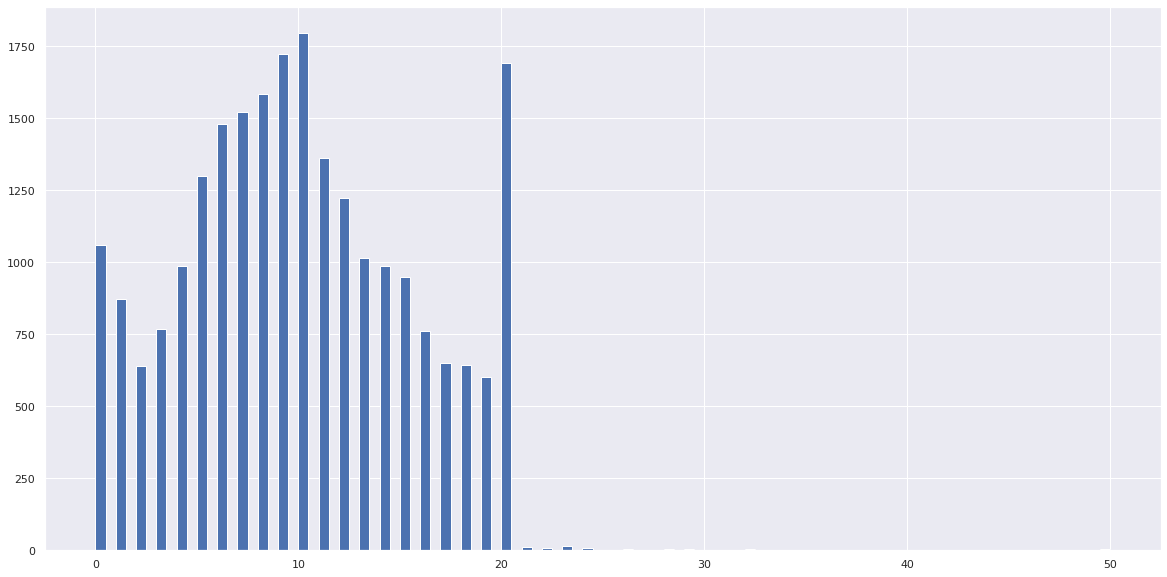

18226                    2421   \
total_images                            0                        0   
last_price                    10500000.00               1900000.00   
total_area                         111.30                    58.80   
first_day_exposition  2017-09-26T00:00:00      2018-02-01T00:00:00   
rooms                                   4                        3   
ceiling_height                       3.20                     2.50   
floors_total                         5.00                     5.00   
living_area                         72.80                    44.00   
floor                                   1                        1   
is_apartment                          NaN                      NaN   
studio                              False                    False   
open_plan                           False                    False   
kitchen_area                        15.30                     5.20   
balcony                               NaN                      NaN   
locality_name             Санкт-Петербург  городской посёлок Назия   
airports_nearest                 16877.00                      NaN   
cityCenters_nearest               8408.00                      NaN   
parks_around3000                     1.00                      NaN   
parks_nearest                      461.00                      NaN   
ponds_around3000                     3.00                      NaN   
ponds_nearest                      588.00                      NaN   
days_exposition                    134.00                    93.00   

                                    10272                2423   \
total_images                            0                    0   
last_price                     4700000.00           3750000.00   
total_area                          41.00                50.70   
first_day_exposition  2017-10-13T00:00:00  2017-06-25T00:00:00   
rooms                                   1                    2   
ceiling_height                       2.80                  NaN   
floors_total                         8.00                 5.00   
living_area                         19.00                29.80   
floor                                   3                    4   
is_apartment                          NaN                  NaN   
studio                              False                False   
open_plan                           False                False   
kitchen_area                        10.00                 6.60   
balcony                               NaN                 0.00   
locality_name             Санкт-Петербург       посёлок Шушары   
airports_nearest                 38832.00             12129.00   
cityCenters_nearest              13729.00             17916.00   
parks_around3000                     0.00                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                     0.00                 0.00   
ponds_nearest                         NaN                  NaN   
days_exposition                     56.00                18.00   

                                    14030  
total_images                            0  
last_price                     4750000.00  
total_area                          43.00  
first_day_exposition  2017-11-29T00:00:00  
rooms                                   1  
ceiling_height                       2.80  
floors_total                        16.00  
living_area                         20.50  
floor                                  13  
is_apartment                          NaN  
studio                              False  
open_plan                           False  
kitchen_area                        13.10  
balcony                              2.00  
locality_name             Санкт-Петербург  
airports_nearest                 44881.00  
cityCenters_nearest              17385.00  
parks_around3000                     1.00  
parks_nearest                      192.00  
ponds_around3000          

In [9]:
col_miss('total_images')
min_max_info('total_images')

В данном столбце пропусков не обнаружено: это обьясняется тем, что данные обязательны для заполнения пользователем и должны содержать минимум 4 фотографии, иначе сайт не дает опубликовать обьявление. Данная информация обьясняет отсутствие пропусков в данных, но не обьясняет присутствие обьявлений без фотографий - однако этих аномальных значений слишком много (более 1000 строк), чтобы их удалить без последствий для дальнейшего анализа. Вместе с этим встречаются аномальные значения в 20+ фотографий. Их появление так же не понятно, похоже на техническую ошибку - их можно удалить без заметных последствий.


Так как тип данных int64 избыточен для столбца с разбросом значений от 0 до 50 - при этом потребляя в разы больше памяти - принято решение заменить тип данных на int16.

In [10]:
filt_data = filt_data[filt_data['total_images'] <= 20]

filt_data['total_images'] = filt_data['total_images'].astype('int16')
filt_data['total_images'].dtype

dtype('int16')

Следующим рассмотрим столбец 'last_price' - цена на момент снятия с публикации.

Всего в столбце "last_price" - 0 пропусков из 23624, или 0.0% 

count       23624.00
mean      6531169.03
std      10894491.93
min         12190.00
25%       3400000.00
50%       4630000.00
75%       6751265.00
max     763000000.00
Name: last_price, dtype: float64 

5 самых распространенных значений в столбце: 

4500000.00    341
3500000.00    291
4000000.00    260
4300000.00    260
4200000.00    259
Name: last_price, dtype: int64 

5 самых редких значений в столбце: 

1110000.00     1
8570000.00     1
7475000.00     1
12511000.00    1
5127100.00     1
Name: last_price, dtype: int64 



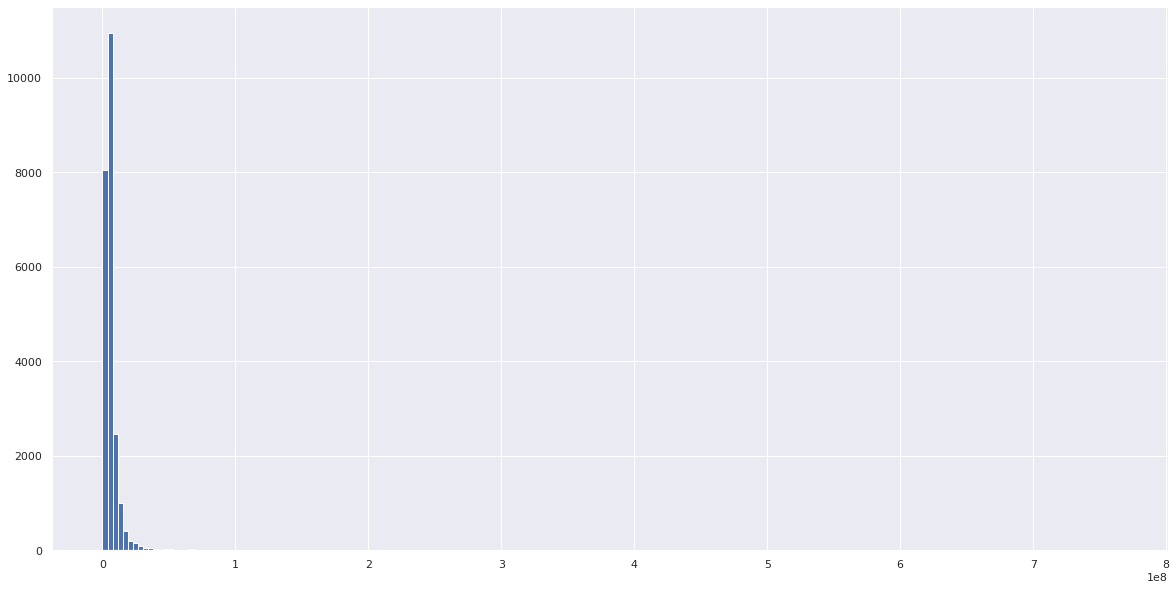

8793                   14911  \
total_images                            7                      5   
last_price                       12190.00              430000.00   
total_area                         109.00                  54.00   
first_day_exposition  2019-03-20T00:00:00    2018-06-26T00:00:00   
rooms                                   2                      2   
ceiling_height                       2.75                    NaN   
floors_total                        25.00                   3.00   
living_area                         32.00                    NaN   
floor                                  25                      3   
is_apartment                          NaN                    NaN   
studio                              False                  False   
open_plan                           False                  False   
kitchen_area                        40.50                    NaN   
balcony                               NaN                    NaN   
locality_name             Санкт-Петербург  посёлок станции Свирь   
airports_nearest                 36421.00                    NaN   
cityCenters_nearest               9176.00                    NaN   
parks_around3000                     1.00                    NaN   
parks_nearest                      805.00                    NaN   
ponds_around3000                     0.00                    NaN   
ponds_nearest                         NaN                    NaN   
days_exposition                      8.00                  44.00   

                                    17456                16274  \
total_images                            7                   18   
last_price                      430000.00            440000.00   
total_area                          30.40                40.00   
first_day_exposition  2019-04-22T00:00:00  2018-07-10T00:00:00   
rooms                                   1                    1   
ceiling_height                        NaN                  NaN   
floors_total                         2.00                 5.00   
living_area                         16.00                  NaN   
floor                                   1                    1   
is_apartment                          NaN                  NaN   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         6.00                  NaN   
balcony                               NaN                  NaN   
locality_name                      Сланцы   деревня Старополье   
airports_nearest                      NaN                  NaN   
cityCenters_nearest                   NaN                  NaN   
parks_around3000                      NaN                  NaN   
parks_nearest                         NaN                  NaN   
ponds_around3000                      NaN                  NaN   
ponds_nearest                         NaN                  NaN   
days_exposition                       NaN                45.00   

                                     16219  
total_images                            14  
last_price                       450000.00  
total_area                           38.50  
first_day_exposition   2018-07-11T00:00:00  
rooms                                    2  
ceiling_height                        2.65  
floors_total                          2.00  
living_area                            NaN  
floor                                    1  
is_apartment                           NaN  
studio                               False  
open_plan                            False  
kitchen_area                           NaN  
balcony                                NaN  
locality_name         деревня Вахнова Кара  
airports_nearest                       NaN  
cityCenters_nearest                    NaN  
parks_around3000                       NaN  
parks_nearest                          NaN  
ponds_around3000                       NaN  
ponds_n

In [11]:
col_miss('last_price')
min_max_info('last_price', 200)

Столбец пополняется данными автоматически через сайт Яндекс.Недвижимости, пропусков не наблюдается, но присутствуют аномальные значения - например, строка 8793 показывает неправдоподобно низкую цену для квартиры площадью в 109 кв.м, а максимальное значение больше третьего квартиля более чем в 100 раз. Мы уберем строки с ценой менее 400,000 и более 50,000,000 из filt_data, чтобы позже сравнить с первоначальными данными на предмет влияния на результаты.

Также отмечено, что тип данных float64 не подходит для данных столбца - в нем раcположены целые, не дробные, числа от 12190 до 763,000,000, что позволяет перезаписать тип данных в int32, как и уменьшить обьем потребляемой памяти в процессе.

In [12]:
filt_data.query('400000 <= last_price <= 50000000').count()

total_images            23492
last_price              23492
total_area              23492
first_day_exposition    23492
rooms                   23492
ceiling_height          14392
floors_total            23406
living_area             21605
floor                   23492
is_apartment             2757
studio                  23492
open_plan               23492
kitchen_area            21233
balcony                 12065
locality_name           23443
airports_nearest        17965
cityCenters_nearest     17986
parks_around3000        17987
parks_nearest            7948
ponds_around3000        17987
ponds_nearest            8970
days_exposition         20338
dtype: int64

count      23492.00
mean     5987598.51
std      4960800.49
min       430000.00
25%      3400000.00
50%      4600000.00
75%      6700000.00
max     50000000.00
Name: last_price, dtype: float64 

5 самых распространенных значений в столбце: 

4500000    341
3500000    291
4000000    260
4300000    260
4200000    259
Name: last_price, dtype: int64 

5 самых редких значений в столбце: 

28114000    1
5000456     1
7444176     1
4802250     1
3825000     1
Name: last_price, dtype: int64 



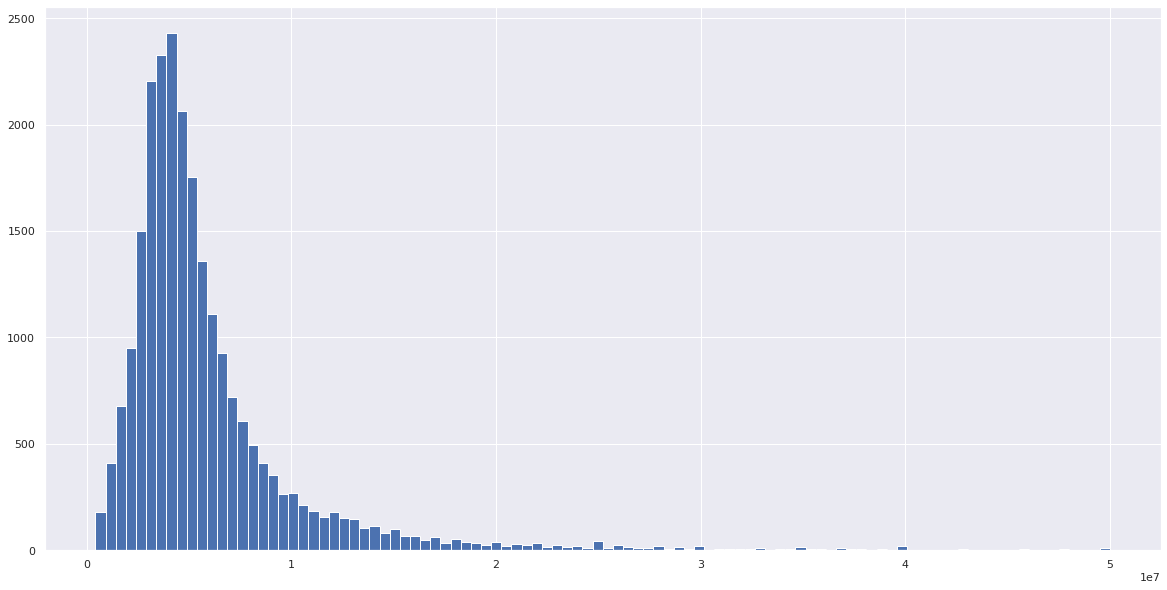

14911                17456  \
total_images                              5                    7   
last_price                           430000               430000   
total_area                            54.00                30.40   
first_day_exposition    2018-06-26T00:00:00  2019-04-22T00:00:00   
rooms                                     2                    1   
ceiling_height                          NaN                  NaN   
floors_total                           3.00                 2.00   
living_area                             NaN                16.00   
floor                                     3                    1   
is_apartment                            NaN                  NaN   
studio                                False                False   
open_plan                             False                False   
kitchen_area                            NaN                 6.00   
balcony                                 NaN                  NaN   
locality_name         посёлок станции Свирь               Сланцы   
airports_nearest                        NaN                  NaN   
cityCenters_nearest                     NaN                  NaN   
parks_around3000                        NaN                  NaN   
parks_nearest                           NaN                  NaN   
ponds_around3000                        NaN                  NaN   
ponds_nearest                           NaN                  NaN   
days_exposition                       44.00                  NaN   

                                    16274                17676  \
total_images                           18                    0   
last_price                         440000               450000   
total_area                          40.00                36.50   
first_day_exposition  2018-07-10T00:00:00  2018-02-01T00:00:00   
rooms                                   1                    1   
ceiling_height                        NaN                  NaN   
floors_total                         5.00                 5.00   
living_area                           NaN                17.30   
floor                                   1                    4   
is_apartment                          NaN                  NaN   
studio                              False                False   
open_plan                           False                False   
kitchen_area                          NaN                 8.50   
balcony                               NaN                 1.00   
locality_name          деревня Старополье    деревня Ям-Тесово   
airports_nearest                      NaN                  NaN   
cityCenters_nearest                   NaN                  NaN   
parks_around3000                      NaN                  NaN   
parks_nearest                         NaN                  NaN   
ponds_around3000                      NaN                  NaN   
ponds_nearest                         NaN                  NaN   
days_exposition                     45.00               120.00   

                                     16219  
total_images                            14  
last_price                          450000  
total_area                           38.50  
first_day_exposition   2018-07-11T00:00:00  
rooms                                    2  
ceiling_height                        2.65  
floors_total                          2.00  
living_area                            NaN  
floor                                    1  
is_apartment                           NaN  
studio                               False  
open_plan                            False  
kitchen_area                           NaN  
balcony                                NaN  
locality_name         деревня Вахнова Кара  
airports_nearest                       NaN  
cityCenters_nearest                    NaN  
parks_around3000                       NaN  
parks_nearest                          NaN  
ponds_around3000                       NaN  
ponds_nea

dtype('int32')

Всего в столбце "last_price" - 0 пропусков из 23492, или 0.0% 



In [13]:
filt_data = filt_data[filt_data['last_price'] >= 400000]
filt_data = filt_data[filt_data['last_price'] <= 50000000]
filt_data.loc[:,('last_price')] = filt_data.loc[:,('last_price')].astype('int32', copy=False)
min_max_info('last_price')
display(filt_data['last_price'].dtype)
col_miss('last_price')

Далее рассмотрим столбец 'total_area' - общая площадь квартиры.

Всего в столбце "total_area" - 0 пропусков из 23492, или 0.0% 

count   23492.00
mean       59.16
std        31.00
min        12.00
25%        40.00
50%        52.00
75%        69.00
max       517.00
Name: total_area, dtype: float64 

5 самых распространенных значений в столбце: 

45.00    418
42.00    383
60.00    347
31.00    346
44.00    344
Name: total_area, dtype: int64 

5 самых редких значений в столбце: 

55.06     1
44.11     1
57.86     1
43.75     1
111.40    1
Name: total_area, dtype: int64 



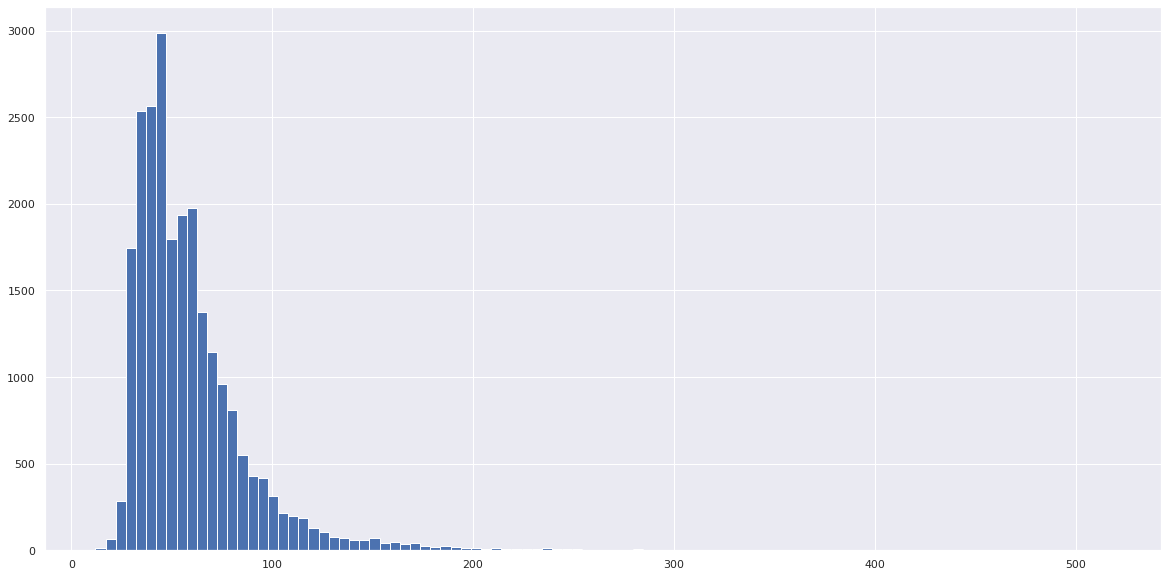

19904                17961  \
total_images                            4                    3   
last_price                        2400000              1400000   
total_area                          12.00                13.00   
first_day_exposition  2017-07-19T00:00:00  2017-12-03T00:00:00   
rooms                                   1                    1   
ceiling_height                       2.55                 2.60   
floors_total                         5.00                 9.00   
living_area                         10.00                  NaN   
floor                                   2                    1   
is_apartment                          NaN                  NaN   
studio                              False                False   
open_plan                           False                False   
kitchen_area                          NaN                  NaN   
balcony                               NaN                  NaN   
locality_name             Санкт-Петербург      Санкт-Петербург   
airports_nearest                 21314.00             14350.00   
cityCenters_nearest                964.00             15945.00   
parks_around3000                     1.00                 0.00   
parks_nearest                      886.00                  NaN   
ponds_around3000                     2.00                 1.00   
ponds_nearest                       45.00               185.00   
days_exposition                    200.00               410.00   

                                    19807                19546  \
total_images                            0                    3   
last_price                        3800000              1850000   
total_area                          13.00                13.00   
first_day_exposition  2018-07-04T00:00:00  2019-03-11T00:00:00   
rooms                                   1                    1   
ceiling_height                        NaN                 3.40   
floors_total                         5.00                 5.00   
living_area                         10.00                  NaN   
floor                                   3                    2   
is_apartment                          NaN                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                          NaN                  NaN   
balcony                               NaN                  NaN   
locality_name             Санкт-Петербург      Санкт-Петербург   
airports_nearest                 21302.00             24915.00   
cityCenters_nearest               1242.00              5483.00   
parks_around3000                     1.00                 1.00   
parks_nearest                      592.00               644.00   
ponds_around3000                     3.00                 0.00   
ponds_nearest                       27.00                  NaN   
days_exposition                      9.00                24.00   

                                    19558  
total_images                            2  
last_price                        1686000  
total_area                          13.20  
first_day_exposition  2018-12-17T00:00:00  
rooms                                   1  
ceiling_height                        NaN  
floors_total                         5.00  
living_area                           NaN  
floor                                   1  
is_apartment                          NaN  
studio                              False  
open_plan                           False  
kitchen_area                          NaN  
balcony                               NaN  
locality_name             Санкт-Петербург  
airports_nearest                 19891.00  
cityCenters_nearest               4165.00  
parks_around3000                     1.00  
parks_nearest                      361.00  
ponds_around3000                     1.00  
ponds_nearest                      155.00  
days_exposition               

In [14]:
col_miss('total_area')
min_max_info('total_area')

В этом столбце пропусков не отмечено, так как пользователь обязан заполнить данные для подачи обьявления. Однако замечены аномально низкие значения в 12-13 кв.м. Согласно строительным нормам и правилам [(СНиП)](http://xn--h1ajhf.xn--p1ai/snip), площадь комнаты в однокомнатной квартире должна быть не менее 14 квадратных метров, а кухни, по самым «мягким» правилам, — 5 квадратных метров. Согласно санитарным правилам и нормам [(СанПиН)](https://www.garant.ru/products/ipo/prime/doc/400189764/), не допускается устраивать вход в помещение, оборудованное унитазом, из кухни и жилой комнаты. Стало быть, в однокомнатной квартире должны быть как минимум жилая комната, кухня, коридор и совмещённый санузел. Все эти помещения должны быть разделены между собой стенами. Вместе с этим, максимальные значения в столбце (от 200 кв.м.) довольно редки и аномально высоки относительно квартилей данных.

Исходя из этого, отфильтруем квартиры с общей площадью менее 20 кв.м и более 250 кв.м. и оптимизируем расход памяти, заменив тип данных float64 на float16.

count   23409.00
mean         inf
std        27.92
min        20.00
25%        40.00
50%        52.00
75%        69.00
max       250.00
Name: total_area, dtype: float64 

5 самых распространенных значений в столбце: 

45.00    418
42.00    383
60.00    347
44.00    346
31.00    346
Name: total_area, dtype: int64 

5 самых редких значений в столбце: 

162.75    1
179.62    1
86.56     1
40.38     1
112.31    1
Name: total_area, dtype: int64 



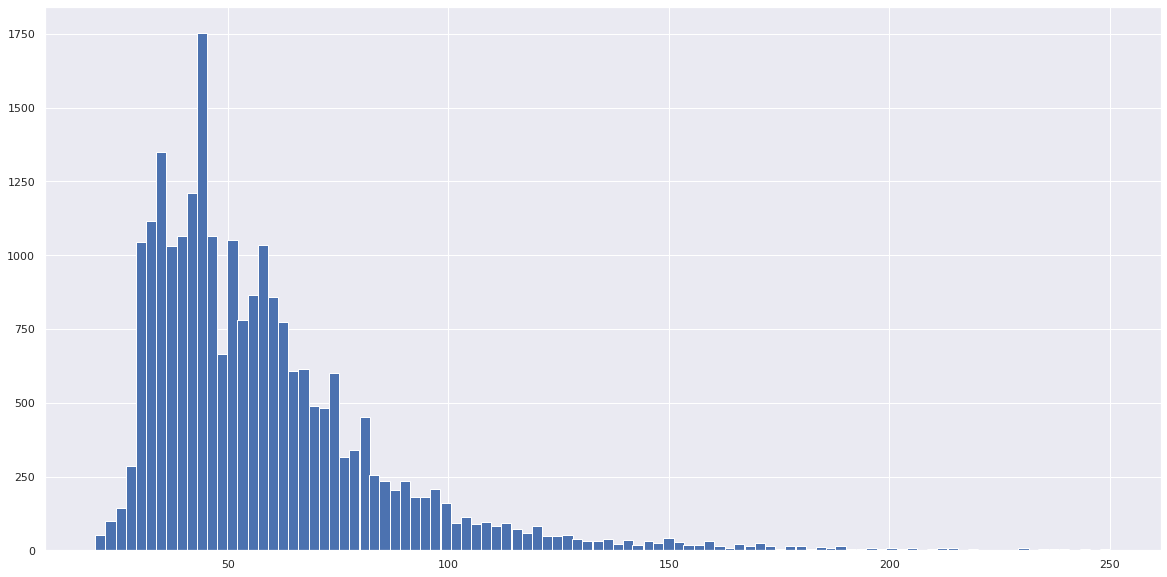

16991                17860  \
total_images                            2                    1   
last_price                        1750000              2385000   
total_area                          20.00                20.00   
first_day_exposition  2015-08-12T00:00:00  2018-12-11T00:00:00   
rooms                                   1                    1   
ceiling_height                        NaN                  NaN   
floors_total                        22.00                 6.00   
living_area                           NaN                  NaN   
floor                                  18                    2   
is_apartment                        False                  NaN   
studio                              False                False   
open_plan                           False                False   
kitchen_area                          NaN                  NaN   
balcony                              2.00                  NaN   
locality_name              посёлок Мурино      Санкт-Петербург   
airports_nearest                      NaN             23361.00   
cityCenters_nearest                   NaN              2903.00   
parks_around3000                      NaN                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                      NaN                 1.00   
ponds_nearest                         NaN              1002.00   
days_exposition                    757.00                25.00   

                                    4077                 10964  \
total_images                           10                    3   
last_price                        3000000              1150000   
total_area                          20.00                20.00   
first_day_exposition  2017-04-10T00:00:00  2017-03-04T00:00:00   
rooms                                   2                    1   
ceiling_height                        NaN                  NaN   
floors_total                         6.00                 3.00   
living_area                         13.00                16.00   
floor                                   2                    1   
is_apartment                          NaN                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         5.60                  NaN   
balcony                              0.00                 0.00   
locality_name             Санкт-Петербург           Всеволожск   
airports_nearest                 28450.00                  NaN   
cityCenters_nearest               6996.00                  NaN   
parks_around3000                     2.00                  NaN   
parks_nearest                      223.00                  NaN   
ponds_around3000                     1.00                  NaN   
ponds_nearest                      611.00                  NaN   
days_exposition                     16.00               108.00   

                                    5312   
total_images                            3  
last_price                        1800000  
total_area                          20.00  
first_day_exposition  2018-02-01T00:00:00  
rooms                                   0  
ceiling_height                        NaN  
floors_total                        19.00  
living_area                         16.00  
floor                                  10  
is_apartment                          NaN  
studio                               True  
open_plan                           False  
kitchen_area                          NaN  
balcony                               NaN  
locality_name             деревня Кудрово  
airports_nearest                      NaN  
cityCenters_nearest                   NaN  
parks_around3000                      NaN  
parks_nearest                         NaN  
ponds_around3000                      NaN  
ponds_nearest                         NaN  
days_exposition               

dtype('float16')

In [15]:
filt_data = filt_data[filt_data['total_area'] >= 20]
filt_data = filt_data[filt_data['total_area'] <= 250]
filt_data['total_area'] = filt_data['total_area'].astype('float16')

min_max_info('total_area')
filt_data['total_area'].dtype

Далее рассмотрим столбец 'first_day_exposition' - дата публикации обьявления.

In [16]:
col_miss('first_day_exposition')

Всего в столбце "first_day_exposition" - 0 пропусков из 23409, или 0.0% 



Исходные данные представлены как object, что вызвало некорректное отображение гистограммы - переведем в более подходящий тип данных datetime.

count                            23409
mean     2017-11-10 02:00:26.758938880
min                2014-11-27 00:00:00
25%                2017-05-13 00:00:00
50%                2017-12-13 00:00:00
75%                2018-08-27 00:00:00
max                2019-05-03 00:00:00
Name: first_day_exposition, dtype: object 

5 самых распространенных значений в столбце: 

2018-02-01    359
2017-11-10    226
2017-10-13    122
2017-09-27    105
2018-03-26     97
Name: first_day_exposition, dtype: int64 

5 самых редких значений в столбце: 

2015-04-04    1
2016-09-12    1
2014-12-05    1
2015-02-03    1
2016-11-13    1
Name: first_day_exposition, dtype: int64 



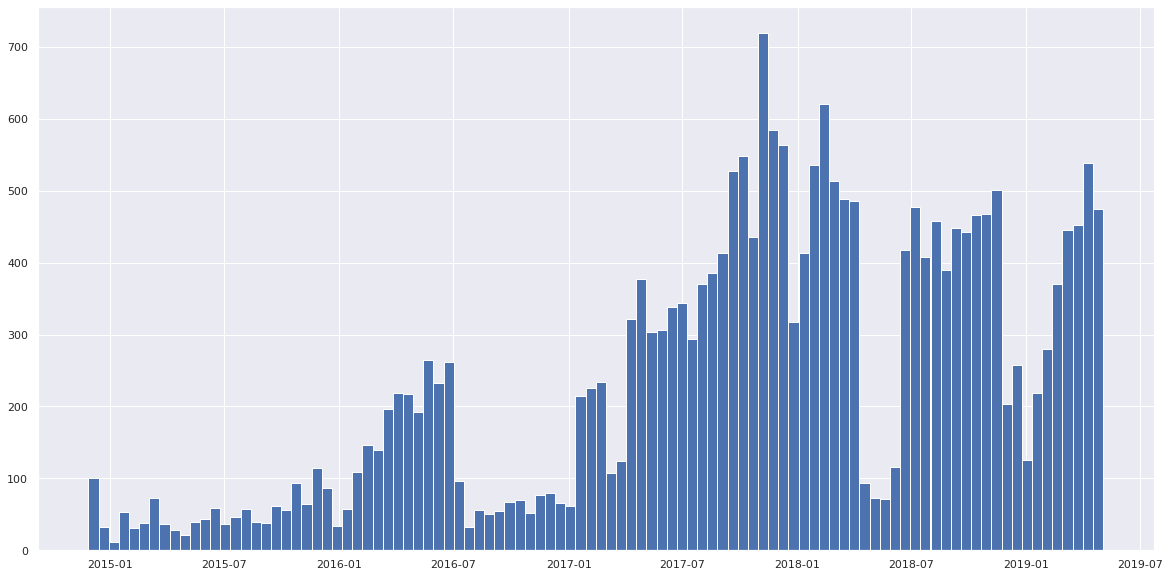

8393                 10132  \
total_images                           10                    2   
last_price                        8037000             16137000   
total_area                          56.19               154.75   
first_day_exposition  2014-11-27 00:00:00  2014-11-27 00:00:00   
rooms                                   1                    4   
ceiling_height                        NaN                 2.70   
floors_total                         5.00                20.00   
living_area                         24.20                67.81   
floor                                   5                   20   
is_apartment                        False                  NaN   
studio                              False                False   
open_plan                           False                False   
kitchen_area                        12.90                32.55   
balcony                              0.00                 0.00   
locality_name             Санкт-Петербург      Санкт-Петербург   
airports_nearest                 36813.00             18490.00   
cityCenters_nearest               8572.00             17492.00   
parks_around3000                     1.00                 0.00   
parks_nearest                     2467.00                  NaN   
ponds_around3000                     3.00                 2.00   
ponds_nearest                      214.00               113.00   
days_exposition                    972.00               573.00   

                                    7027                 15427  \
total_images                            1                    2   
last_price                       21453004              3550000   
total_area                         156.38                34.00   
first_day_exposition  2014-11-27 00:00:00  2014-11-27 00:00:00   
rooms                                   4                    1   
ceiling_height                        NaN                 2.55   
floors_total                        13.00                 9.00   
living_area                           NaN                18.90   
floor                                  13                    7   
is_apartment                          NaN                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                          NaN                 6.00   
balcony                               NaN                 1.00   
locality_name             Санкт-Петербург      Санкт-Петербург   
airports_nearest                 29990.00             13430.00   
cityCenters_nearest               4870.00             14405.00   
parks_around3000                     1.00                 1.00   
parks_nearest                      641.00               500.00   
ponds_around3000                     1.00                 1.00   
ponds_nearest                      145.00               504.00   
days_exposition                   1214.00              1149.00   

                                    3486   
total_images                            2  
last_price                       14500000  
total_area                          97.38  
first_day_exposition  2014-11-27 00:00:00  
rooms                                   2  
ceiling_height                       3.00  
floors_total                         8.00  
living_area                         36.30  
floor                                   2  
is_apartment                        False  
studio                              False  
open_plan                           False  
kitchen_area                        31.70  
balcony                              0.00  
locality_name             Санкт-Петербург  
airports_nearest                 39393.00  
cityCenters_nearest              11096.00  
parks_around3000                     1.00  
parks_nearest                      537.00  
ponds_around3000                     0.00  
ponds_nearest                         NaN  
days_exposition               

In [17]:
filt_data['first_day_exposition'] = pd.to_datetime(filt_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
min_max_info('first_day_exposition')

Пропусков в столбце не обнаружено, данные заполняются автоматически со стороны сайта. Исходя из минимальных и максимальных значений столбца, можно сделать вывод о конкретном временном промежутке рассматриваемых данных - с 00:00:00 2014-11-27 до 00:00:00 2019-05-03 или около 4 лет, 5 месяцев и 6 дней. Гистограмма не показывает нормального распределения данных, но и явных причин обрезать данные пока не наблюдается.

Далее рассмотрим столбец 'rooms' - количество комнат в квартире.

Всего в столбце "rooms" - 0 пропусков из 23409, или 0.0% 

count   23409.00
mean        2.05
std         1.02
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        14.00
Name: rooms, dtype: float64 

5 самых распространенных значений в столбце: 

1    8015
2    7913
3    5747
4    1135
5     283
Name: rooms, dtype: int64 

5 самых редких значений в столбце: 

10    1
14    1
11    2
9     3
8     7
Name: rooms, dtype: int64 



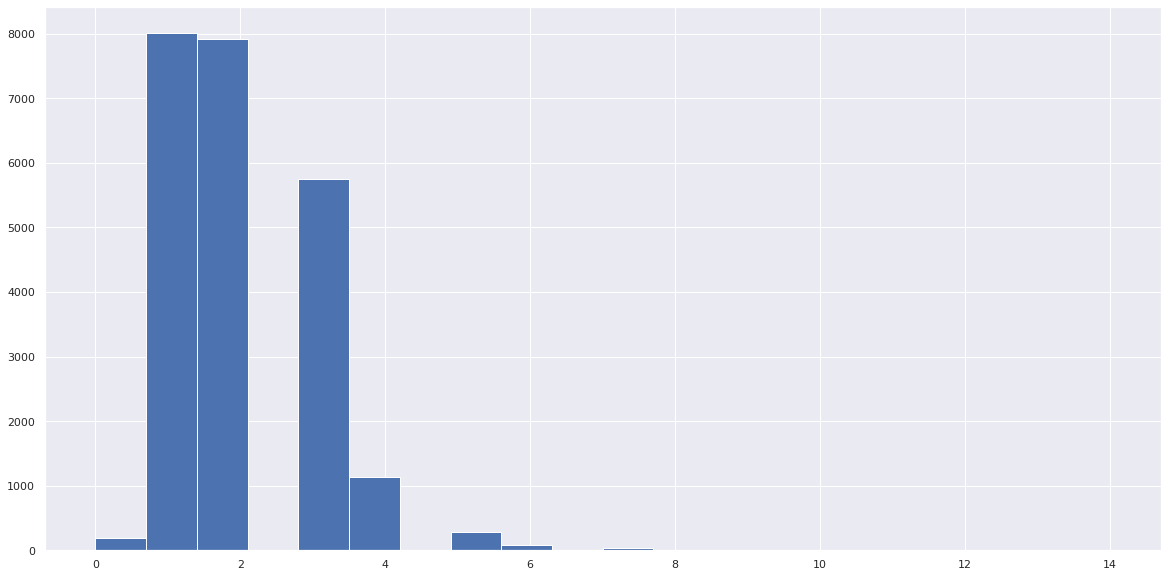

697                  13870  \
total_images                           12                   20   
last_price                        2500000              4090000   
total_area                          24.09                31.00   
first_day_exposition  2017-12-01 00:00:00  2017-06-14 00:00:00   
rooms                                   0                    0   
ceiling_height                       2.75                 2.60   
floors_total                        25.00                17.00   
living_area                         17.50                16.00   
floor                                  21                    6   
is_apartment                          NaN                  NaN   
studio                               True                 True   
open_plan                           False                False   
kitchen_area                          NaN                  NaN   
balcony                               NaN                 2.00   
locality_name             деревня Кудрово      Санкт-Петербург   
airports_nearest                      NaN             10796.00   
cityCenters_nearest                   NaN             14361.00   
parks_around3000                      NaN                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                      NaN                 0.00   
ponds_nearest                         NaN                  NaN   
days_exposition                    201.00               373.00   

                                    3435                 508    \
total_images                            7                    0   
last_price                        2800000              3375000   
total_area                          29.00                34.41   
first_day_exposition  2017-12-10 00:00:00  2017-03-28 00:00:00   
rooms                                   0                    0   
ceiling_height                       2.55                  NaN   
floors_total                        10.00                26.00   
living_area                         20.00                24.30   
floor                                   7                   19   
is_apartment                          NaN                  NaN   
studio                               True                False   
open_plan                           False                 True   
kitchen_area                          NaN                  NaN   
balcony                               NaN                 1.00   
locality_name                   Сертолово    посёлок Парголово   
airports_nearest                      NaN             53115.00   
cityCenters_nearest                   NaN             19292.00   
parks_around3000                      NaN                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                      NaN                 1.00   
ponds_nearest                         NaN               593.00   
days_exposition                    115.00               430.00   

                                    5958   
total_images                            1  
last_price                        3200000  
total_area                          30.30  
first_day_exposition  2018-09-07 00:00:00  
rooms                                   0  
ceiling_height                        NaN  
floors_total                          NaN  
living_area                           NaN  
floor                                  13  
is_apartment                          NaN  
studio                               True  
open_plan                           False  
kitchen_area                          NaN  
balcony                               NaN  
locality_name             Санкт-Петербург  
airports_nearest                 22735.00  
cityCenters_nearest              11618.00  
parks_around3000                     1.00  
parks_nearest                      835.00  
ponds_around3000                     1.00  
ponds_nearest                      652.00  
days_exposition               

In [18]:
col_miss('rooms')
min_max_info('rooms', 20)

Заполнение столбца обязательно для пользователя чтобы добавить обьявление на сайт, явных пропусков не наблюдается. Так как данные представлены в формате int64 (целые числа), в рамках данного исследования руководствуемся предположением, что значение "0" обозначает однокомнатные квартиры-студии. Вполне разумно предположить, что в Санкт-Петербурге и близлежащих городах могут существовать и продаваться квартиры с количеством комнат более 7 (исторические/старинные здания, нетиповые постройки, квартиры категории "люкс"), но в рамках данной работы их малочисленность, вместе с отсутствием более точных/достоверных сведений скорее искажает данные, так что решено их убрать из датасета.


Так как мы имеем дело с диапазоном целых чисел от 0 до 19, мы можем заменить тип данных int64 на int16 для уменьшения обьема используемой памяти без каких-либо потерь данных.

In [19]:
filt_data.query('0 < rooms <=7').count()

total_images            23208
last_price              23208
total_area              23208
first_day_exposition    23208
rooms                   23208
ceiling_height          14258
floors_total            23126
living_area             21351
floor                   23208
is_apartment             2746
studio                  23208
open_plan               23208
kitchen_area            21168
balcony                 11910
locality_name           23159
airports_nearest        17766
cityCenters_nearest     17787
parks_around3000        17788
parks_nearest            7869
ponds_around3000        17788
ponds_nearest            8852
days_exposition         20084
dtype: int64

count   23208.00
mean        2.06
std         0.99
min         1.00
25%         1.00
50%         2.00
75%         3.00
max         7.00
Name: rooms, dtype: float64 

5 самых распространенных значений в столбце: 

1    8015
2    7913
3    5747
4    1135
5     283
Name: rooms, dtype: int64 

5 самых редких значений в столбце: 

7      36
6      79
5     283
4    1135
3    5747
Name: rooms, dtype: int64 



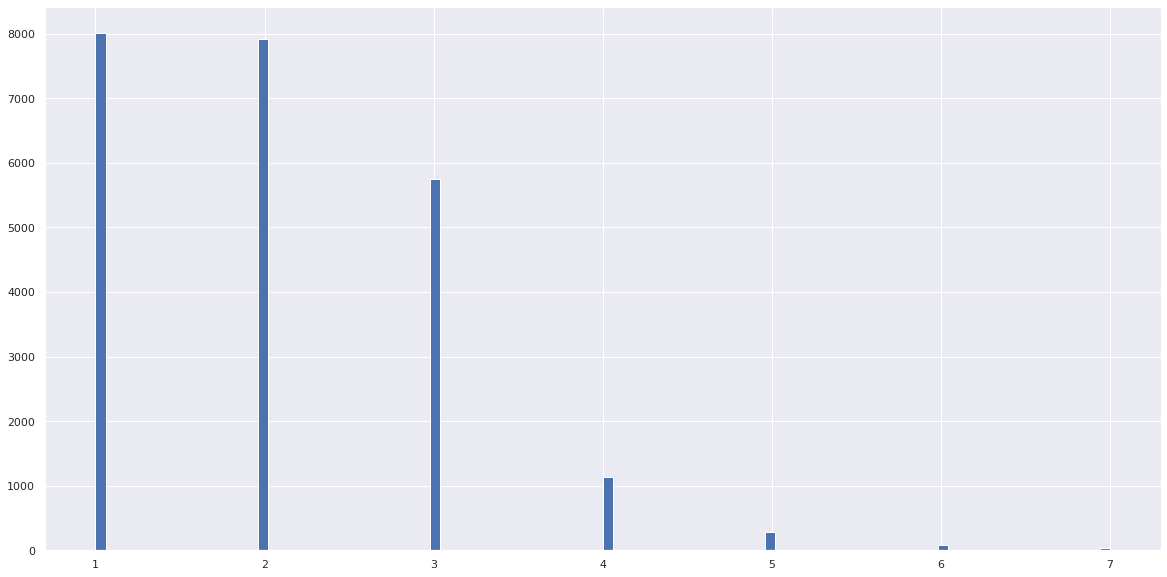

23698                9578   \
total_images                            4                    8   
last_price                        1350000              3200000   
total_area                          32.31                37.19   
first_day_exposition  2017-07-21 00:00:00  2017-06-14 00:00:00   
rooms                                   1                    1   
ceiling_height                       2.50                  NaN   
floors_total                         5.00                14.00   
living_area                         12.30                21.00   
floor                                   1                   11   
is_apartment                          NaN                  NaN   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         9.00                 7.50   
balcony                               NaN                 0.00   
locality_name         поселок Новый Учхоз      Санкт-Петербург   
airports_nearest                      NaN             46532.00   
cityCenters_nearest                   NaN             16030.00   
parks_around3000                      NaN                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                      NaN                 0.00   
ponds_nearest                         NaN                  NaN   
days_exposition                       NaN                37.00   

                                    9580                 9585   \
total_images                           10                    6   
last_price                        3500000              5200000   
total_area                          42.00                49.00   
first_day_exposition  2016-05-30 00:00:00  2017-04-17 00:00:00   
rooms                                   1                    1   
ceiling_height                        NaN                  NaN   
floors_total                        20.00                18.00   
living_area                         17.00                14.10   
floor                                   8                    7   
is_apartment                          NaN                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                        11.00                19.60   
balcony                              0.00                 2.00   
locality_name              посёлок Мурино      Санкт-Петербург   
airports_nearest                      NaN             32581.00   
cityCenters_nearest                   NaN              8720.00   
parks_around3000                      NaN                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                      NaN                 1.00   
ponds_nearest                         NaN               431.00   
days_exposition                    406.00               273.00   

                                    9588   
total_images                           13  
last_price                        5500000  
total_area                          37.41  
first_day_exposition  2019-01-28 00:00:00  
rooms                                   1  
ceiling_height                        NaN  
floors_total                        24.00  
living_area                         18.50  
floor                                  22  
is_apartment                          NaN  
studio                              False  
open_plan                           False  
kitchen_area                         9.90  
balcony                               NaN  
locality_name             Санкт-Петербург  
airports_nearest                  7233.00  
cityCenters_nearest              13449.00  
parks_around3000                     1.00  
parks_nearest                     1256.00  
ponds_around3000                     0.00  
ponds_nearest                         NaN  
days_exposition               

In [20]:
filt_data = filt_data[filt_data['rooms'] <= 7]
filt_data = filt_data[filt_data['rooms'] > 0]

filt_data['rooms'] = filt_data['rooms'].astype('int16')
filt_data['rooms'].dtype
min_max_info('rooms')

Далее рассмотрим столбец 'balcony' - количество балконов/лоджий в квартире.

In [21]:
col_miss('balcony')

Всего в столбце "balcony" - 11298 пропусков из 23208, или 48.7% 



Столбец 'balcony' заполняется пользователем при добавлении обьявления на сайт, где можно выбрать опции "Балкон", "Лоджия", "Нет" и "Добавить". При выборе опции "Добавить" снова появляются вышеуказанные "Балкон", "Лоджия" и "Нет", а опция "Добавить" заменена на "Убавить". Так же есть выбор не выбирать, что не препятствует запуску обьявления на сайт.

Из такого поверхностного осмотра следует, что на момент написания данной работы пользователь не может добавить более двух балконов/лоджий, но может не выбирать опцию "Нет". Данный фактор наводит на три возможных вывода о причинах появления пропусков:

1. Пропуски могли появиться из-за того, что пользователи могут свободно пропустить пункт наличия/отсутствия балкона/лоджии и все равно выложить обьявление на сайт. Из этого следует вероятность, что некоторые пользователи могли предположить знак равенства между выбором опции "Нет" и непринятием выбора как такого, ожидая автоматическую коррекцию со стороны сайта в период между отправкой и публикацией обьявления. А другие пользователи могли не заметить, пропустить или забыть про этот пункт и отправить обьявление без заполнения данных.


2. Пропуски могут быть результатом технических ошибок при сборе/выгрузке данных и/или автоматизированная обработка данных обьявлений гипотетически может не воспринимать отсутствие выбора опции как отсутствие балкона/лоджии и указать взамен значение "nan".


3. Пользователи с пропусками могли вместо выбора опции "Нет" пропустить пункт с балконами/лоджиями, так как ситуация с балконами/лоджиями не описывается в рамках указанных опций: балкон/лоджия есть, но является нелегальным самостроем; балкон/лоджия есть, но не используется/не может использоваться по назначению (переоборудована в склад вещей, расширение прилегающей комнаты); балкон/лоджия есть, но обьединенная с соседней квартирой/квартирами; или же балкон/лоджия есть только частично или же полностью отсутствует в результате физического ущерба квартире (стихийные бедствия, техногенные или антропогенные факторы).


Так как нет возможности подтвердить или опровергнуть третий пункт применительно к каждому обьявлению индивидуально, как и невозможно подтвердить или опровергнуть второй пункт, за основной вывод ради облегчения дальнейшего исследования мы рассмотрим пункт под номером один:

- Наиболее простым обьяснением является то, что пропуски в данном столбце являются комбинацией человеческого фактора (невнимательность/неосторожность/ожидание автоматической коррекции от сайта) и/или статусом "дополнительного" столбца на самом сайте (Яндекс.Недвижимость не запрещает разместить недвижимость с отсутствием данных в данном столбце).

Далее рассмотрим значения столбца:

count   11910.00
mean        1.15
std         1.07
min         0.00
25%         0.00
50%         1.00
75%         2.00
max         5.00
Name: balcony, dtype: float64 

5 самых распространенных значений в столбце: 

1.00    4119
0.00    3692
2.00    3542
5.00     300
4.00     177
Name: balcony, dtype: int64 

5 самых редких значений в столбце: 

3.00      80
4.00     177
5.00     300
2.00    3542
0.00    3692
Name: balcony, dtype: int64 



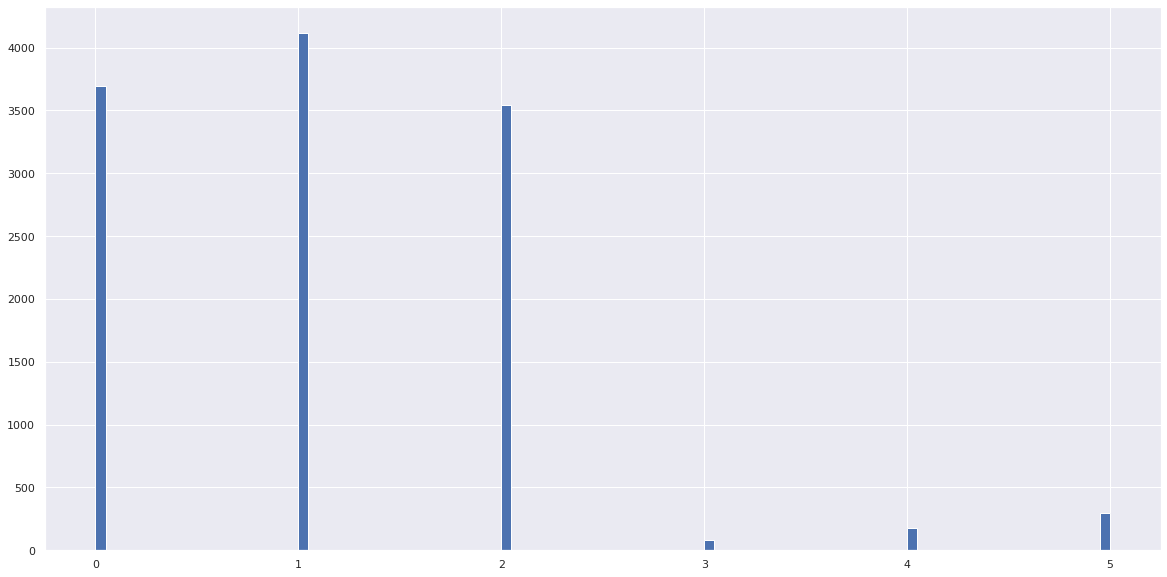

17250                6348   \
total_images                            9                    1   
last_price                        3000000             11615928   
total_area                          32.00                88.81   
first_day_exposition  2017-08-10 00:00:00  2016-05-12 00:00:00   
rooms                                   1                    3   
ceiling_height                        NaN                 3.10   
floors_total                         9.00                16.00   
living_area                         18.00                52.21   
floor                                   7                    6   
is_apartment                          NaN                  NaN   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         6.00                11.78   
balcony                              0.00                 0.00   
locality_name             Санкт-Петербург      Санкт-Петербург   
airports_nearest                 15414.00             37407.00   
cityCenters_nearest              14211.00              8434.00   
parks_around3000                     2.00                 1.00   
parks_nearest                      517.00               456.00   
ponds_around3000                     1.00                 2.00   
ponds_nearest                      190.00               454.00   
days_exposition                     59.00                54.00   

                                    21334                21333  \
total_images                           11                   10   
last_price                        4400000              5900000   
total_area                          45.00                58.00   
first_day_exposition  2015-12-21 00:00:00  2015-03-12 00:00:00   
rooms                                   2                    3   
ceiling_height                       2.50                  NaN   
floors_total                        12.00                 6.00   
living_area                         26.80                35.20   
floor                                   8                    6   
is_apartment                          NaN                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         6.10                11.00   
balcony                              0.00                 0.00   
locality_name             Санкт-Петербург                  NaN   
airports_nearest                 15981.00             26090.00   
cityCenters_nearest              10603.00              4805.00   
parks_around3000                     0.00                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                     1.00                 1.00   
ponds_nearest                      595.00               943.00   
days_exposition                    245.00               486.00   

                                    18786  
total_images                            5  
last_price                        3700000  
total_area                          40.00  
first_day_exposition  2017-02-16 00:00:00  
rooms                                   1  
ceiling_height                       2.60  
floors_total                        16.00  
living_area                         21.00  
floor                                   7  
is_apartment                          NaN  
studio                              False  
open_plan                           False  
kitchen_area                         7.00  
balcony                              0.00  
locality_name             Санкт-Петербург  
airports_nearest                 48092.00  
cityCenters_nearest              16072.00  
parks_around3000                     0.00  
parks_nearest                         NaN  
ponds_around3000                     0.00  
ponds_nearest                         NaN  
days_exposition               

In [22]:
min_max_info('balcony')

Исходя из вывода о человеческом факторе и равнозначности опции "Нет" и отсутствием выбора как о причине пропусков в данных, принято решение заполнить пропуски значением "0".

Так же решено формат данных заменить с float64 на int16 для более точного соответствия данным в столбце и уменьшения обьема расходуемой памяти.

In [23]:
filt_data['balcony'] = filt_data['balcony'].fillna(0)
filt_data['balcony'] = filt_data['balcony'].astype('int16')

filt_data['balcony'].dtype

dtype('int16')

count   23208.00
mean        0.59
std         0.96
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         5.00
Name: balcony, dtype: float64 

5 самых распространенных значений в столбце: 

0    14990
1     4119
2     3542
5      300
4      177
Name: balcony, dtype: int64 

5 самых редких значений в столбце: 

3      80
4     177
5     300
2    3542
1    4119
Name: balcony, dtype: int64 



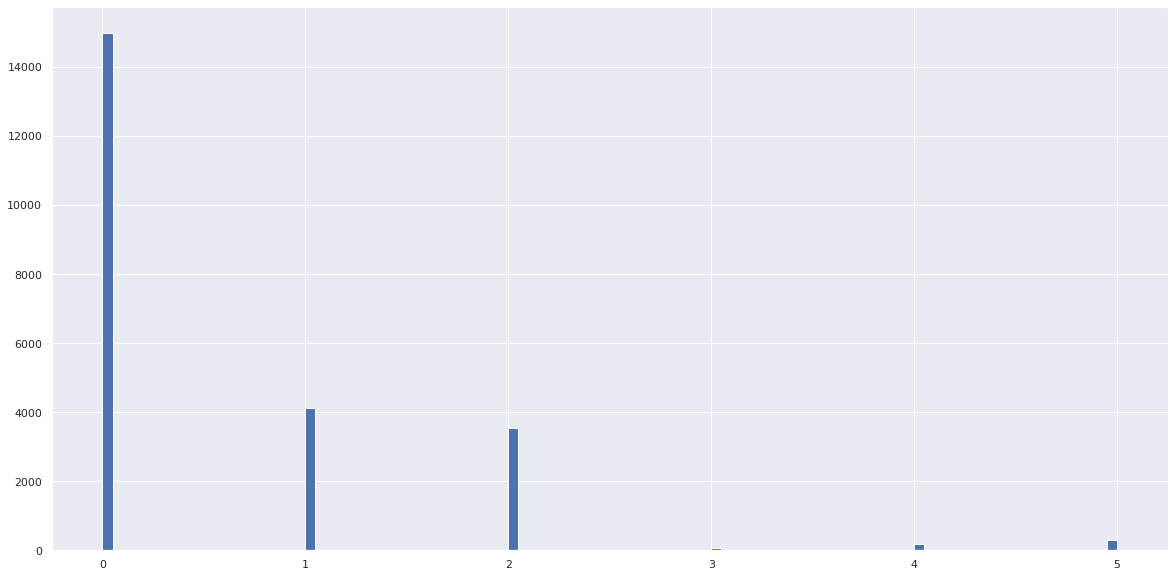

0                    14123  \
total_images                           20                    9   
last_price                       13000000              3099000   
total_area                         108.00                32.50   
first_day_exposition  2019-03-07 00:00:00  2017-10-24 00:00:00   
rooms                                   3                    1   
ceiling_height                       2.70                 2.80   
floors_total                        16.00                 9.00   
living_area                         51.00                17.50   
floor                                   8                    8   
is_apartment                          NaN                  NaN   
studio                              False                False   
open_plan                           False                False   
kitchen_area                        25.00                 6.50   
balcony                                 0                    0   
locality_name             Санкт-Петербург      Санкт-Петербург   
airports_nearest                 18863.00             51708.00   
cityCenters_nearest              16028.00             16890.00   
parks_around3000                     1.00                 0.00   
parks_nearest                      482.00                  NaN   
ponds_around3000                     2.00                 1.00   
ponds_nearest                      755.00               689.00   
days_exposition                       NaN                45.00   

                                    14125                14126  \
total_images                            1                   12   
last_price                        3780000              5190000   
total_area                          43.09                50.09   
first_day_exposition  2017-10-09 00:00:00  2019-04-09 00:00:00   
rooms                                   2                    1   
ceiling_height                       2.50                 2.70   
floors_total                         5.00                16.00   
living_area                         27.90                26.60   
floor                                   4                    7   
is_apartment                          NaN                  NaN   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         5.20                 7.20   
balcony                                 0                    0   
locality_name             Санкт-Петербург      Санкт-Петербург   
airports_nearest                 38845.00             49410.00   
cityCenters_nearest               8105.00             16296.00   
parks_around3000                     0.00                 1.00   
parks_nearest                         NaN               192.00   
ponds_around3000                     1.00                 0.00   
ponds_nearest                      427.00                  NaN   
days_exposition                     63.00                  NaN   

                                    14129  
total_images                           20  
last_price                        5700000  
total_area                          78.81  
first_day_exposition  2018-07-18 00:00:00  
rooms                                   3  
ceiling_height                        NaN  
floors_total                        25.00  
living_area                         60.00  
floor                                  14  
is_apartment                          NaN  
studio                              False  
open_plan                           False  
kitchen_area                        14.70  
balcony                                 0  
locality_name              посёлок Шушары  
airports_nearest                 13908.00  
cityCenters_nearest              19694.00  
parks_around3000                     0.00  
parks_nearest                         NaN  
ponds_around3000                     1.00  
ponds_nearest                      645.00  
days_exposition               

Всего в столбце "balcony" - 0 пропусков из 23208, или 0.0% 



In [24]:
min_max_info('balcony')
col_miss('balcony')

Всего в столбце "floors_total" - 82 пропусков из 23208, или 0.4% 

count   23126.00
mean       10.65
std         6.58
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64 

5 самых распространенных значений в столбце: 

5.00     5714
9.00     3725
16.00    1352
12.00    1342
4.00     1166
Name: floors_total, dtype: int64 

5 самых редких значений в столбце: 

52.00    1
37.00    1
34.00    1
29.00    1
60.00    1
Name: floors_total, dtype: int64 



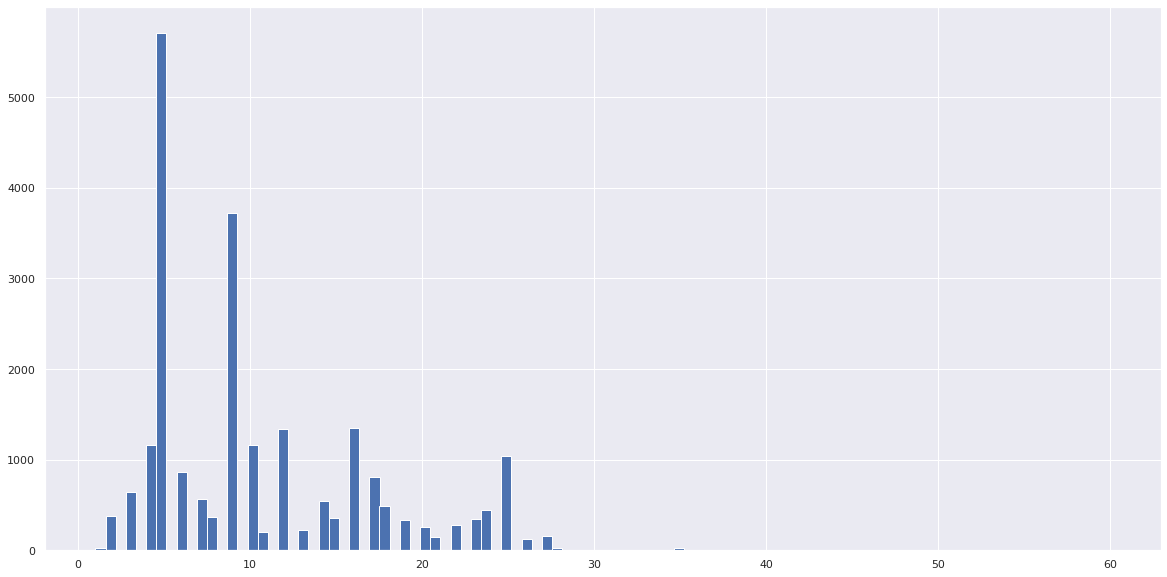

17744                       5698   \
total_images                            8                           7   
last_price                        2300000                      450000   
total_area                          50.91                       42.00   
first_day_exposition  2017-08-09 00:00:00         2017-07-31 00:00:00   
rooms                                   2                           2   
ceiling_height                        NaN                         NaN   
floors_total                         1.00                        1.00   
living_area                         30.00                       23.00   
floor                                   1                           1   
is_apartment                          NaN                         NaN   
studio                              False                       False   
open_plan                           False                       False   
kitchen_area                         7.00                        5.80   
balcony                                 0                           0   
locality_name               посёлок Суйда  городской посёлок Будогощь   
airports_nearest                      NaN                         NaN   
cityCenters_nearest                   NaN                         NaN   
parks_around3000                      NaN                         NaN   
parks_nearest                         NaN                         NaN   
ponds_around3000                      NaN                         NaN   
ponds_nearest                         NaN                         NaN   
days_exposition                    454.00                      233.00   

                                    17020                8388   \
total_images                           10                   20   
last_price                        3700000              3550000   
total_area                         100.00                48.19   
first_day_exposition  2018-01-01 00:00:00  2019-03-30 00:00:00   
rooms                                   3                    3   
ceiling_height                       3.00                 2.65   
floors_total                         1.00                 1.00   
living_area                         35.00                33.90   
floor                                   1                    1   
is_apartment                          NaN                  NaN   
studio                              False                False   
open_plan                           False                False   
kitchen_area                        22.00                 9.10   
balcony                                 0                    0   
locality_name            деревня Каськово           Сестрорецк   
airports_nearest                      NaN             50046.00   
cityCenters_nearest                   NaN             31144.00   
parks_around3000                      NaN                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                      NaN                 0.00   
ponds_nearest                         NaN                  NaN   
days_exposition                    346.00                  NaN   

                                                   10817  
total_images                                           6  
last_price                                        790000  
total_area                                         50.59  
first_day_exposition                 2017-11-29 00:00:00  
rooms                                                  3  
ceiling_height                                       NaN  
floors_total                                        1.00  
living_area                                        32.00  
floor                                                  1  
is_apartment                                         NaN  
studio                                             False  
open_plan                                          False  
kitchen_area                                         NaN  
balcony    

In [25]:
col_miss('floors_total')
min_max_info('floors_total')

Столбец 'floors_total' содержит информацию об общем количестве этажей в здании, где располагается квартира. В отличие от предыдущих рассмотренных столбцов, данные в 'floors_total' являются обязательными для заполнения пользователем - в случае, если пользователь не указал число или указал другой символ/символы, сайт прокручивает страницу к этому полю, подчеркивает его красной линией и делает пометку "Укажите количество этажей":

- Гипотеза о природе пропусков в данном столбце в том, что пропуски являются технической ошибкой со стороны автоматизированных процессов сайта Яндекс.Недвижимость и/или ошибкой при сборе/выгрузке данных.

Так как обьем пропущенных данных составляет менее 1% и не рискует заметно повлиять на результаты анализа, пропуски можно удалить без значительного влияния на итоговые результаты. Так же и поступим с аномальными значениями выше 30 этажей, так как малочисленные аномальные значения в этом диапазоне могут исказить результаты исследования. Дополнительно к этому, тип данных int64 можно заменить на int16 без потери данных и с уменьшением обьема расходуемой памяти.


In [26]:
filt_data.query('floors_total >= 30').count()

total_images            30
last_price              30
total_area              30
first_day_exposition    30
rooms                   30
ceiling_height          12
floors_total            30
living_area             30
floor                   30
is_apartment             4
studio                  30
open_plan               30
kitchen_area            29
balcony                 30
locality_name           30
airports_nearest        30
cityCenters_nearest     30
parks_around3000        30
parks_nearest            4
ponds_around3000        30
ponds_nearest           29
days_exposition         23
dtype: int64

In [27]:
filt_data = filt_data[filt_data['floors_total'].notna()]
filt_data = filt_data[filt_data['floors_total'] <= 30]
filt_data['floors_total'] = filt_data['floors_total'].astype('int16')


col_miss('floors_total')
filt_data['floors_total'].dtype

Всего в столбце "floors_total" - 0 пропусков из 23096, или 0.0% 



dtype('int16')

Далее рассмотрим столбец 'is_apartment' - является ли квартира апартаментами.

In [28]:
col_miss('is_apartment')

Всего в столбце "is_apartment" - 20354 пропусков из 23096, или 88.1% 



Столбец 'is_apartment' заполняется пользователем при добавлении обьявления на сайт и представляет собой булев тип данных, где "True" обозначает квартиры-апартаменты, а "False" - квартиры жилого фонда. 

Как и в примере столбца "balcony", поле не является обязательным для заполнения - что наводит на аналогичные вывод о возможных причинах пропусков в столбце:


- Наиболее простым обьяснением является то, что пропуски в данном столбце являются комбинацией человеческого фактора (невнимательность/неосторожность/ожидание автоматической коррекции от сайта) и/или статусом "дополнительного" столбца на самом сайте (Яндекс.Недвижимость не запрещает разместить недвижимость с отсутствием данных в данном столбце).


Так как в рамках данного исследования мы рассматриваем квартиры для проживания (с комнатами, кухнями, жилой площадью и т.д.) в районе Санкт-Петербурга и прилегающих областей, то будет логичным предположить, что абсолютное большинство квартир являются помещениями для проживания, а не коммерческой недвижимостью (она указана в отдельном разделе сайта и не покрывает рамки данного исследования). В это же время, жилая недвижимость-апартаменты как исторически более новый тип недвижимости составляет меньшинство предложения на рынке. Следовательно, мы заменим пропуски на значение "False" (жилая квартира). 

In [29]:
filt_data.loc[:,('is_apartment')] = filt_data.loc[:,('is_apartment')].fillna(False)
filt_data['is_apartment'].describe()

count     23096
unique        2
top       False
freq      23048
Name: is_apartment, dtype: object

Далее рассмотрим столбец 'living_area' - жилая площадь квартиры.

Всего в столбце "living_area" - 1827 пропусков из 23096, или 7.9% 

count   21269.00
mean       33.58
std        18.18
min         2.00
25%        18.60
50%        30.00
75%        42.00
max       184.00
Name: living_area, dtype: float64 

5 самых распространенных значений в столбце: 

18.00    854
17.00    662
30.00    596
16.00    472
20.00    465
Name: living_area, dtype: int64 

5 самых редких значений в столбце: 

16.74    1
9.80     1
27.95    1
14.59    1
28.66    1
Name: living_area, dtype: int64 



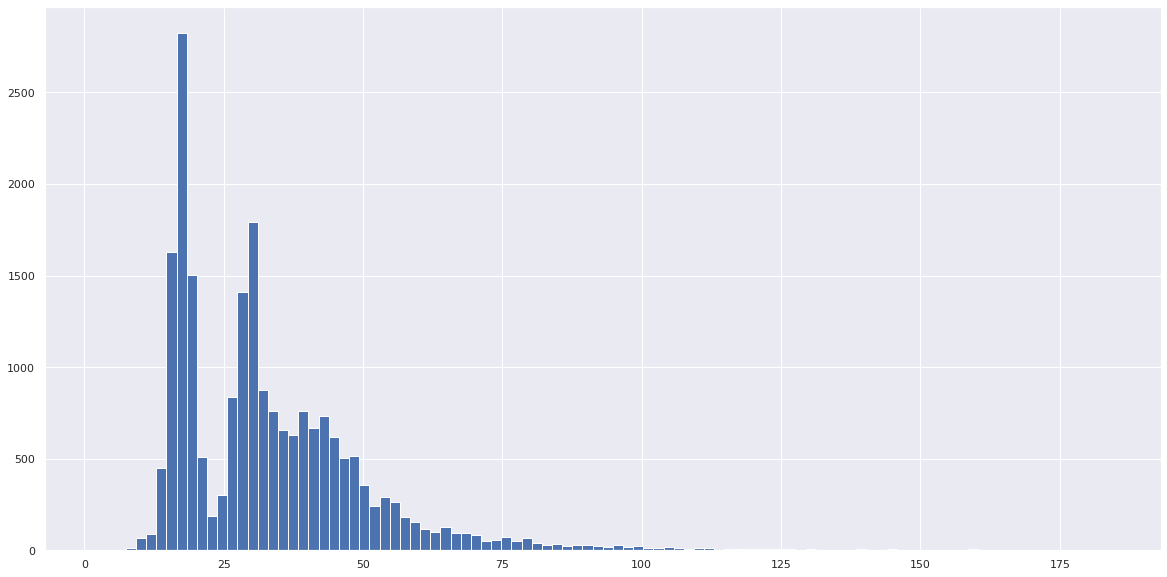

13915                3242   \
total_images                           20                    7   
last_price                        6350000              4440000   
total_area                          52.00                41.00   
first_day_exposition  2018-02-06 00:00:00  2017-07-02 00:00:00   
rooms                                   2                    1   
ceiling_height                       3.00                  NaN   
floors_total                            6                   17   
living_area                          2.00                 3.00   
floor                                   2                   17   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         9.00                11.00   
balcony                                 0                    0   
locality_name             Санкт-Петербург      Санкт-Петербург   
airports_nearest                 32453.00             19272.00   
cityCenters_nearest               6521.00             13073.00   
parks_around3000                     0.00                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                     1.00                 0.00   
ponds_nearest                     1012.00                  NaN   
days_exposition                     91.00               216.00   

                                    21943                16431  \
total_images                           15                   13   
last_price                        6100000              3799000   
total_area                          77.62                31.00   
first_day_exposition  2019-02-28 00:00:00  2018-04-12 00:00:00   
rooms                                   4                    1   
ceiling_height                       2.50                 2.60   
floors_total                            9                    5   
living_area                          5.40                 6.00   
floor                                   1                    1   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         9.80                17.00   
balcony                                 0                    0   
locality_name             Санкт-Петербург      Санкт-Петербург   
airports_nearest                 29338.00             32177.00   
cityCenters_nearest              11270.00              4826.00   
parks_around3000                     1.00                 1.00   
parks_nearest                      584.00               430.00   
ponds_around3000                     0.00                 0.00   
ponds_nearest                         NaN                  NaN   
days_exposition                     33.00               168.00   

                                    19251  
total_images                           19  
last_price                        4050000  
total_area                          33.00  
first_day_exposition  2018-10-15 00:00:00  
rooms                                   1  
ceiling_height                       2.50  
floors_total                           22  
living_area                          6.50  
floor                                  21  
is_apartment                        False  
studio                              False  
open_plan                           False  
kitchen_area                        18.00  
balcony                                 0  
locality_name             Санкт-Петербург  
airports_nearest                  9258.00  
cityCenters_nearest              10592.00  
parks_around3000                     1.00  
parks_nearest                      458.00  
ponds_around3000                     0.00  
ponds_nearest                         NaN  
days_exposition               

In [30]:
col_miss('living_area')
min_max_info('living_area')

'living_area' содержит данные о жилой площади в квартире в квадратных метрах. Как и столбцы 'is_apartment' и 'balcony', неуказание этих данных в обьявлении не препятствует добавлению на сайт (в отличие от общей площади, 'total_area', которая является обязательной для заполнения и где не наблюдается пропусков) - следовательно, причины возникновения могут быть аналогичны:


- Наиболее простым обьяснением является то, что пропуски в данном столбце являются комбинацией человеческого фактора (невнимательность/неосторожность/ожидание автоматической коррекции от сайта) и/или статусом "дополнительного" столбца на самом сайте (Яндекс.Недвижимость не запрещает разместить недвижимость с отсутствием данных в данном столбце).


Прежде чем попытаться заполнить пропуски в столбце, нужно удостовериться в правдоподобности имеющихся данных. При рассмотрении данных выяснилось, что есть строки в датасете, где суммарное значение жилой и кухонной площади больше заявленной общей площади. 

Попробуем посмотреть на распространенность таких строк с помощью query-запроса к датасету:

In [31]:
filt_data.query('total_area * 0.9 <= (living_area + kitchen_area)').count()

total_images            457
last_price              457
total_area              457
first_day_exposition    457
rooms                   457
ceiling_height          298
floors_total            457
living_area             457
floor                   457
is_apartment            457
studio                  457
open_plan               457
kitchen_area            457
balcony                 457
locality_name           457
airports_nearest        327
cityCenters_nearest     327
parks_around3000        327
parks_nearest           165
ponds_around3000        327
ponds_nearest           172
days_exposition         381
dtype: int64

Видно, что в 457 столбцах датасета сумма площади кухни и жилых комнат больше, чем 9/10 от заявленной общей площади или равна ей. Законодательные ограничения предусматривают минимально возможную площадь для совмещенного санузла (ванна/душ, раковина, туалет и место для стиральной машины - что занимает меньше места, чем раздельные санузлы) в 3.8 кв.м, минимально возможная жилая площадь - 14 кв.м. 

Из-за особенностей природы данных мы не можем точно сказать, где начинается жилая площадь, где заканчивается кухня, какого обьема и вида присутствует нежилая площадь - пользователи вносят данные на свое усмотрение, которое нормальному человеку неведомо. Отсюда получаются квартиры с кухонной площадью больше жилой, жилой площадью менее строительных норм и прочие аномалии, которые невозможно подтвердить или опровергнуть в рамках имеющихся данных. 
Обрежем аномально высокие и редкие значения меньше 14 и больше 125 кв.м., так как они не дают представления об остальных данных выборки.

Так как есть сильная корреляция жилой площади и общей площади, мы заполним пропуски медианными значениями группировки по столбцу общей площади:

In [32]:
filt_data.query('living_area > 125').count()

total_images            79
last_price              79
total_area              79
first_day_exposition    79
rooms                   79
ceiling_height          57
floors_total            79
living_area             79
floor                   79
is_apartment            79
studio                  79
open_plan               79
kitchen_area            75
balcony                 79
locality_name           79
airports_nearest        77
cityCenters_nearest     78
parks_around3000        78
parks_nearest           55
ponds_around3000        78
ponds_nearest           57
days_exposition         58
dtype: int64

count   22729.00
mean       33.45
std        16.79
min        13.05
25%        19.00
50%        30.00
75%        42.00
max       125.00
Name: living_area, dtype: float64 

5 самых распространенных значений в столбце: 

18.00    941
17.00    745
30.00    657
28.00    493
16.00    490
Name: living_area, dtype: int64 

5 самых редких значений в столбце: 

16.74    1
58.63    1
15.77    1
48.35    1
84.60    1
Name: living_area, dtype: int64 



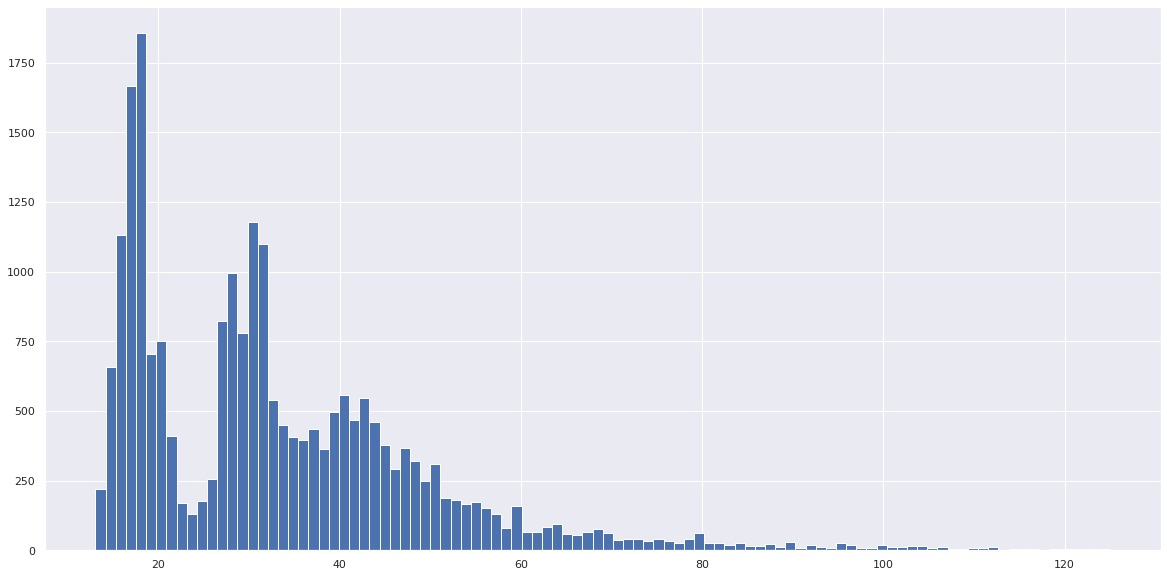

23055                9514   \
total_images                            8                    7   
last_price                        3200000              3150000   
total_area                          33.00                34.41   
first_day_exposition  2016-03-18 00:00:00  2017-06-14 00:00:00   
rooms                                   1                    1   
ceiling_height                        NaN                 2.60   
floors_total                           24                   27   
living_area                         13.05                13.09   
floor                                   3                   26   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         9.75                 9.30   
balcony                                 0                    2   
locality_name              посёлок Шушары    посёлок Парголово   
airports_nearest                 13461.00             53115.00   
cityCenters_nearest              19247.00             19292.00   
parks_around3000                     0.00                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                     1.00                 1.00   
ponds_nearest                      351.00               593.00   
days_exposition                   1130.00                45.00   

                                    17294                14356  \
total_images                            9                   20   
last_price                        3870000              2950000   
total_area                          35.50                40.00   
first_day_exposition  2016-12-19 00:00:00  2018-10-07 00:00:00   
rooms                                   1                    1   
ceiling_height                       2.80                  NaN   
floors_total                           16                   13   
living_area                         13.10                13.10   
floor                                  11                   11   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                        10.00                12.40   
balcony                                 0                    0   
locality_name             Санкт-Петербург      деревня Куттузи   
airports_nearest                 14773.00                  NaN   
cityCenters_nearest              13313.00                  NaN   
parks_around3000                     0.00                  NaN   
parks_nearest                         NaN                  NaN   
ponds_around3000                     0.00                  NaN   
ponds_nearest                         NaN                  NaN   
days_exposition                    394.00                29.00   

                                    8220   
total_images                            9  
last_price                        3090000  
total_area                          35.41  
first_day_exposition  2017-11-21 00:00:00  
rooms                                   1  
ceiling_height                        NaN  
floors_total                            5  
living_area                         13.10  
floor                                   5  
is_apartment                        False  
studio                              False  
open_plan                           False  
kitchen_area                        11.00  
balcony                                 1  
locality_name             Санкт-Петербург  
airports_nearest                 47039.00  
cityCenters_nearest              25599.00  
parks_around3000                     1.00  
parks_nearest                      126.00  
ponds_around3000                     1.00  
ponds_nearest                      979.00  
days_exposition               

total_images            471
last_price              471
total_area              471
first_day_exposition    471
rooms                   471
ceiling_height          306
floors_total            471
living_area             471
floor                   471
is_apartment            471
studio                  471
open_plan               471
kitchen_area            471
balcony                 471
locality_name           471
airports_nearest        337
cityCenters_nearest     337
parks_around3000        337
parks_nearest           172
ponds_around3000        337
ponds_nearest           182
days_exposition         393
dtype: int64

In [33]:
filt_data['living_area'] = (
    filt_data['living_area']
    .fillna(filt_data.groupby('total_area')['living_area']
            .transform('median'))
)

filt_data = filt_data[filt_data['living_area'] > 13]
filt_data = filt_data[filt_data['living_area'] <= 125]

min_max_info('living_area')
filt_data.query('total_area * 0.9 < (living_area + kitchen_area)').count()

Количество аномальных квартир увеличилось, но остается в рамках дозволенного к обрезанию. Заменим тип данных для оптимизации и перейдем к следующему столбцу:

In [34]:
filt_data['living_area'] = filt_data['living_area'].astype('float16')
filt_data['living_area'].dtype

dtype('float16')

Далее рассмотрим столбец 'kitchen_area' - площадь кухни в квартире.

Всего в столбце "kitchen_area" - 1953 пропусков из 22729, или 8.6% 

count   20776.00
mean       10.29
std         5.19
min         1.30
25%         7.00
50%         9.00
75%        11.70
max        75.00
Name: kitchen_area, dtype: float64 

5 самых распространенных значений в столбце: 

6.00     1297
10.00    1248
8.00     1101
9.00     1087
7.00     1052
Name: kitchen_area, dtype: int64 

5 самых редких значений в столбце: 

9.79     1
23.70    1
8.38     1
32.60    1
47.00    1
Name: kitchen_area, dtype: int64 



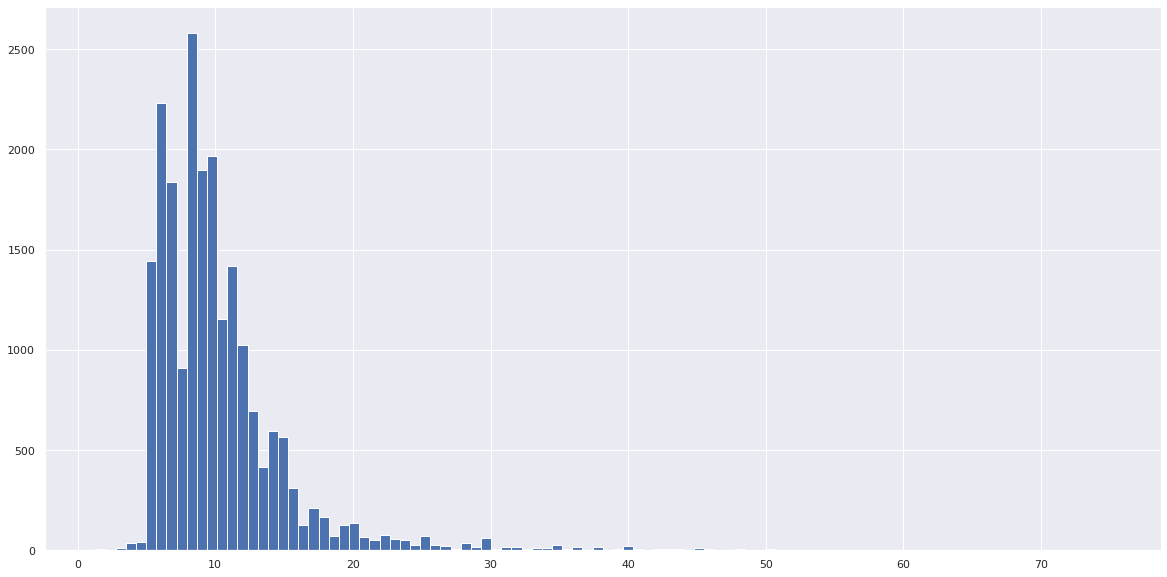

20217                16367  \
total_images                            7                    2   
last_price                        4250000              2720000   
total_area                          28.50                25.70   
first_day_exposition  2019-05-01 00:00:00  2017-10-30 00:00:00   
rooms                                   1                    1   
ceiling_height                       2.80                  NaN   
floors_total                           14                   19   
living_area                         19.50                22.59   
floor                                  10                   11   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         1.30                 2.00   
balcony                                 0                    0   
locality_name             Санкт-Петербург      Санкт-Петербург   
airports_nearest                 37199.00             14472.00   
cityCenters_nearest              12721.00             13268.00   
parks_around3000                     0.00                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                     0.00                 0.00   
ponds_nearest                         NaN                  NaN   
days_exposition                       NaN               109.00   

                                    11033                9138   \
total_images                            6                   17   
last_price                        5350000              2920000   
total_area                          32.00                23.30   
first_day_exposition  2016-04-20 00:00:00  2018-12-12 00:00:00   
rooms                                   1                    1   
ceiling_height                        NaN                  NaN   
floors_total                           14                    3   
living_area                         16.00                21.00   
floor                                  10                    1   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         2.00                 2.00   
balcony                                 0                    0   
locality_name             Санкт-Петербург      Санкт-Петербург   
airports_nearest                 19008.00             19506.00   
cityCenters_nearest               3953.00              4008.00   
parks_around3000                     0.00                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                     1.00                 2.00   
ponds_nearest                       69.00                45.00   
days_exposition                    210.00               107.00   

                                    6262   
total_images                            9  
last_price                        3100000  
total_area                          24.00  
first_day_exposition  2018-06-25 00:00:00  
rooms                                   2  
ceiling_height                       3.00  
floors_total                            5  
living_area                         16.00  
floor                                   5  
is_apartment                        False  
studio                              False  
open_plan                           False  
kitchen_area                         2.00  
balcony                                 0  
locality_name             Санкт-Петербург  
airports_nearest                 31960.00  
cityCenters_nearest               4914.00  
parks_around3000                     2.00  
parks_nearest                      426.00  
ponds_around3000                     1.00  
ponds_nearest                      936.00  
days_exposition               

In [35]:
col_miss('kitchen_area')
min_max_info('kitchen_area')

'kitchen_area' содержит данные о жилой площади в квартире в квадратных метрах. Как и столбец 'living_area', неуказание этих данных в обьявлении не препятствует добавлению на сайт (в отличие от общей площади, 'total_area', которая является обязательной для заполнения и где не наблюдается пропусков) - следовательно, причины возникновения могут быть аналогичны:

- Наиболее простым обьяснением является то, что пропуски в данном столбце являются комбинацией человеческого фактора (невнимательность/неосторожность/ожидание автоматической коррекции от сайта) и/или статусом "дополнительного" столбца на самом сайте (Яндекс.Недвижимость не запрещает разместить недвижимость с отсутствием данных в данном столбце).

Ситуация с пропусками аналогична столбцу living_area - заполним пропуски медианными значениями группировки по общей площади (сравнительно с жилой, кухонная площадь показывает меньшую корреляцию с общей площадью - 0.6 против 0.9 - но ее будет достаточно). После этого обрежем аномальные значения ниже 5 кв.м. - минимальной законной кухонной площади, и значения выше 50 кв.м. Так же прежде чем перейти к следующему столбцу, для уменьшения обьема занимаемой памяти заменим тип данных float64 на float16:

In [36]:
filt_data.query('kitchen_area > 50').count()

total_images            23
last_price              23
total_area              23
first_day_exposition    23
rooms                   23
ceiling_height          18
floors_total            23
living_area             23
floor                   23
is_apartment            23
studio                  23
open_plan               23
kitchen_area            23
balcony                 23
locality_name           23
airports_nearest        22
cityCenters_nearest     22
parks_around3000        22
parks_nearest           15
ponds_around3000        22
ponds_nearest           11
days_exposition         19
dtype: int64

count   22516.00
mean       10.18
std         4.77
min         5.00
25%         7.00
50%         9.00
75%        11.50
max        49.40
Name: kitchen_area, dtype: float64 

5 самых распространенных значений в столбце: 

10.00    1421
6.00     1391
9.00     1316
8.00     1228
7.00     1149
Name: kitchen_area, dtype: int64 

5 самых редких значений в столбце: 

16.74    1
5.29     1
9.31     1
9.82     1
5.85     1
Name: kitchen_area, dtype: int64 



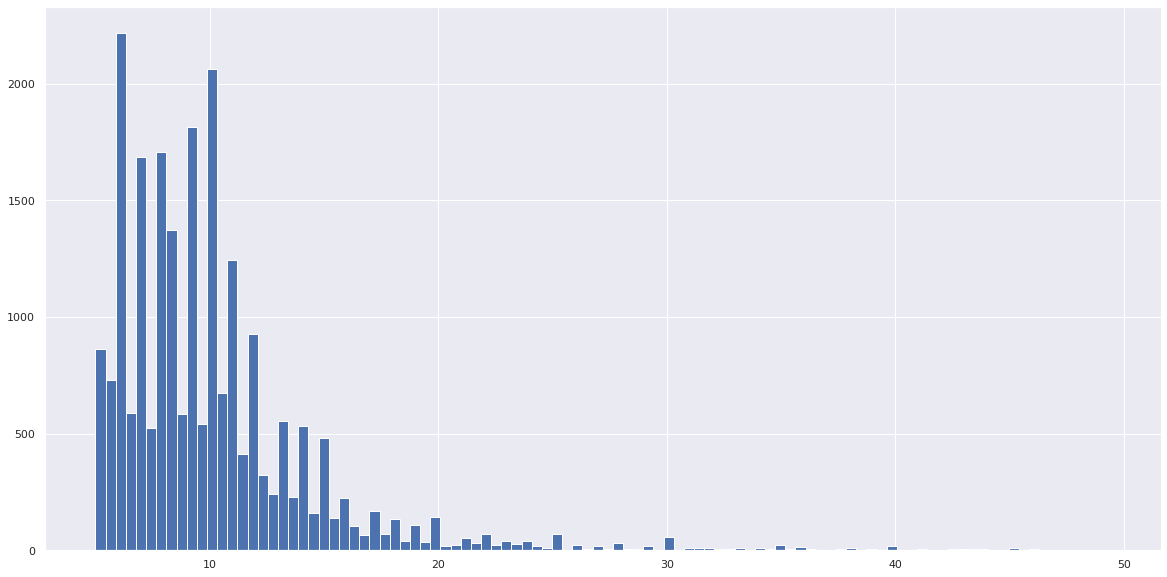

4096                 10707  \
total_images                           18                   15   
last_price                        4600000              2870000   
total_area                          46.00                45.00   
first_day_exposition  2018-12-08 00:00:00  2018-02-01 00:00:00   
rooms                                   2                    2   
ceiling_height                       2.50                  NaN   
floors_total                            5                    5   
living_area                         30.00                28.30   
floor                                   1                    4   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         5.00                 5.00   
balcony                                 0                    0   
locality_name             Санкт-Петербург              Колпино   
airports_nearest                 10353.00             24041.00   
cityCenters_nearest              11970.00             29827.00   
parks_around3000                     0.00                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                     0.00                 0.00   
ponds_nearest                         NaN                  NaN   
days_exposition                       NaN               255.00   

                                    5221                 18459  \
total_images                            4                    9   
last_price                        1050000              3995000   
total_area                          25.00                49.59   
first_day_exposition  2017-11-20 00:00:00  2018-03-27 00:00:00   
rooms                                   1                    4   
ceiling_height                        NaN                  NaN   
floors_total                            2                    5   
living_area                         20.00                38.00   
floor                                   1                    3   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         5.00                 5.00   
balcony                                 0                    0   
locality_name                      Выборг      Санкт-Петербург   
airports_nearest                      NaN             21797.00   
cityCenters_nearest                   NaN              8686.00   
parks_around3000                      NaN                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                      NaN                 3.00   
ponds_nearest                         NaN               348.00   
days_exposition                     98.00                  NaN   

                                    7190   
total_images                            9  
last_price                        5700000  
total_area                          44.00  
first_day_exposition  2019-04-09 00:00:00  
rooms                                   2  
ceiling_height                        NaN  
floors_total                            5  
living_area                         29.00  
floor                                   2  
is_apartment                        False  
studio                              False  
open_plan                           False  
kitchen_area                         5.00  
balcony                                 1  
locality_name             Санкт-Петербург  
airports_nearest                 31600.00  
cityCenters_nearest               4882.00  
parks_around3000                     1.00  
parks_nearest                      269.00  
ponds_around3000                     1.00  
ponds_nearest                      824.00  
days_exposition               

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [37]:
filt_data['kitchen_area'] = (
    filt_data['kitchen_area']
    .fillna(filt_data.groupby('total_area')['kitchen_area']
            .transform('median'))
)    
filt_data = filt_data[filt_data['kitchen_area'] >= 5]
filt_data = filt_data[filt_data['kitchen_area'] < 50]
min_max_info('kitchen_area')

filt_data = filt_data.query('total_area * 0.9 >= (living_area + kitchen_area)')

filt_data['kitchen_area'] = filt_data['kitchen_area'].astype('float16')
filt_data['kitchen_area'].dtype
filt_data.query('total_area * 0.9 < (living_area + kitchen_area)').count()

Далее рассмотрим столбец 'locality_name' - название населенного пункта.

Всего в столбце "floor" - 0 пропусков из 21978, или 0.0% 

count   21978.00
mean        5.83
std         4.81
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        27.00
Name: floor, dtype: float64 

5 самых распространенных значений в столбце: 

2    3136
3    2870
1    2715
4    2609
5    2441
Name: floor, dtype: int64 

5 самых редких значений в столбце: 

27     7
26    20
25    42
24    54
23    88
Name: floor, dtype: int64 



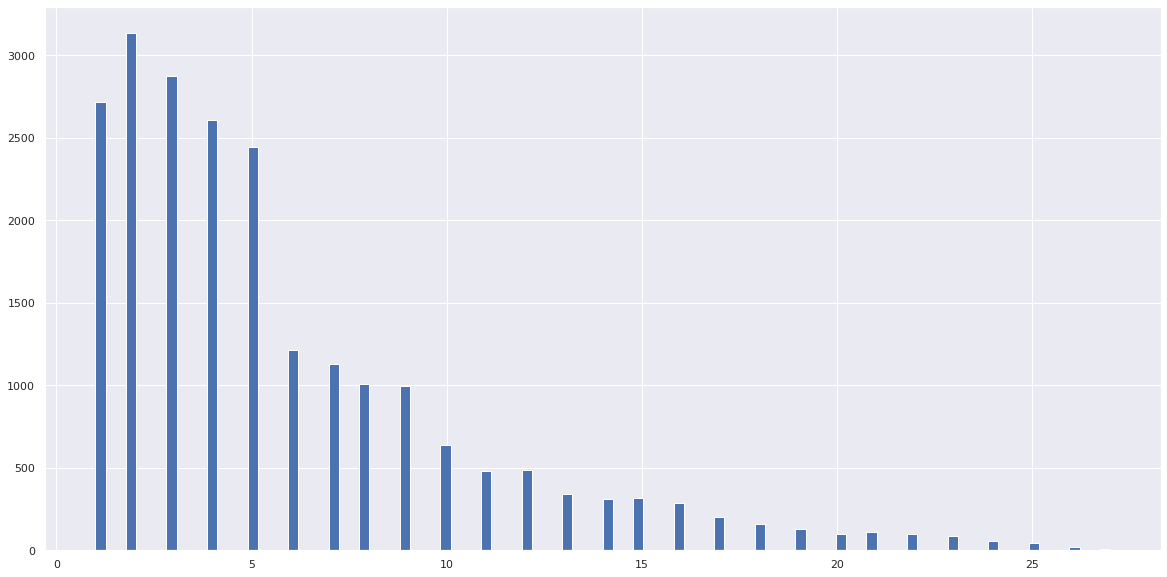

23696                15814  \
total_images                           18                    5   
last_price                        2500000              7300000   
total_area                          56.69               100.88   
first_day_exposition  2018-02-11 00:00:00  2018-10-11 00:00:00   
rooms                                   2                    5   
ceiling_height                        NaN                 2.55   
floors_total                            3                   10   
living_area                         29.70                62.50   
floor                                   1                    1   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         8.00                15.70   
balcony                                 0                    0   
locality_name            село Рождествено      Санкт-Петербург   
airports_nearest                      NaN             41627.00   
cityCenters_nearest                   NaN             11841.00   
parks_around3000                      NaN                 2.00   
parks_nearest                         NaN               162.00   
ponds_around3000                      NaN                 0.00   
ponds_nearest                         NaN                  NaN   
days_exposition                       NaN                  NaN   

                                    15803                4224   \
total_images                            6                    7   
last_price                        3900000              2850000   
total_area                          44.00                34.59   
first_day_exposition  2018-08-22 00:00:00  2019-03-14 00:00:00   
rooms                                   2                    1   
ceiling_height                        NaN                 2.50   
floors_total                            5                    7   
living_area                         29.00                18.09   
floor                                   1                    1   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         6.70                 7.10   
balcony                                 0                    0   
locality_name             Санкт-Петербург            Кронштадт   
airports_nearest                 46385.00             66669.00   
cityCenters_nearest              16697.00             48395.00   
parks_around3000                     0.00                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                     0.00                 2.00   
ponds_nearest                         NaN               166.00   
days_exposition                    117.00                  NaN   

                                    15794  
total_images                            7  
last_price                        2180000  
total_area                          55.00  
first_day_exposition  2018-08-07 00:00:00  
rooms                                   2  
ceiling_height                        NaN  
floors_total                            5  
living_area                         28.00  
floor                                   1  
is_apartment                        False  
studio                              False  
open_plan                           False  
kitchen_area                         9.00  
balcony                                 0  
locality_name                Новая Ладога  
airports_nearest                      NaN  
cityCenters_nearest                   NaN  
parks_around3000                      NaN  
parks_nearest                         NaN  
ponds_around3000                      NaN  
ponds_nearest                         NaN  
days_exposition               

In [38]:
col_miss('floor')
min_max_info('floor')

Столбец 'floor' содержит данные об этаже, на котором расположена квартира из обьявления. Пропусков в данных не обнаружено. Так как диапазон данных содержит значения в целых числах от 1 до 33, мы можем заменить тип данных int64 на int16 для экономии занимаемой памяти:

In [39]:
filt_data.query('floor > 25').count()

total_images            27
last_price              27
total_area              27
first_day_exposition    27
rooms                   27
ceiling_height          11
floors_total            27
living_area             27
floor                   27
is_apartment            27
studio                  27
open_plan               27
kitchen_area            27
balcony                 27
locality_name           27
airports_nearest        16
cityCenters_nearest     16
parks_around3000        16
parks_nearest            1
ponds_around3000        16
ponds_nearest            2
days_exposition         26
dtype: int64

count   21951.00
mean        5.81
std         4.76
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        25.00
Name: floor, dtype: float64 

5 самых распространенных значений в столбце: 

2    3136
3    2870
1    2715
4    2609
5    2441
Name: floor, dtype: int64 

5 самых редких значений в столбце: 

25     42
24     54
23     88
20     98
22    100
Name: floor, dtype: int64 



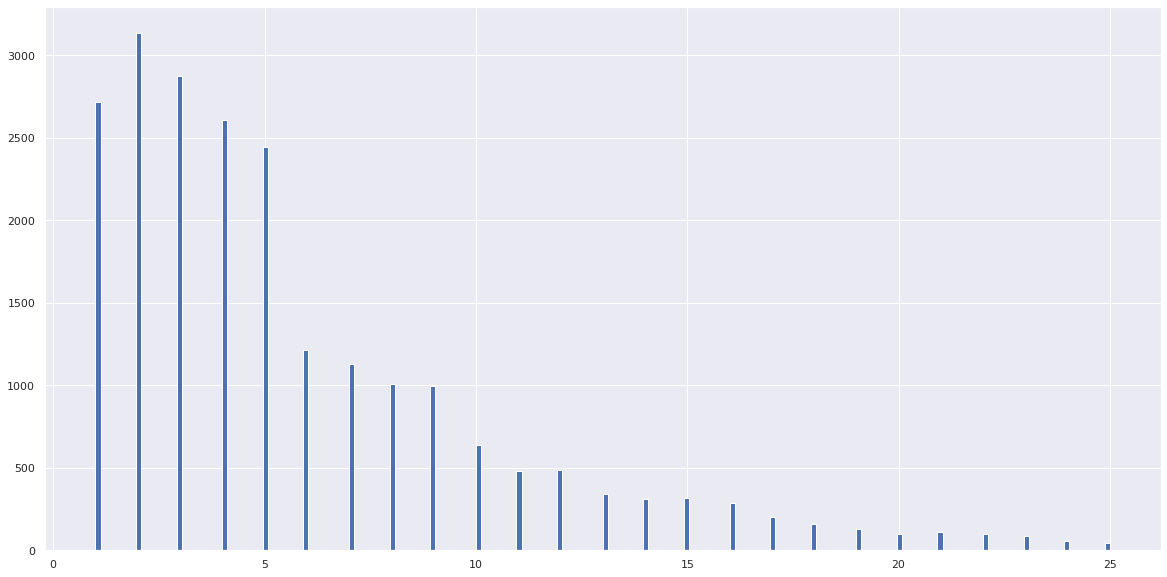

23696                21919  \
total_images                           18                   15   
last_price                        2500000              9850000   
total_area                          56.69                96.00   
first_day_exposition  2018-02-11 00:00:00  2018-07-13 00:00:00   
rooms                                   2                    5   
ceiling_height                        NaN                 3.00   
floors_total                            3                    7   
living_area                         29.70                68.00   
floor                                   1                    1   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         8.00                 7.00   
balcony                                 0                    0   
locality_name            село Рождествено      Санкт-Петербург   
airports_nearest                      NaN             21934.00   
cityCenters_nearest                   NaN              1483.00   
parks_around3000                      NaN                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                      NaN                 2.00   
ponds_nearest                         NaN               539.00   
days_exposition                       NaN                87.00   

                                    6582                 16222  \
total_images                            9                    1   
last_price                        3600000              3900000   
total_area                          56.19                54.00   
first_day_exposition  2018-02-15 00:00:00  2017-09-10 00:00:00   
rooms                                   3                    2   
ceiling_height                       2.50                 2.50   
floors_total                            4                    5   
living_area                         42.00                33.00   
floor                                   1                    1   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         5.60                 8.50   
balcony                                 0                    0   
locality_name                     Колпино            Ломоносов   
airports_nearest                 24311.00             47328.00   
cityCenters_nearest              30097.00             50752.00   
parks_around3000                     1.00                 0.00   
parks_nearest                      392.00                  NaN   
ponds_around3000                     0.00                 0.00   
ponds_nearest                         NaN                  NaN   
days_exposition                     39.00               238.00   

                                    2262   
total_images                           13  
last_price                        2600000  
total_area                          72.00  
first_day_exposition  2018-02-02 00:00:00  
rooms                                   3  
ceiling_height                       3.20  
floors_total                            2  
living_area                         53.00  
floor                                   1  
is_apartment                        False  
studio                              False  
open_plan                           False  
kitchen_area                         8.00  
balcony                                 0  
locality_name               посёлок Ропша  
airports_nearest                      NaN  
cityCenters_nearest                   NaN  
parks_around3000                      NaN  
parks_nearest                         NaN  
ponds_around3000                      NaN  
ponds_nearest                         NaN  
days_exposition               

dtype('int16')

In [40]:
filt_data = filt_data[filt_data['floor'] <= 25]
min_max_info('floor', 200)
filt_data['floor'] = filt_data['floor'].astype('int16')
filt_data['floor'].dtype

In [41]:
col_miss('locality_name')

Всего в столбце "locality_name" - 46 пропусков из 21951, или 0.2% 



'locality_name' содержит название населенного пункта, где находится квартира. Это обязательный пункт для заполнения и скорее всего заполняется автоматически за счет геолокации пользователя и/или автоматически по адресу предлагаемой квартиры.

- Гипотеза о природе пропусков в данном столбце в том, что пропуски являются технической ошибкой со стороны автоматизированных процессов сайта Яндекс.Недвижимость и/или ошибкой при сборе/выгрузке данных.

Так как количество пропусков составляет менее 1%, их можно удалить без значительного влияния на конечный результат. Однако, прежде чем это сделать, мы проверим столбец на предмет неявных дубликатов в названиях.

count               21905
unique                358
top       Санкт-Петербург
freq                14524
Name: locality_name, dtype: object 

5 самых распространенных значений в столбце: 

Санкт-Петербург    14524
посёлок Мурино       433
посёлок Шушары       417
Всеволожск           371
Пушкин               349
Name: locality_name, dtype: int64 

5 самых редких значений в столбце: 

деревня Выскатка                      1
деревня Тойворово                     1
коттеджный поселок Кивеннапа Север    1
деревня Иссад                         1
деревня Реброво                       1
Name: locality_name, dtype: int64 



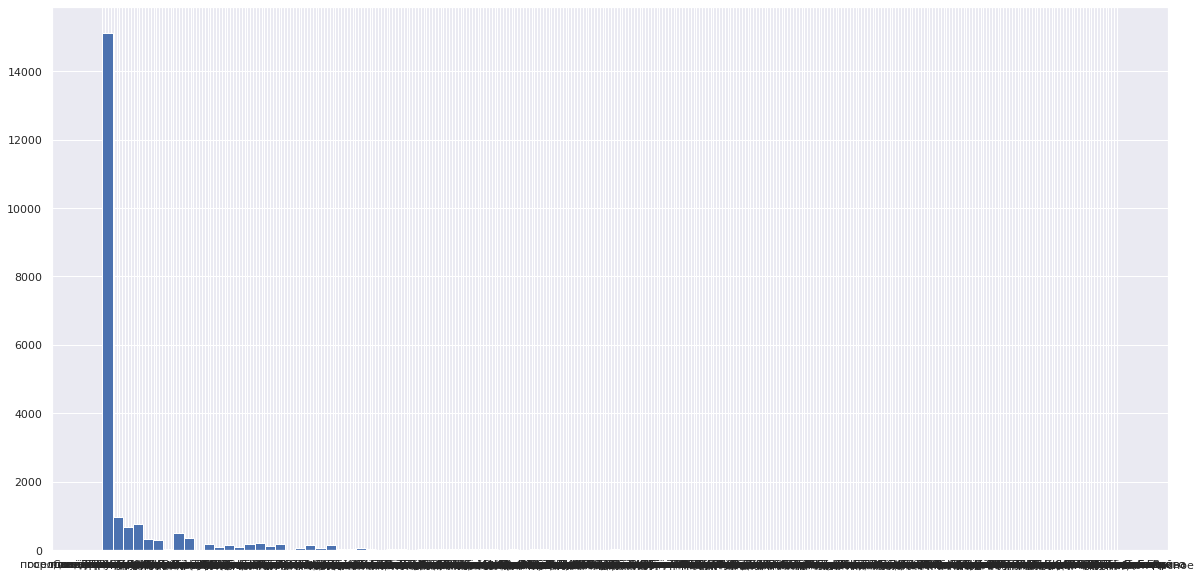

22267                3010   \
total_images                            0                    6   
last_price                         720000               850000   
total_area                          44.00                48.00   
first_day_exposition  2018-09-09 00:00:00  2016-03-11 00:00:00   
rooms                                   2                    2   
ceiling_height                        NaN                  NaN   
floors_total                            3                    5   
living_area                         27.34                27.00   
floor                                   2                    5   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         6.30                 8.20   
balcony                                 1                    0   
locality_name                Бокситогорск         Бокситогорск   
airports_nearest                      NaN                  NaN   
cityCenters_nearest                   NaN                  NaN   
parks_around3000                      NaN                  NaN   
parks_nearest                         NaN                  NaN   
ponds_around3000                      NaN                  NaN   
ponds_nearest                         NaN                  NaN   
days_exposition                      7.00               174.00   

                                    1761                 8779   \
total_images                           11                    9   
last_price                         999000               620000   
total_area                          62.00                36.00   
first_day_exposition  2018-02-15 00:00:00  2018-01-15 00:00:00   
rooms                                   4                    1   
ceiling_height                        NaN                  NaN   
floors_total                            5                    5   
living_area                         46.00                19.00   
floor                                   2                    5   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         7.00                 8.00   
balcony                                 0                    0   
locality_name                Бокситогорск         Бокситогорск   
airports_nearest                      NaN                  NaN   
cityCenters_nearest                   NaN                  NaN   
parks_around3000                      NaN                  NaN   
parks_nearest                         NaN                  NaN   
ponds_around3000                      NaN                  NaN   
ponds_nearest                         NaN                  NaN   
days_exposition                    226.00                45.00   

                                    18807  
total_images                           12  
last_price                        1500000  
total_area                          78.00  
first_day_exposition  2017-09-07 00:00:00  
rooms                                   3  
ceiling_height                       2.80  
floors_total                            4  
living_area                         47.00  
floor                                   3  
is_apartment                        False  
studio                              False  
open_plan                           False  
kitchen_area                        11.00  
balcony                                 1  
locality_name                Бокситогорск  
airports_nearest                      NaN  
cityCenters_nearest                   NaN  
parks_around3000                      NaN  
parks_nearest                         NaN  
ponds_around3000                      NaN  
ponds_nearest                         NaN  
days_exposition               

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [42]:
min_max_info('locality_name')
filt_data['locality_name'].sort_values().unique()

При первичном осмотре видно много дубликатов из-за написания слова посёлок через буквы ё и е. Также используются равные понятия городской посёлок и посёлок городского типа. Сделаем соответствующие замены:

Всего в столбце "locality_name" - 0 пропусков из 21905, или 0.0% 

count               21905
unique                317
top       Санкт-Петербург
freq                14524
Name: locality_name, dtype: object 

5 самых распространенных значений в столбце: 

Санкт-Петербург    14524
поселок Мурино       459
поселок Шушары       417
Всеволожск           371
Пушкин               349
Name: locality_name, dtype: int64 

5 самых редких значений в столбце: 

поселок Платформа 69-й километр    1
деревня Мануйлово                  1
деревня Курковицы                  1
деревня Лаврики                    1
поселок Пчевжа                     1
Name: locality_name, dtype: int64 



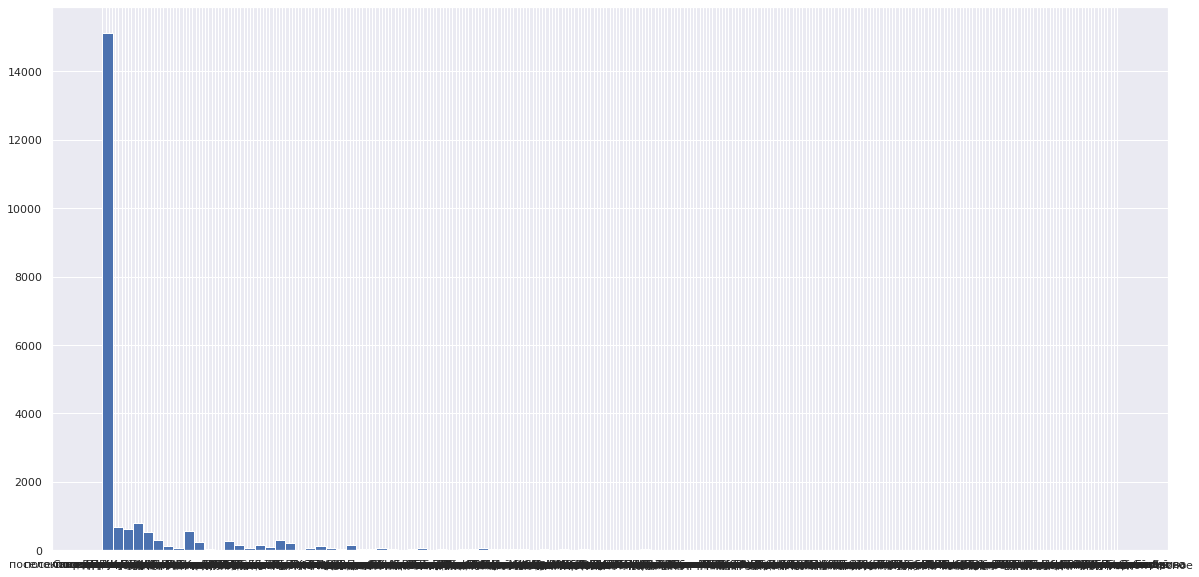

22267                3010   \
total_images                            0                    6   
last_price                         720000               850000   
total_area                          44.00                48.00   
first_day_exposition  2018-09-09 00:00:00  2016-03-11 00:00:00   
rooms                                   2                    2   
ceiling_height                        NaN                  NaN   
floors_total                            3                    5   
living_area                         27.34                27.00   
floor                                   2                    5   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         6.30                 8.20   
balcony                                 1                    0   
locality_name                Бокситогорск         Бокситогорск   
airports_nearest                      NaN                  NaN   
cityCenters_nearest                   NaN                  NaN   
parks_around3000                      NaN                  NaN   
parks_nearest                         NaN                  NaN   
ponds_around3000                      NaN                  NaN   
ponds_nearest                         NaN                  NaN   
days_exposition                      7.00               174.00   

                                    1761                 8779   \
total_images                           11                    9   
last_price                         999000               620000   
total_area                          62.00                36.00   
first_day_exposition  2018-02-15 00:00:00  2018-01-15 00:00:00   
rooms                                   4                    1   
ceiling_height                        NaN                  NaN   
floors_total                            5                    5   
living_area                         46.00                19.00   
floor                                   2                    5   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         7.00                 8.00   
balcony                                 0                    0   
locality_name                Бокситогорск         Бокситогорск   
airports_nearest                      NaN                  NaN   
cityCenters_nearest                   NaN                  NaN   
parks_around3000                      NaN                  NaN   
parks_nearest                         NaN                  NaN   
ponds_around3000                      NaN                  NaN   
ponds_nearest                         NaN                  NaN   
days_exposition                    226.00                45.00   

                                    18807  
total_images                           12  
last_price                        1500000  
total_area                          78.00  
first_day_exposition  2017-09-07 00:00:00  
rooms                                   3  
ceiling_height                       2.80  
floors_total                            4  
living_area                         47.00  
floor                                   3  
is_apartment                        False  
studio                              False  
open_plan                           False  
kitchen_area                        11.00  
balcony                                 1  
locality_name                Бокситогорск  
airports_nearest                      NaN  
cityCenters_nearest                   NaN  
parks_around3000                      NaN  
parks_nearest                         NaN  
ponds_around3000                      NaN  
ponds_nearest                         NaN  
days_exposition               

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [43]:
filt_data['locality_name'] = filt_data['locality_name'].str.replace('ё', 'е')
filt_data['locality_name'] = filt_data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

filt_data = filt_data.loc[filt_data['locality_name'].notna()]

col_miss('locality_name')
min_max_info('locality_name')
filt_data['locality_name'].sort_values().unique()

После замен количество уникальных значений уменьшилось, других дубликатов не было обнаружено. Возможно для исследования нам пригодится понимание того, к какому типу местности относится объявление. Создадим в таблице новый столбец locality_type и категоризуем в нём данные столбца locality_name:

In [44]:
# check
filt_data['locality_name'].nunique()

317

In [45]:
def loc_type(name): 
    
    '''Функция для присвоения категории в соответствии с типом поселения:
       'city' - категория для Санкт-Петербурга, 'settlement' - категория для поселков,
       'village' - для сел, деревень или СНТ, 'town' - для городов в области, кроме Санкт-Петербурга.'''
    
    if 'Санкт-Петербург' in name:
        return 'city' # категория для СПБ
    if 'поселок' in name:
        return 'settlement' # поселок
    if 'садов' in name or 'деревня' in name or 'село' in name:
        return 'village' # село, деревня или СНТ
    else:
        return 'town' # город(кроме СПБ)

# функция loc_type анализирует строки на наличие заданных совпадений и возвращает соответствующую категорию
    
# попробуем функцию на срезе списка уникальных значений locality_name   
try: 
    locality_unique = filt_data['locality_name'][:25].unique()
    
    for locality in locality_unique:
        display(f'Поселение "{locality}", относится к категории "{loc_type(locality)}"')    
        
except:
    display('Функция не сработала')

'Поселение "Санкт-Петербург", относится к категории "city"'

'Поселение "поселок Шушары", относится к категории "settlement"'

'Поселение "поселок городского типа Янино-1", относится к категории "settlement"'

'Поселение "Ломоносов", относится к категории "town"'

'Поселение "Сертолово", относится к категории "town"'

'Поселение "Петергоф", относится к категории "town"'

'Поселение "Пушкин", относится к категории "town"'

'Поселение "поселок Парголово", относится к категории "settlement"'

'Поселение "деревня Кудрово", относится к категории "village"'

In [46]:
filt_data['locality_type'] = filt_data['locality_name'].apply(loc_type) # создаём столбец с результатами работы функции
filt_data = filt_data.reindex(columns=['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'locality_type', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition']) 
# зададим новый порядок столбцов, чтобы столбец `locality_type` шёл сразу после `locality_name`

filt_data.columns # выводим список колонок
filt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21905 entries, 0 to 23696
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21905 non-null  int16         
 1   last_price            21905 non-null  int32         
 2   total_area            21905 non-null  float16       
 3   first_day_exposition  21905 non-null  datetime64[ns]
 4   rooms                 21905 non-null  int16         
 5   ceiling_height        13566 non-null  float64       
 6   floors_total          21905 non-null  int16         
 7   living_area           21905 non-null  float16       
 8   floor                 21905 non-null  int16         
 9   is_apartment          21905 non-null  bool          
 10  studio                21905 non-null  bool          
 11  open_plan             21905 non-null  bool          
 12  kitchen_area          21905 non-null  float16       
 13  balcony         

Всего в столбце "airports_nearest" - 5107 пропусков из 21905, или 23.3% 

count   16798.00
mean    28874.27
std     12684.11
min         0.00
25%     18462.00
50%     26929.50
75%     37412.00
max     84869.00
Name: airports_nearest, dtype: float64 

5 самых распространенных значений в столбце: 

37434.00    60
21928.00    28
39946.00    28
37407.00    27
44870.00    25
Name: airports_nearest, dtype: int64 

5 самых редких значений в столбце: 

27069.00    1
27261.00    1
23226.00    1
58571.00    1
19945.00    1
Name: airports_nearest, dtype: int64 



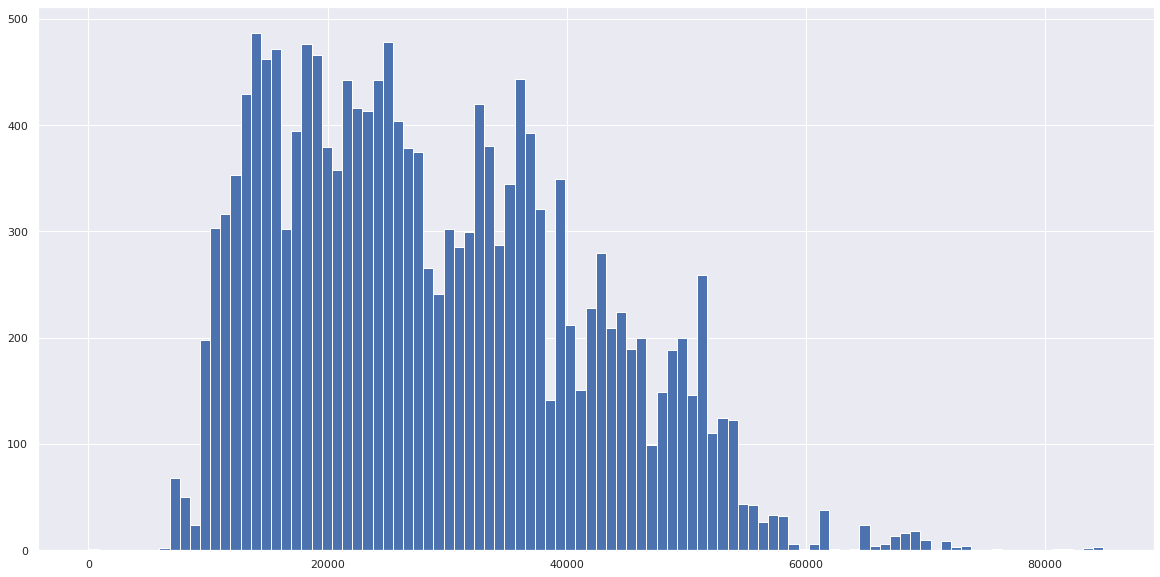

21085                4017   \
total_images                            0                    7   
last_price                        7000000              2268000   
total_area                          34.69                35.00   
first_day_exposition  2018-09-23 00:00:00  2017-12-21 00:00:00   
rooms                                   1                    1   
ceiling_height                       2.70                  NaN   
floors_total                            9                    9   
living_area                         19.80                14.00   
floor                                   3                    6   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         6.00                 8.00   
balcony                                 2                    0   
locality_name             Санкт-Петербург      Санкт-Петербург   
locality_type                        city                 city   
airports_nearest                     0.00              6450.00   
cityCenters_nearest              22801.00             17461.00   
parks_around3000                     0.00                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                     0.00                 1.00   
ponds_nearest                         NaN               444.00   
days_exposition                     60.00                25.00   

                                    12899                7778   \
total_images                            8                    9   
last_price                        4199000              2750000   
total_area                          56.00                29.00   
first_day_exposition  2017-12-21 00:00:00  2017-02-19 00:00:00   
rooms                                   2                    1   
ceiling_height                        NaN                 2.50   
floors_total                            9                    4   
living_area                         27.00                15.00   
floor                                   5                    1   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                        15.00                 6.00   
balcony                                 0                    0   
locality_name             Санкт-Петербург      Санкт-Петербург   
locality_type                        city                 city   
airports_nearest                  6450.00              6914.00   
cityCenters_nearest              17461.00             21486.00   
parks_around3000                     0.00                 1.00   
parks_nearest                         NaN               215.00   
ponds_around3000                     1.00                 0.00   
ponds_nearest                      444.00                  NaN   
days_exposition                     24.00                43.00   

                                    23150  
total_images                            3  
last_price                        6490000  
total_area                          62.50  
first_day_exposition  2015-03-18 00:00:00  
rooms                                   2  
ceiling_height                        NaN  
floors_total                           24  
living_area                         33.50  
floor                                  15  
is_apartment                        False  
studio                              False  
open_plan                           False  
kitchen_area                         9.00  
balcony                                 4  
locality_name             Санкт-Петербург  
locality_type                        city  
airports_nearest                  6949.00  
cityCenters_nearest              13165.00  
parks_around3000              

Всего в столбце "cityCenters_nearest" - 5087 пропусков из 21905, или 23.2% 

count   16818.00
mean    14358.91
std      8596.65
min       181.00
25%      9572.50
50%     13177.50
75%     16304.50
max     65968.00
Name: cityCenters_nearest, dtype: float64 

5 самых распространенных значений в столбце: 

8460.00     60
10720.00    28
20802.00    27
8434.00     27
10364.00    24
Name: cityCenters_nearest, dtype: int64 

5 самых редких значений в столбце: 

12323.00    1
2487.00     1
5313.00     1
32358.00    1
3618.00     1
Name: cityCenters_nearest, dtype: int64 



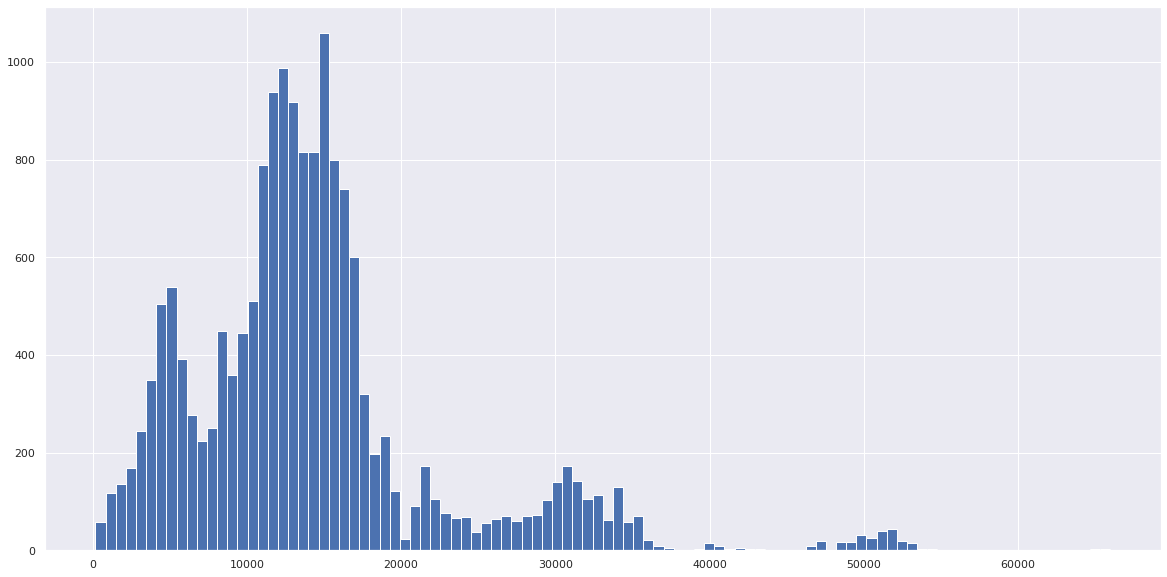

13694                1182   \
total_images                            2                    1   
last_price                       31099000              5800000   
total_area                         159.00                33.59   
first_day_exposition  2018-06-25 00:00:00  2016-03-10 00:00:00   
rooms                                   5                    1   
ceiling_height                       3.28                 3.70   
floors_total                            5                    7   
living_area                        106.00                22.80   
floor                                   5                    4   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                        15.00                 6.60   
balcony                                 0                    0   
locality_name             Санкт-Петербург      Санкт-Петербург   
locality_type                        city                 city   
airports_nearest                 21633.00             21632.00   
cityCenters_nearest                181.00               208.00   
parks_around3000                     2.00                 3.00   
parks_nearest                      254.00               304.00   
ponds_around3000                     3.00                 3.00   
ponds_nearest                      426.00               503.00   
days_exposition                       NaN               167.00   

                                    8614                 1934   \
total_images                            7                   18   
last_price                       10990000              9590000   
total_area                         100.00               108.00   
first_day_exposition  2015-12-16 00:00:00  2017-05-23 00:00:00   
rooms                                   3                    2   
ceiling_height                       3.90                 3.30   
floors_total                            5                    5   
living_area                         37.81                59.00   
floor                                   3                    2   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                        11.60                11.00   
balcony                                 0                    0   
locality_name             Санкт-Петербург      Санкт-Петербург   
locality_type                        city                 city   
airports_nearest                 21818.00             21908.00   
cityCenters_nearest                215.00               287.00   
parks_around3000                     3.00                 3.00   
parks_nearest                      229.00               359.00   
ponds_around3000                     2.00                 3.00   
ponds_nearest                      511.00               290.00   
days_exposition                    265.00                69.00   

                                    20873  
total_images                           18  
last_price                       11500000  
total_area                         113.50  
first_day_exposition  2018-09-17 00:00:00  
rooms                                   3  
ceiling_height                       4.20  
floors_total                            7  
living_area                         44.19  
floor                                   6  
is_apartment                        False  
studio                              False  
open_plan                           False  
kitchen_area                        21.70  
balcony                                 1  
locality_name             Санкт-Петербург  
locality_type                        city  
airports_nearest                 21739.00  
cityCenters_nearest                291.00  
parks_around3000              

Всего в столбце "parks_around3000" - 5086 пропусков из 21905, или 23.2% 

count   16819.00
mean        0.60
std         0.79
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         3.00
Name: parks_around3000, dtype: float64 

5 самых распространенных значений в столбце: 

0.00    9405
1.00    5312
2.00    1548
3.00     554
Name: parks_around3000, dtype: int64 

5 самых редких значений в столбце: 

3.00     554
2.00    1548
1.00    5312
0.00    9405
Name: parks_around3000, dtype: int64 



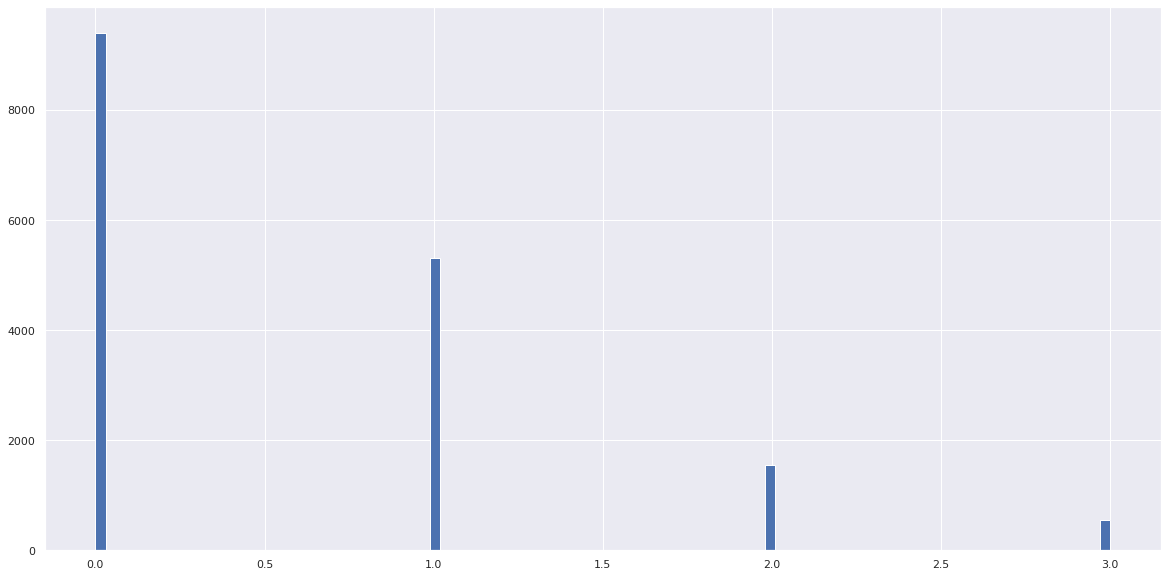

11816                10072  \
total_images                           12                    2   
last_price                        6350000              6329970   
total_area                          71.62                34.56   
first_day_exposition  2018-09-05 00:00:00  2015-01-05 00:00:00   
rooms                                   3                    1   
ceiling_height                       2.50                 2.80   
floors_total                            9                   12   
living_area                         48.19                13.62   
floor                                   9                   12   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         7.60                12.55   
balcony                                 1                    2   
locality_name             Санкт-Петербург      Санкт-Петербург   
locality_type                        city                 city   
airports_nearest                 50957.00             19466.00   
cityCenters_nearest              16285.00              4096.00   
parks_around3000                     0.00                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                     0.00                 1.00   
ponds_nearest                         NaN               129.00   
days_exposition                     37.00               577.00   

                                    18536                10074  \
total_images                            7                    6   
last_price                        4400000             21000000   
total_area                          39.00               172.00   
first_day_exposition  2018-06-22 00:00:00  2017-10-26 00:00:00   
rooms                                   1                    5   
ceiling_height                       2.65                 3.60   
floors_total                           25                    6   
living_area                         18.41               123.00   
floor                                  21                    6   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         9.50                14.00   
balcony                                 2                    1   
locality_name             Санкт-Петербург      Санкт-Петербург   
locality_type                        city                 city   
airports_nearest                 30073.00             22480.00   
cityCenters_nearest              10337.00              3748.00   
parks_around3000                     0.00                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                     0.00                 1.00   
ponds_nearest                         NaN               572.00   
days_exposition                      4.00               300.00   

                                    10075  
total_images                           13  
last_price                        4200000  
total_area                          35.81  
first_day_exposition  2017-10-30 00:00:00  
rooms                                   1  
ceiling_height                        NaN  
floors_total                           14  
living_area                         17.80  
floor                                   2  
is_apartment                        False  
studio                              False  
open_plan                           False  
kitchen_area                         8.10  
balcony                                 0  
locality_name             Санкт-Петербург  
locality_type                        city  
airports_nearest                 37534.00  
cityCenters_nearest              12606.00  
parks_around3000              

Всего в столбце "parks_nearest" - 14487 пропусков из 21905, или 66.1% 

count   7418.00
mean     492.74
std      341.06
min        1.00
25%      289.25
50%      456.00
75%      613.00
max     3190.00
Name: parks_nearest, dtype: float64 

5 самых распространенных значений в столбце: 

441.00    66
392.00    39
456.00    38
173.00    37
458.00    28
Name: parks_nearest, dtype: int64 

5 самых редких значений в столбце: 

225.00     1
769.00     1
932.00     1
730.00     1
1186.00    1
Name: parks_nearest, dtype: int64 



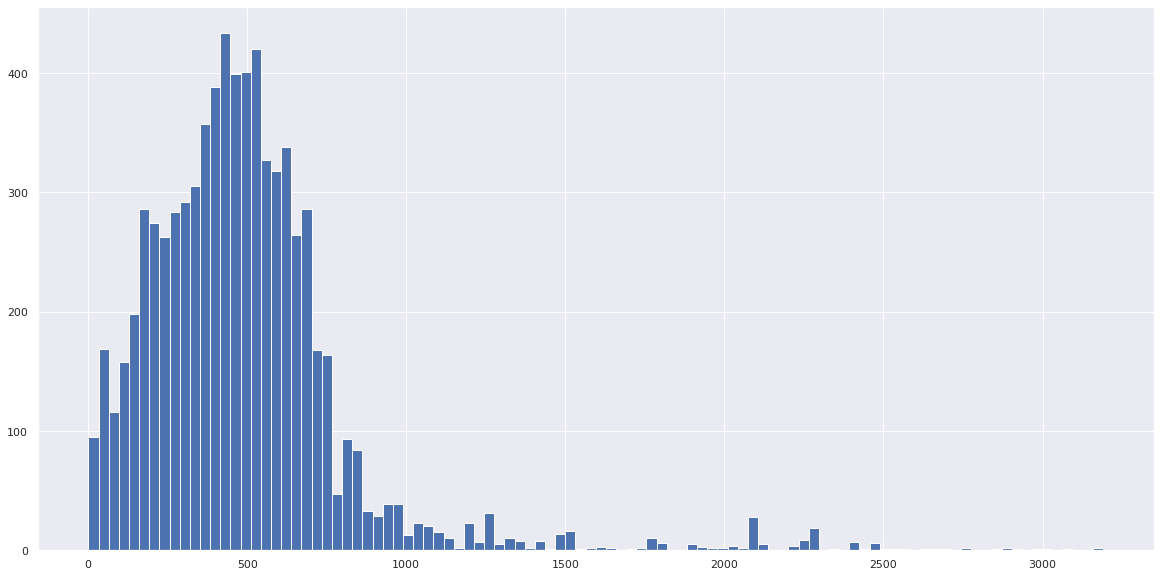

14624                11949  \
total_images                            8                    7   
last_price                        3770000              4500000   
total_area                          45.41                44.00   
first_day_exposition  2019-03-20 00:00:00  2017-11-24 00:00:00   
rooms                                   2                    2   
ceiling_height                        NaN                 2.60   
floors_total                            9                    9   
living_area                         28.44                30.00   
floor                                   2                    7   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         6.90                 7.00   
balcony                                 0                    0   
locality_name             Санкт-Петербург      Санкт-Петербург   
locality_type                        city                 city   
airports_nearest                 43932.00             11806.00   
cityCenters_nearest              16436.00             12292.00   
parks_around3000                     1.00                 1.00   
parks_nearest                        1.00                 3.00   
ponds_around3000                     0.00                 1.00   
ponds_nearest                         NaN               508.00   
days_exposition                     42.00                82.00   

                                    22941                9344   \
total_images                            8                   12   
last_price                       10965000              3000000   
total_area                          69.31                28.09   
first_day_exposition  2019-01-10 00:00:00  2017-07-25 00:00:00   
rooms                                   1                    1   
ceiling_height                       3.00                 2.50   
floors_total                            4                    9   
living_area                         48.91                17.00   
floor                                   4                    1   
is_apartment                         True                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                        11.40                 5.60   
balcony                                 2                    0   
locality_name                 Зеленогорск      Санкт-Петербург   
locality_type                        town                 city   
airports_nearest                 73391.00             12051.00   
cityCenters_nearest              54490.00             11665.00   
parks_around3000                     3.00                 1.00   
parks_nearest                        4.00                 7.00   
ponds_around3000                     1.00                 1.00   
ponds_nearest                      217.00               780.00   
days_exposition                    110.00               440.00   

                                    20193  
total_images                            3  
last_price                       11809670  
total_area                         102.62  
first_day_exposition  2017-04-21 00:00:00  
rooms                                   3  
ceiling_height                        NaN  
floors_total                            9  
living_area                         53.50  
floor                                   3  
is_apartment                        False  
studio                              False  
open_plan                           False  
kitchen_area                        17.80  
balcony                                 2  
locality_name             Санкт-Петербург  
locality_type                        city  
airports_nearest                 27562.00  
cityCenters_nearest               6410.00  
parks_around3000              

Всего в столбце "ponds_around3000" - 5086 пропусков из 21905, или 23.2% 

count   16819.00
mean        0.75
std         0.93
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         3.00
Name: ponds_around3000, dtype: float64 

5 самых распространенных значений в столбце: 

0.00    8547
1.00    5251
2.00    1721
3.00    1300
Name: ponds_around3000, dtype: int64 

5 самых редких значений в столбце: 

3.00    1300
2.00    1721
1.00    5251
0.00    8547
Name: ponds_around3000, dtype: int64 



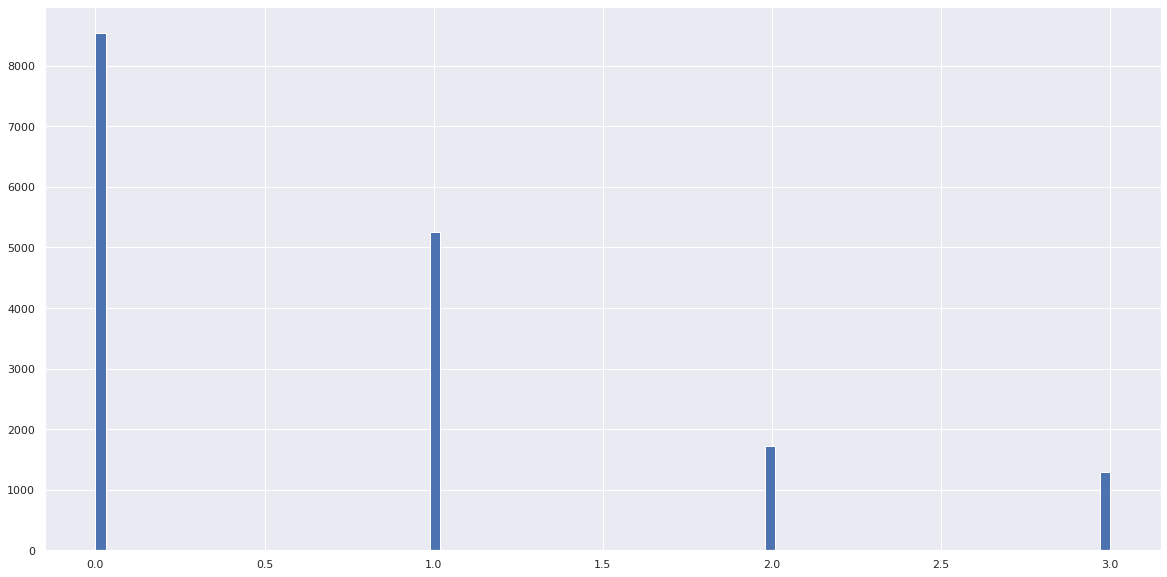

11816                11536  \
total_images                           12                   14   
last_price                        6350000              3150000   
total_area                          71.62                37.09   
first_day_exposition  2018-09-05 00:00:00  2018-09-14 00:00:00   
rooms                                   3                    1   
ceiling_height                       2.50                 2.60   
floors_total                            9                   15   
living_area                         48.19                18.09   
floor                                   9                    3   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         7.60                 7.80   
balcony                                 1                    1   
locality_name             Санкт-Петербург             Петергоф   
locality_type                        city                 town   
airports_nearest                 50957.00             45466.00   
cityCenters_nearest              16285.00             34297.00   
parks_around3000                     0.00                 1.00   
parks_nearest                         NaN               524.00   
ponds_around3000                     0.00                 0.00   
ponds_nearest                         NaN                  NaN   
days_exposition                     37.00                20.00   

                                    11537                11540  \
total_images                            6                   20   
last_price                        4500000              4940000   
total_area                          65.00                40.81   
first_day_exposition  2017-04-29 00:00:00  2018-07-11 00:00:00   
rooms                                   3                    1   
ceiling_height                        NaN                 3.00   
floors_total                            9                   16   
living_area                         47.41                16.70   
floor                                   1                   15   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         6.20                12.30   
balcony                                 2                    0   
locality_name             Санкт-Петербург      Санкт-Петербург   
locality_type                        city                 city   
airports_nearest                 36007.00             38642.00   
cityCenters_nearest              10718.00             12548.00   
parks_around3000                     0.00                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                     0.00                 0.00   
ponds_nearest                         NaN                  NaN   
days_exposition                    160.00               137.00   

                                    11542  
total_images                            5  
last_price                        4800000  
total_area                          44.31  
first_day_exposition  2015-06-30 00:00:00  
rooms                                   1  
ceiling_height                        NaN  
floors_total                           14  
living_area                         17.00  
floor                                  13  
is_apartment                        False  
studio                              False  
open_plan                           False  
kitchen_area                        12.60  
balcony                                 0  
locality_name             Санкт-Петербург  
locality_type                        city  
airports_nearest                 29549.00  
cityCenters_nearest              10764.00  
parks_around3000              

Всего в столбце "ponds_nearest" - 13633 пропусков из 21905, или 62.2% 

count   8272.00
mean     524.06
std      277.07
min       13.00
25%      303.00
50%      507.50
75%      734.00
max     1344.00
Name: ponds_nearest, dtype: float64 

5 самых распространенных значений в столбце: 

427.00    68
454.00    40
433.00    37
474.00    36
564.00    34
Name: ponds_nearest, dtype: int64 

5 самых редких значений в столбце: 

995.00     1
889.00     1
1141.00    1
1103.00    1
1126.00    1
Name: ponds_nearest, dtype: int64 



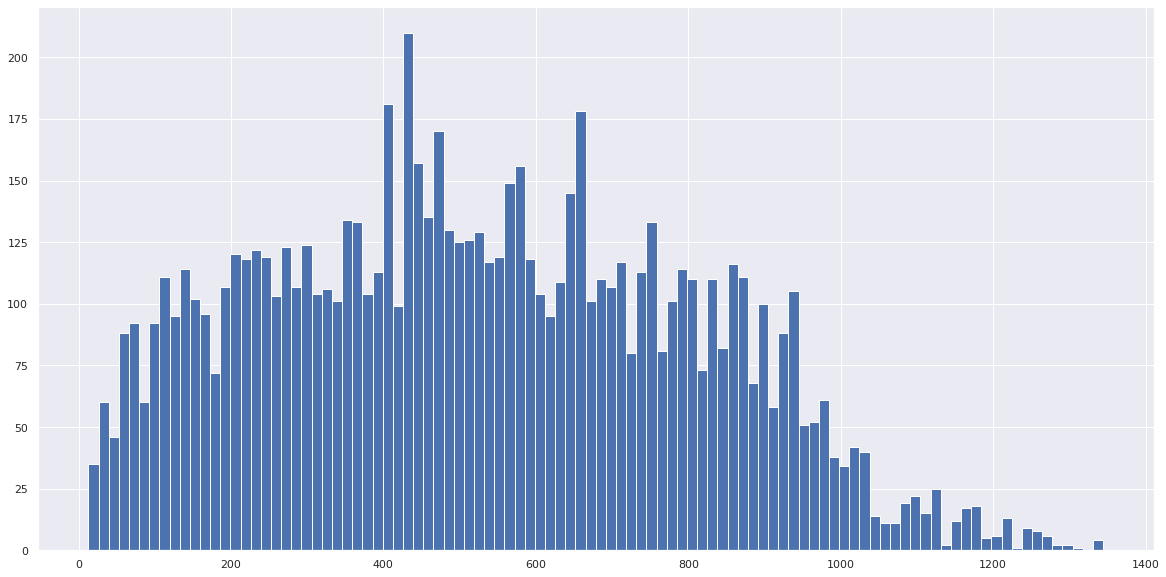

1548                 17585  \
total_images                            1                   14   
last_price                       12300000             12900000   
total_area                          90.00                86.00   
first_day_exposition  2018-03-03 00:00:00  2018-12-08 00:00:00   
rooms                                   3                    3   
ceiling_height                        NaN                  NaN   
floors_total                            8                    8   
living_area                         55.00                45.00   
floor                                   3                    7   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                        14.00                22.00   
balcony                                 0                    0   
locality_name             Санкт-Петербург      Санкт-Петербург   
locality_type                        city                 city   
airports_nearest                 18689.00             18689.00   
cityCenters_nearest              17691.00             17691.00   
parks_around3000                     1.00                 1.00   
parks_nearest                     1145.00              1145.00   
ponds_around3000                     2.00                 2.00   
ponds_nearest                       13.00                13.00   
days_exposition                    347.00                  NaN   

                                    10358                18845  \
total_images                            8                    9   
last_price                       16399282              8600000   
total_area                         205.00                68.38   
first_day_exposition  2017-06-29 00:00:00  2018-08-19 00:00:00   
rooms                                   4                    2   
ceiling_height                        NaN                 3.06   
floors_total                            8                   17   
living_area                         84.69                33.59   
floor                                   1                   13   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                        11.36                13.00   
balcony                                 0                    2   
locality_name             Санкт-Петербург      Санкт-Петербург   
locality_type                        city                 city   
airports_nearest                 18140.00             18140.00   
cityCenters_nearest              17143.00             17143.00   
parks_around3000                     1.00                 1.00   
parks_nearest                     1514.00              1514.00   
ponds_around3000                     2.00                 2.00   
ponds_nearest                       16.00                16.00   
days_exposition                       NaN                31.00   

                                    1733   
total_images                            8  
last_price                        8300000  
total_area                          70.00  
first_day_exposition  2016-01-29 00:00:00  
rooms                                   2  
ceiling_height                       3.20  
floors_total                            8  
living_area                         42.00  
floor                                   7  
is_apartment                        False  
studio                              False  
open_plan                           False  
kitchen_area                        12.00  
balcony                                 2  
locality_name             Санкт-Петербург  
locality_type                        city  
airports_nearest                 18140.00  
cityCenters_nearest              17143.00  
parks_around3000              

In [47]:
geo_list = filt_data.columns.to_list()[-7:-1]

for i in range(len(geo_list)):
    col_miss(geo_list[i])
    min_max_info(geo_list[i])

Данные в этой группе столбцов содержат географическую информацию о расположении квартиры относительно определенных обьектов: расстояние до ближайшего аэропорта, расстояние до центра населенного пункта, число парков в радиусе 3 км, расстояние до ближайшего парка, число водоемов в радиусе 3 км и расстояние до ближайшего водоема. Так как это данные, предоставленные алгоритмами Яндекс.Недвижимости на основании адреса квартиры после публикования обьявления, пользователь не может напрямую влиять на пропуски данных в столбцах. Следовательно, вывод аналогичен некоторым из ранее описаных столбцов:

- Гипотеза о природе пропусков в данном столбце в том, что пропуски являются технической ошибкой со стороны автоматизированных процессов сайта Яндекс.Недвижимость и/или ошибкой при сборе/выгрузке данных.

В техническом задании указано, что исследовательский анализ данных должен содержать трое из указанных столбцов: "cityCenters_nearest" - расстояние до центра города в метрах; "airports_nearest" - расстояние до ближайшего аэропорта; "parks_nearest" - расстояние до ближайшего парка. На выведенных данных сразу бросается в глаза: 

1) аномально низкое значение 'airports_nearest' в стороке 21085 (скорее всего ошибка ручного ввода данных); 

2) несоответствущий диапазону данных в столбцах тип float64 - данные в столбцах с 'nearest' содержат расстояние в метрах от 0 до 84869(что можно заменить на float32), а столбцы с 'around' содержат числа от 0 до 3(что можно заменить на float16);

3) несоответствие между количеством пропусков в столбцах с дистанцией до ближайшего обьекта и наличием/отсутствием обьектов в радиусе 3000 метров - например, пропуски в столбце наличия/отсутствия парков в радиусе 3000 метров составляют 23.2%, а в столбце с расстоянием до ближайшего парка - 65.8%. При поверхностном осмотре данных выше можно заметить, что наличие данных в parks_nearby не означает наличие данных в parks_around3000 и наоборот. 


Косвенных параметров для заполнения пропусков в датасете нет, как и значительной корреляции с данными других столбцов. Мы можем попробовать использовать новый столбец locality_type и посчитать корреляцию в разрезе типов поселений по ближайшему аэропорту и по расстоянию до центра:

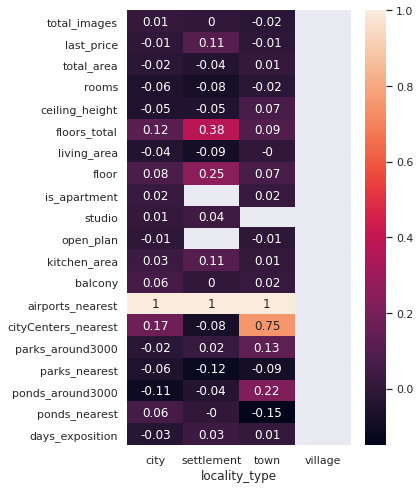

In [48]:
loc_corr = round(filt_data.groupby('locality_type').corrwith(filt_data['airports_nearest']).T, 2)
plt.figure(figsize=(5,8))
sns.heatmap(loc_corr, annot=True) 
plt.show()

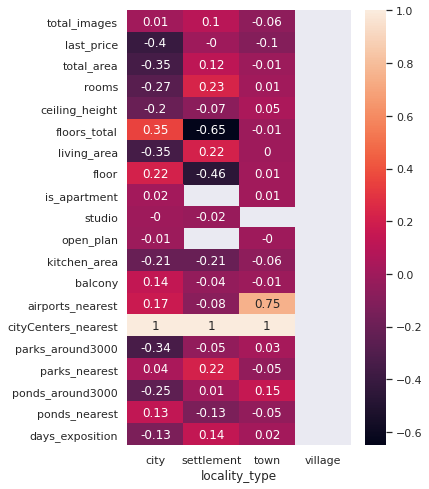

In [49]:
loc_corr = round(filt_data.groupby('locality_type').corrwith(filt_data['cityCenters_nearest']).T, 2)
plt.figure(figsize=(5,8))
sns.heatmap(loc_corr, annot=True) 
plt.show()

В первоначальном обзоре всех данных корреляция airports_nearest и cityCenters_nearest не превышала 0.3, тогда как при группировке по аэропортам видна сильная корреляция между cityCenters_nearest и town, а при группировке по расстоянию до центра - значительная корреляция между town и airports_nearest. Есть заметная отрицательная корреляция между settlement, floors, и floors_total. Так же есть большое количество пропусков is_apartment в столбце settlement и studio в столбце town.


Попробуем более подробно посмотреть на пропущенные значения в таблице в разрезе столбца locality_type:

city  town  settlement  village
total_images          0.00  0.00        0.00     0.00
last_price            0.00  0.00        0.00     0.00
total_area            0.00  0.00        0.00     0.00
first_day_exposition  0.00  0.00        0.00     0.00
rooms                 0.00  0.00        0.00     0.00
ceiling_height       35.10 40.90       48.20    45.60
floors_total          0.00  0.00        0.00     0.00
living_area           0.00  0.00        0.00     0.00
floor                 0.00  0.00        0.00     0.00
is_apartment          0.00  0.00        0.00     0.00
studio                0.00  0.00        0.00     0.00
open_plan             0.00  0.00        0.00     0.00
kitchen_area          0.00  0.00        0.00     0.00
balcony               0.00  0.00        0.00     0.00
locality_name         0.00  0.00        0.00     0.00
locality_type         0.00  0.00        0.00     0.00
airports_nearest      0.50 63.30       64.60   100.00
cityCenters_nearest   0.30 63.30       64.60   100.00
parks_around3000      0.30 63.30       64.60   100.00
parks_nearest        54.00 82.30       98.80   100.00
ponds_around3000      0.30 63.30       64.60   100.00
ponds_nearest        50.20 79.90       90.50   100.00
days_exposition      13.10 15.60       12.10    12.70

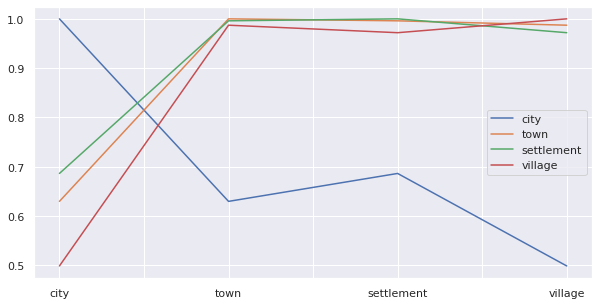

In [50]:
loc_list = ['city','town','settlement','village'] # список типов поселений для аргумента функции

def na_share(name): 
    
    "Функция для расчёта доли пропусков"
    
    na = filt_data[filt_data['locality_type'] == name].isna().sum()
    notna = filt_data[filt_data['locality_type'] == name].notna().sum()
    nashare = round(na/(notna+na)*100, 1)
    return nashare

def locality_type_na(list): 
    
    "Функция-таблица из результатов работы функции na_share"
    
    na_table = (
        pd.concat([na_share(list[0]),na_share(list[1]),na_share(list[2]),
        na_share(list[3])], axis=1, keys=list)
    )
    return na_table

display(locality_type_na(loc_list)) # смотрим на пропуски
locality_type_na(loc_list).corr().plot(grid=True, figsize=[10,5]) # визуализируем корреляцию пропусков друг с другом
plt.show()

Таблица показывает, что доля пропущенных значений очень отличается в зависимости от типа поселений - в категории village, например, пропущено 100% значений не только в столбце с расстоянием до аэропорта, но в столцах с информацией о парках, прудах и расстоянии до центра города. В категориях town и settlement в этих столбцах пропущено больше половины значений, а вот в категории объявлений из СПБ city наоборот - большая часть данных указана, за исключением parks_nearest и ponds_nearest. График показывает нам, что корреляция первых трёх категорий практически совпадает - скорее всего значения пропущены по одной и той же причине. Предположительно для поселений вне крупных городов информация о близости аэропорта или центра города не настолько легкодоступна, потому заполнение информации при подаче объявления отлично от городов вроде СПБ. Так как эта информация заполняется сайтом автоматически на основе географического положения квартиры, причиной пропусков скорее всего является техническая ошибка, как и было предположено в изначальном выводе.


Высокий уровень корреляции данных мог бы позволить нам заполнить половину пропущенных значений с помощью медианы, расчитанной после группировки объявлений в городах по столбцу с расстоянием до центра. Но, к сожалению, большинство значений этого столбца уникальны, что не позволяет использовать эти данные для группировки. 

Мы можем удалить пропуски в столбце city, так как они составляют менее 1%, как и строку с 0 метров до аэропорта, и перезаписать тип данных с float64 на float32 и float16 в столбцах, где это возможно - но пропуски в остальных столбцах придется оставить как есть:

In [51]:
filt_data.loc[filt_data['locality_type'] == 'city', ['airports_nearest']] \
= filt_data.loc[filt_data['locality_type'] == 'city', ['airports_nearest']].fillna(0)
# заполняем пропуски нулём

filt_data = filt_data[filt_data['airports_nearest'] != 0] # пересохраняем датасет

filt_data['airports_nearest'] = filt_data['airports_nearest'].astype('float32')
filt_data['cityCenters_nearest'] = filt_data['cityCenters_nearest'].astype('float32')
filt_data['parks_around3000'] = filt_data['parks_around3000'].astype('float16')
filt_data['parks_nearest'] = filt_data['parks_nearest'].astype('float32')
filt_data['ponds_around3000'] = filt_data['ponds_around3000'].astype('float16')
filt_data['ponds_nearest'] = filt_data['ponds_nearest'].astype('float32')
filt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21833 entries, 0 to 23696
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21833 non-null  int16         
 1   last_price            21833 non-null  int32         
 2   total_area            21833 non-null  float16       
 3   first_day_exposition  21833 non-null  datetime64[ns]
 4   rooms                 21833 non-null  int16         
 5   ceiling_height        13523 non-null  float64       
 6   floors_total          21833 non-null  int16         
 7   living_area           21833 non-null  float16       
 8   floor                 21833 non-null  int16         
 9   is_apartment          21833 non-null  bool          
 10  studio                21833 non-null  bool          
 11  open_plan             21833 non-null  bool          
 12  kitchen_area          21833 non-null  float16       
 13  balcony         

In [52]:
display(locality_type_na(loc_list)) # снова смотрим на пропуски

city  town  settlement  village
total_images          0.00  0.00        0.00     0.00
last_price            0.00  0.00        0.00     0.00
total_area            0.00  0.00        0.00     0.00
first_day_exposition  0.00  0.00        0.00     0.00
rooms                 0.00  0.00        0.00     0.00
ceiling_height       35.10 40.90       48.20    45.60
floors_total          0.00  0.00        0.00     0.00
living_area           0.00  0.00        0.00     0.00
floor                 0.00  0.00        0.00     0.00
is_apartment          0.00  0.00        0.00     0.00
studio                0.00  0.00        0.00     0.00
open_plan             0.00  0.00        0.00     0.00
kitchen_area          0.00  0.00        0.00     0.00
balcony               0.00  0.00        0.00     0.00
locality_name         0.00  0.00        0.00     0.00
locality_type         0.00  0.00        0.00     0.00
airports_nearest      0.00 63.30       64.60   100.00
cityCenters_nearest   0.00 63.30       64.60   100.00
parks_around3000      0.00 63.30       64.60   100.00
parks_nearest        53.90 82.30       98.80   100.00
ponds_around3000      0.00 63.30       64.60   100.00
ponds_nearest        50.00 79.90       90.50   100.00
days_exposition      13.00 15.60       12.10    12.70

Мы удалили пропуски столбца airports_nearest, но при этом видно, что они также полностью пропали в столбцах city_Centers_nearest, parks_around3000 и ponds_around3000 - скорее всего, значения были пропущены в одних и тех же столбцах.
Еще раз проанализируем данные, построив сводную таблицу по типу населенного пункта:

parks_around3000             parks_nearest               
                         count  max median         count     max median
locality_type                                                          
city                     14452 3.00   0.00          6657 3190.00 463.00
settlement                 857 2.00   0.00            28 1073.00 700.00
town                      1488 3.00   0.00           716 2131.00 373.00
village                      0  NaN    NaN             0     NaN    NaN

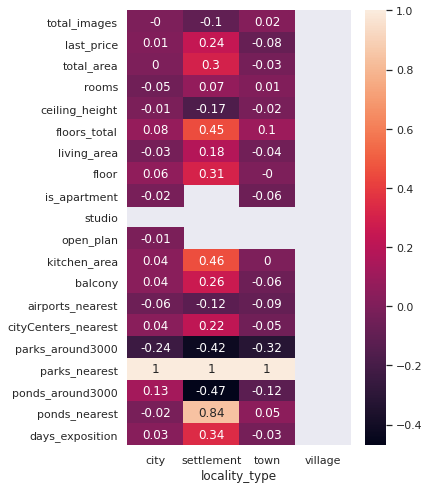

In [53]:
display(pd.pivot_table(filt_data,
               index=['locality_type'],
               values=('parks_nearest', 'parks_around3000'),
               aggfunc=('median', 'count', 'max')
              ))

loc_corr = round(filt_data.groupby('locality_type').corrwith(filt_data['parks_nearest']).T, 2)
plt.figure(figsize=(5,8))
sns.heatmap(loc_corr, annot=True) 
plt.show()

Из анализа тепловой карты группировки типов населенного пункта по расстоянию до ближайшего парка можно вывести два наблюдения:

1) Взаимосвязь между расстоянием до ближайшего парка и числом парков в радиусе 3км есть - в виде отрицательной корреляции -0.44, но только для столбца settlement. 

2) Есть высокая корреляция между расстоянием до ближайшего парка и до ближайшего пруда, 0.84, но только для столбца settlement.

Исходя из предположений, что только для столбца city есть достаточное количество данных в датасете для заполнения пропусков, и что на основе данных из parks_around3000 можно сделать вывод о наличии или отсутствии парка рядом с квартирой, попробуем заполнить пропуски столбца city с помощью медианных значений группировки по числу парков:

In [54]:
filt_data.loc[filt_data['locality_type'] == 'city',['parks_nearest']] = (
    filt_data.loc[:,('parks_nearest')]
    .fillna(filt_data.groupby('parks_around3000')['parks_nearest']
            .transform('median'))
)

locality_type_na(loc_list).loc['parks_nearest'] # проверим наличие пропусков

city           0.00
town          82.30
settlement    98.80
village      100.00
Name: parks_nearest, dtype: float64

In [55]:
pd.pivot_table(filt_data,
               index=['locality_type'],
               values=('parks_nearest', 'parks_around3000'),
               aggfunc=('median', 'count', 'max')
              )

parks_around3000             parks_nearest                
                         count  max median         count     max  median
locality_type                                                           
city                     14452 3.00   0.00         14452 3190.00 3127.00
settlement                 857 2.00   0.00            28 1073.00  700.00
town                      1488 3.00   0.00           716 2131.00  373.00
village                      0  NaN    NaN             0     NaN     NaN

Медианное значение в столбце parks_around3000 - 0, что соответствует отсутствию парков в радиусе 3000 метров. Новое медианное значение parks_nearest для city теперь это отображает: если большинство значений в parks_around3000 являются нулем, то большинство значений в parks_nearest будут более 3000 метров. Пропуски в остальных типах населенных пунктов подобным образом заполнить не получится из-за слишком большого количества пропусков в обоих столбцах.

Далее рассмотрим столбец 'ceiling_height' - данные о указанной пользователем высоте потолков в помещении.

In [56]:
col_miss('ceiling_height')

Всего в столбце "ceiling_height" - 8310 пропусков из 21833, или 38.1% 



В столбце обнаружилось значительное количество пропусков. Как и столбцы 'is_apartment' и  'balcony', неуказание этих данных в обьявлении не препятствует добавлению на сайт - следовательно, причины возникновения могут быть аналогичны:


- Наиболее простым обьяснением является то, что пропуски в данном столбце являются комбинацией человеческого фактора (невнимательность/неосторожность/ожидание автоматической коррекции от сайта) и/или статусом "дополнительного" столбца на самом сайте (Яндекс.Недвижимость не запрещает разместить недвижимость с отсутствием данных в данном столбце).


count   13523.00
mean        2.75
std         0.90
min         1.00
25%         2.50
50%         2.65
75%         2.80
max        32.00
Name: ceiling_height, dtype: float64 

5 самых распространенных значений в столбце: 

2.50    3384
2.60    1579
2.70    1474
3.00    1001
2.55     950
Name: ceiling_height, dtype: int64 

5 самых редких значений в столбце: 

2.89    1
4.15    1
4.14    1
3.48    1
3.58    1
Name: ceiling_height, dtype: int64 



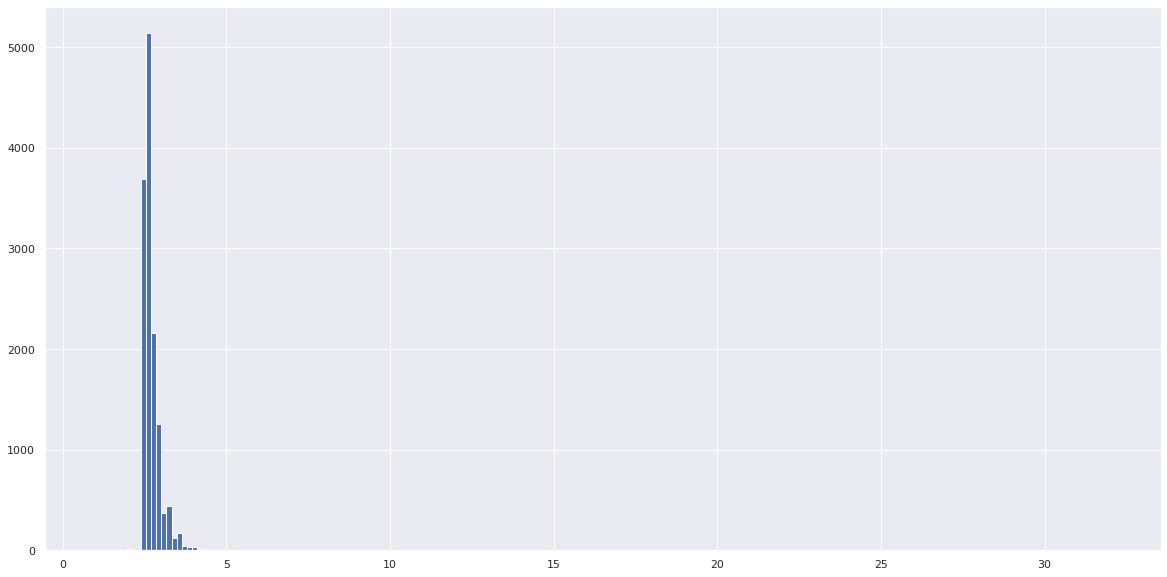

22590                        5712   \
total_images                           16                            5   
last_price                        6000000                      1500000   
total_area                          55.00                        42.81   
first_day_exposition  2018-10-31 00:00:00          2017-08-14 00:00:00   
rooms                                   2                            2   
ceiling_height                       1.00                         1.20   
floors_total                           12                            2   
living_area                         32.41                        27.50   
floor                                   7                            1   
is_apartment                        False                        False   
studio                              False                        False   
open_plan                           False                        False   
kitchen_area                        10.00                         5.20   
balcony                                 0                            0   
locality_name             Санкт-Петербург  поселок городского типа Мга   
locality_type                        city                   settlement   
airports_nearest                 33053.00                          NaN   
cityCenters_nearest              14217.00                          NaN   
parks_around3000                     2.00                          NaN   
parks_nearest                      293.00                          NaN   
ponds_around3000                     2.00                          NaN   
ponds_nearest                      289.00                          NaN   
days_exposition                     13.00                       248.00   

                                    20520                16884  \
total_images                            9                    0   
last_price                        3600000              1500000   
total_area                          38.00                33.00   
first_day_exposition  2018-07-05 00:00:00  2018-10-03 00:00:00   
rooms                                   1                    1   
ceiling_height                       2.00                 2.00   
floors_total                           12                    5   
living_area                         15.00                20.00   
floor                                   9                    5   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                        11.80                 6.00   
balcony                                 1                    0   
locality_name                     Кудрово               Выборг   
locality_type                        town                 town   
airports_nearest                      NaN                  NaN   
cityCenters_nearest                   NaN                  NaN   
parks_around3000                      NaN                  NaN   
parks_nearest                         NaN                  NaN   
ponds_around3000                      NaN                  NaN   
ponds_nearest                         NaN                  NaN   
days_exposition                     62.00                 6.00   

                                    2572   
total_images                            4  
last_price                        2400000  
total_area                          62.00  
first_day_exposition  2018-12-27 00:00:00  
rooms                                   3  
ceiling_height                       2.00  
floors_total                            5  
living_area                         40.00  
floor                                   4  
is_apartment                        False  
studio                              False  
open_plan                           False  
kitchen_area                         6.00  
balcony                                 1  
locality_name 

In [57]:
min_max_info('ceiling_height', 200)

Согласно [ЖК РФ п.II-22](https://www.consultant.ru/document/cons_doc_LAW_58136/85f7dc8994f991a1132725df3886eeefc605e1b9/#dst100028), высота потолков в квартирах Санкт-Петербурга и Ленинградской области ([находящихся в климатическом районе IIВ](https://bim-proektstroy.ru/%D0%BA%D0%B0%D0%BA-%D0%BE%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B8%D1%82%D1%8C-%D0%BA%D0%BB%D0%B8%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9-%D1%80%D0%B0%D0%B9%D0%BE%D0%BD-%D1%81/)) не должна быть менее 2.5 м, а высота внутриквартирных коридоров, холлов, передних, антресолей - не менее 2,1 м.
Данные законодательные ограничения обьясняют разброс самых распространенных значений в столбце (от 2.5 до 3.2 м), как и среднее значение в 2.77 м в исходных данных.

На данный момент анализа необработанные данные столбца не показывают какой-либо значительной корреляции с другими столбцами. Из вариантов возможного заполнения пропусков есть: 1) заполнить пропуски медианой по столбцу, или 2) заполнить пропуски медианой по сгруппированному столбцу - по расстоянию до центра (исходя из предположения, что чем ближе к центру населенного пункта, тем выше в ней могу оказаться потолки), по количеству комнат (из предположения, что чем больше комнат в квартире, тем выше в ней могут оказаться потолки), или по цене квартиры на момент публикации (из предположения, что чем дороже квартира, тем выше в ней могут оказаться потолки). 

Из анализа предыдущих столбцов мы выяснили, что для разных типов населенных пунктов есть различные степени пропусков в данных географического положения - Санкт-Петербург показывает наибольшую заполненность данных, тогда как остальные города, поселки городского типа, села, деревни и т.п. показывают уровень пропусков от 35 до 45% от всех данных. 

ceiling_height             cityCenters_nearest           \
                       count mean median               count     mean   
locality_type                                                           
city                    9378 2.77   2.70               14452 11707.00   
settlement              1256 2.67   2.60                 857 23712.10   
town                    2396 2.68   2.56                1487 34779.54   
village                  493 2.76   2.60                   0      NaN   

                       last_price                          rooms              
                median      count       mean     median    count mean median  
locality_type                                                                 
city          12322.50   14452.00 7015487.66 5500000.00 14452.00 2.13   2.00  
settlement    21565.00    2423.00 3427022.72 3218008.00  2423.00 1.80   2.00  
town          32388.00    4051.00 3645064.20 3200000.00  4051.00 1.99   2.00  
village            NaN     907.00 3256329.33 3100000.00   907.00 1.75   2.00

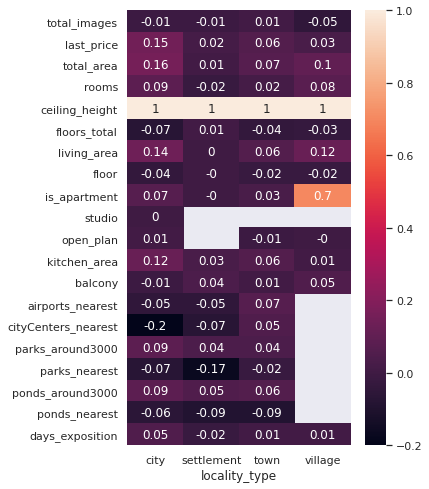

city         35.10
town         40.90
settlement   48.20
village      45.60
Name: ceiling_height, dtype: float64

In [58]:
display(filt_data.pivot_table(index=['locality_type'],
                     values=['ceiling_height' ,'cityCenters_nearest', 'last_price', 'rooms'],
                      aggfunc={'median','mean', 'count'}
                     ))

loc_corr = round(filt_data.groupby('locality_type').corrwith(filt_data['ceiling_height']).T, 2)
plt.figure(figsize=(5,8))
sns.heatmap(loc_corr, annot=True) 
plt.show()

locality_type_na(loc_list).loc['ceiling_height']

In [59]:
filt_data.query('ceiling_height < 2.5 or ceiling_height > 5').count()

total_images            91
last_price              91
total_area              91
first_day_exposition    91
rooms                   91
ceiling_height          91
floors_total            91
living_area             91
floor                   91
is_apartment            91
studio                  91
open_plan               91
kitchen_area            91
balcony                 91
locality_name           91
locality_type           91
airports_nearest        56
cityCenters_nearest     56
parks_around3000        56
parks_nearest           50
ponds_around3000        56
ponds_nearest           28
days_exposition         75
dtype: int64

Анализ исходных данных по типу населенного пункта не показывает заметной корреляции для высоты потолков с каким-либо другим столбцом, кроме is_apartment для столбца village. Исходя из предположения исторического характера о более высоких потолках вблизи к центру населенного пункта, заполним пропуски данными значениями.
В датасете присутствуют 92 квартиры с высотой потолков ниже 2.5 или выше 5 метров. Так как данные значения являются аномальными для датасета, в рамках данного исследования мы отбросим эти данные. 

Так же заменим тип данных с float64 на float16, так как диапазон значений составляет от 1 до 100 м и позволяет заменить тип данных без потери значений и с уменьшением обьема расходуемой памяти.

In [60]:
filt_data.groupby('cityCenters_nearest')['ceiling_height'].agg('median').T

cityCenters_nearest
181.00     3.28
208.00     3.70
215.00     3.90
287.00     3.30
291.00     4.20
           ... 
64857.00   2.50
65105.00   2.55
65764.00   2.50
65952.00   2.50
65968.00   2.55
Name: ceiling_height, Length: 7309, dtype: float64

count   17447.00
mean        2.74
std         0.88
min         1.00
25%         2.54
50%         2.65
75%         2.80
max        32.00
Name: ceiling_height, dtype: float64 

5 самых распространенных значений в столбце: 

2.50    3946
2.70    1968
2.60    1908
2.75    1227
2.55    1193
Name: ceiling_height, dtype: int64 

5 самых редких значений в столбце: 

2.59    1
2.53    1
3.59    1
3.51    1
2.46    1
Name: ceiling_height, dtype: int64 



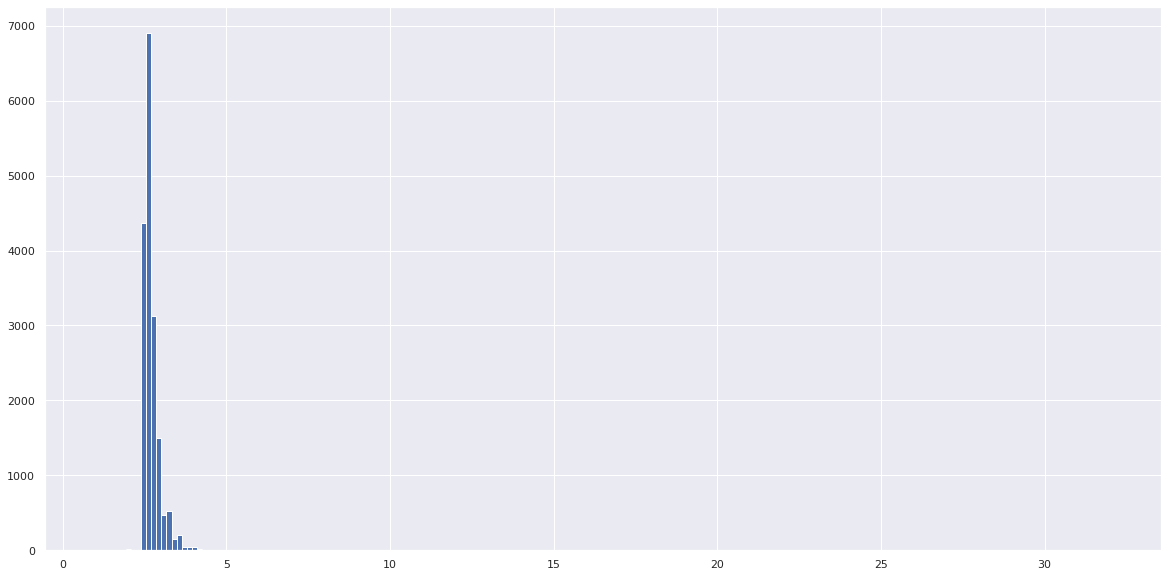

22590                        5712   \
total_images                           16                            5   
last_price                        6000000                      1500000   
total_area                          55.00                        42.81   
first_day_exposition  2018-10-31 00:00:00          2017-08-14 00:00:00   
rooms                                   2                            2   
ceiling_height                       1.00                         1.20   
floors_total                           12                            2   
living_area                         32.41                        27.50   
floor                                   7                            1   
is_apartment                        False                        False   
studio                              False                        False   
open_plan                           False                        False   
kitchen_area                        10.00                         5.20   
balcony                                 0                            0   
locality_name             Санкт-Петербург  поселок городского типа Мга   
locality_type                        city                   settlement   
airports_nearest                 33053.00                          NaN   
cityCenters_nearest              14217.00                          NaN   
parks_around3000                     2.00                          NaN   
parks_nearest                      293.00                          NaN   
ponds_around3000                     2.00                          NaN   
ponds_nearest                      289.00                          NaN   
days_exposition                     13.00                       248.00   

                                    16884                5850   \
total_images                            0                    9   
last_price                        1500000              1650000   
total_area                          33.00                35.50   
first_day_exposition  2018-10-03 00:00:00  2018-05-29 00:00:00   
rooms                                   1                    1   
ceiling_height                       2.00                 2.00   
floors_total                            5                    5   
living_area                         20.00                17.20   
floor                                   5                    5   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         6.00                 8.50   
balcony                                 0                    0   
locality_name                      Выборг                 Луга   
locality_type                        town                 town   
airports_nearest                      NaN                  NaN   
cityCenters_nearest                   NaN                  NaN   
parks_around3000                      NaN                  NaN   
parks_nearest                         NaN                  NaN   
ponds_around3000                      NaN                  NaN   
ponds_nearest                         NaN                  NaN   
days_exposition                      6.00               100.00   

                                    20520  
total_images                            9  
last_price                        3600000  
total_area                          38.00  
first_day_exposition  2018-07-05 00:00:00  
rooms                                   1  
ceiling_height                       2.00  
floors_total                           12  
living_area                         15.00  
floor                                   9  
is_apartment                        False  
studio                              False  
open_plan                           False  
kitchen_area                        11.80  
balcony                                 1  
locality_name 

ceiling_height             cityCenters_nearest           \
                       count mean median               count     mean   
locality_type                                                           
city                   12800 2.77   2.70               14452 11707.00   
settlement              1527 2.66   2.60                 857 23712.10   
town                    2627 2.68   2.57                1487 34779.54   
village                  493 2.76   2.60                   0      NaN   

                       last_price                          rooms              
                median      count       mean     median    count mean median  
locality_type                                                                 
city          12322.50   14452.00 7015487.66 5500000.00 14452.00 2.13   2.00  
settlement    21565.00    2423.00 3427022.72 3218008.00  2423.00 1.80   2.00  
town          32388.00    4051.00 3645064.20 3200000.00  4051.00 1.99   2.00  
village            NaN     907.00 3256329.33 3100000.00   907.00 1.75   2.00

city         11.40
town         35.20
settlement   37.00
village      45.60
Name: ceiling_height, dtype: float64

dtype('float16')

In [61]:
filt_data.loc[:,('ceiling_height')] = (
    filt_data.loc[:,('ceiling_height')]
    .fillna(filt_data.groupby('cityCenters_nearest')['ceiling_height']
            .transform('median'))
)

min_max_info('ceiling_height', 200)

display(filt_data.pivot_table(index=['locality_type'],
                     values=['ceiling_height' ,'cityCenters_nearest', 'last_price', 'rooms'],
                      aggfunc={'median','mean', 'count'}
                     ))

display(locality_type_na(loc_list).loc['ceiling_height'])
filt_data['ceiling_height'] = filt_data['ceiling_height'].astype('float16')
filt_data['ceiling_height'].dtype

count   21385.00
mean        2.69
std         0.23
min         2.45
25%         2.55
50%         2.60
75%         2.75
max         4.80
Name: ceiling_height, dtype: float64 

5 самых распространенных значений в столбце: 

2.50    4406
2.60    2802
2.70    2220
2.55    2129
2.80    1297
Name: ceiling_height, dtype: int64 

5 самых редких значений в столбце: 

3.57    1
4.06    1
3.54    1
3.85    1
3.57    1
Name: ceiling_height, dtype: int64 



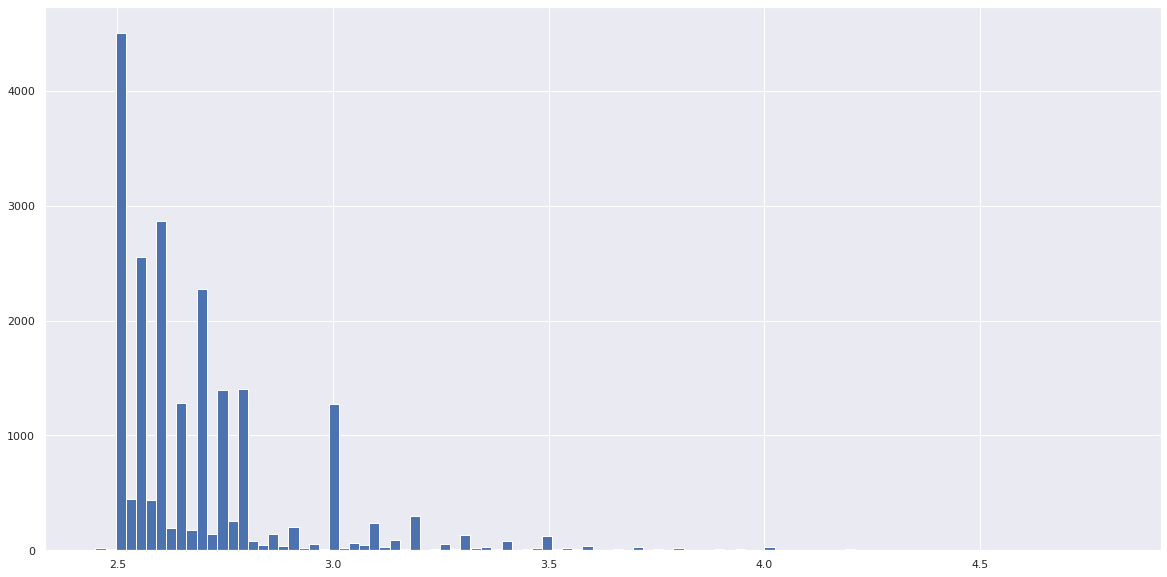

8298                 7791   \
total_images                            6                    7   
last_price                        1200000              2900000   
total_area                          41.59                36.00   
first_day_exposition  2018-08-04 00:00:00  2017-10-23 00:00:00   
rooms                                   2                    1   
ceiling_height                       2.45                 2.45   
floors_total                            5                   11   
living_area                         28.09                15.00   
floor                                   4                    7   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         6.00                 8.10   
balcony                                 0                    1   
locality_name               Лодейное Поле    поселок Парголово   
locality_type                        town           settlement   
airports_nearest                      NaN             55551.00   
cityCenters_nearest                   NaN             21226.00   
parks_around3000                      NaN                 0.00   
parks_nearest                         NaN                  NaN   
ponds_around3000                      NaN                 0.00   
ponds_nearest                         NaN                  NaN   
days_exposition                    137.00               118.00   

                                    21936                18327  \
total_images                            8                   18   
last_price                        4300000              6100000   
total_area                          58.50                54.50   
first_day_exposition  2016-01-28 00:00:00  2018-06-24 00:00:00   
rooms                                   3                    2   
ceiling_height                       2.45                 2.45   
floors_total                            5                    3   
living_area                         43.81                32.59   
floor                                   2                    3   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         5.50                 9.40   
balcony                                 0                    0   
locality_name             Санкт-Петербург      Санкт-Петербург   
locality_type                        city                 city   
airports_nearest                 19258.00             36270.00   
cityCenters_nearest              18261.00              9082.00   
parks_around3000                     1.00                 1.00   
parks_nearest                      692.00              2555.00   
ponds_around3000                     1.00                 3.00   
ponds_nearest                      523.00                73.00   
days_exposition                    240.00               108.00   

                                    11485  
total_images                           15  
last_price                        4550000  
total_area                          45.00  
first_day_exposition  2018-08-08 00:00:00  
rooms                                   2  
ceiling_height                       2.45  
floors_total                            9  
living_area                         27.59  
floor                                   9  
is_apartment                        False  
studio                              False  
open_plan                           False  
kitchen_area                         7.00  
balcony                                 0  
locality_name             Санкт-Петербург  
locality_type                        city  
airports_nearest                 16084.00  
cityCenters_nearest              14624.00  
parks_around3000              

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21385 entries, 0 to 23696
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21385 non-null  int16         
 1   last_price            21385 non-null  int32         
 2   total_area            21385 non-null  float16       
 3   first_day_exposition  21385 non-null  datetime64[ns]
 4   rooms                 21385 non-null  int16         
 5   ceiling_height        21385 non-null  float16       
 6   floors_total          21385 non-null  int16         
 7   living_area           21385 non-null  float16       
 8   floor                 21385 non-null  int16         
 9   is_apartment          21385 non-null  bool          
 10  studio                21385 non-null  bool          
 11  open_plan             21385 non-null  bool          
 12  kitchen_area          21385 non-null  float16       
 13  balcony         

In [62]:
filt_data.loc[:,('ceiling_height')] = (
    filt_data.loc[:,('ceiling_height')]
    .fillna(filt_data.groupby('last_price')['ceiling_height']
            .transform('median'))
)

filt_data = filt_data[filt_data['ceiling_height'] > 2.4]
filt_data = filt_data[filt_data['ceiling_height'] < 5]
min_max_info('ceiling_height')
filt_data.info()

Так как нет возможности более полно заполнить пропуски в вышеуказанных столбцах, а столбцы с данными о наличии/расстоянии до водоемов не указаны как приоритетные в техническом задании, мы двинемся дальше и рассмотрим последний столбец из списка:

In [63]:
col_miss('days_exposition')

Всего в столбце "days_exposition" - 2861 пропусков из 21385, или 13.4% 



'days_exposition' описывает сколько дней было размещено обьявление на сайте. 

- Гипотеза о природе пропусков в данном столбце в том, что пропуски являются технической ошибкой со стороны автоматизированных процессов сайта Яндекс.Недвижимость и/или ошибкой при сборе/выгрузке данных.

Всего в столбце "days_exposition" - 2861 пропусков из 21385, или 13.4% 

count   18524.00
mean      181.56
std       219.82
min         1.00
25%        45.00
50%        97.00
75%       232.00
max      1580.00
Name: days_exposition, dtype: float64 

5 самых распространенных значений в столбце: 

45.00    788
60.00    492
7.00     200
30.00    191
90.00    165
Name: days_exposition, dtype: int64 

5 самых редких значений в столбце: 

1174.00    1
790.00     1
1458.00    1
1218.00    1
876.00     1
Name: days_exposition, dtype: int64 



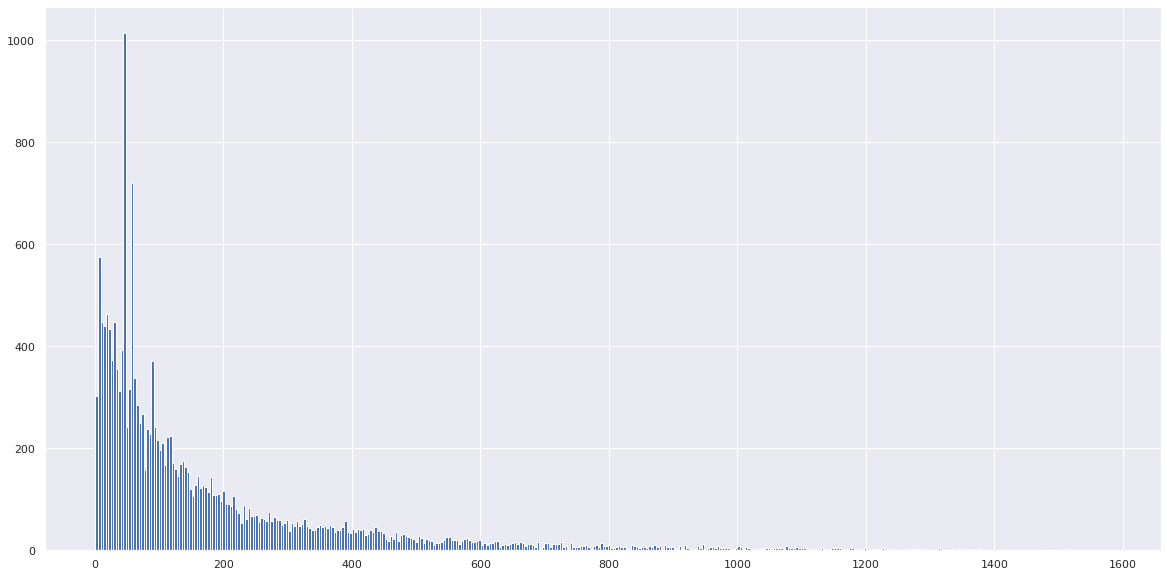

1632                 13061  \
total_images                           19                   20   
last_price                        4000000              6100000   
total_area                          49.91                51.41   
first_day_exposition  2019-05-01 00:00:00  2019-04-29 00:00:00   
rooms                                   2                    2   
ceiling_height                       2.50                 3.00   
floors_total                            9                    5   
living_area                         25.00                31.70   
floor                                   1                    4   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                        10.00                 6.90   
balcony                                 0                    1   
locality_name             Санкт-Петербург      Санкт-Петербург   
locality_type                        city                 city   
airports_nearest                 13567.00             10776.00   
cityCenters_nearest              14384.00              9389.00   
parks_around3000                     1.00                 0.00   
parks_nearest                       20.00              3127.00   
ponds_around3000                     1.00                 0.00   
ponds_nearest                      681.00                  NaN   
days_exposition                      1.00                 2.00   

                                    16053                16212  \
total_images                            4                    0   
last_price                        4070000              7806000   
total_area                          45.09                25.00   
first_day_exposition  2019-04-30 00:00:00  2019-04-30 00:00:00   
rooms                                   2                    1   
ceiling_height                       2.51                 3.00   
floors_total                            5                    5   
living_area                         22.70                17.00   
floor                                   3                    5   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         6.60                 5.00   
balcony                                 0                    0   
locality_name             Санкт-Петербург      Санкт-Петербург   
locality_type                        city                 city   
airports_nearest                 40859.00             36525.00   
cityCenters_nearest              11668.00             10302.00   
parks_around3000                     2.00                 0.00   
parks_nearest                      485.00              3127.00   
ponds_around3000                     0.00                 0.00   
ponds_nearest                         NaN                  NaN   
days_exposition                      2.00                 2.00   

                                    4937   
total_images                            4  
last_price                        3699000  
total_area                          43.00  
first_day_exposition  2017-09-10 00:00:00  
rooms                                   2  
ceiling_height                       2.70  
floors_total                            9  
living_area                         27.00  
floor                                   1  
is_apartment                        False  
studio                              False  
open_plan                           False  
kitchen_area                         6.00  
balcony                                 0  
locality_name             Санкт-Петербург  
locality_type                        city  
airports_nearest                 26971.00  
cityCenters_nearest              11824.00  
parks_around3000              

In [64]:
col_miss('days_exposition')
min_max_info('days_exposition', 400)

In [65]:
filt_data.query('days_exposition < 3').count()

total_images            4
last_price              4
total_area              4
first_day_exposition    4
rooms                   4
ceiling_height          4
floors_total            4
living_area             4
floor                   4
is_apartment            4
studio                  4
open_plan               4
kitchen_area            4
balcony                 4
locality_name           4
locality_type           4
airports_nearest        4
cityCenters_nearest     4
parks_around3000        4
parks_nearest           4
ponds_around3000        4
ponds_nearest           1
days_exposition         4
dtype: int64

В документации к данным написано, что столбец содержит количество дней с момента публикации до снятия. Наличие пропусков в данных может означать, что на момент выгрузки датафрейма квартиры, не снятые с публикации и находящиеся в продаже не получили никаких значений в данный столбец. Исходя из такого предположения, в рамках текущих данных пропуски под вопросом можно заполнить  значением всего временного промежутка - 4 года, 5 месяцев и 6 дней или 1617 дней. Однако более простым с точки зрения визуализации данных решением будет заполнить пропуски нулем, держа в уме что он на самом деле значит. Присутствуют аномальные значения: 4 строки содержат значения менее 3 дней, тогда как строк с значением в 3 дня - 142.

Так же мы заменим тип данных с float64 на int16, как более соответствующий столбцу данных с целыми числами-днями в диапазоне от 1 до 1617 дней.

In [66]:
filt_data['days_exposition'] = filt_data['days_exposition'].fillna(0)
col_miss('days_exposition')

Всего в столбце "days_exposition" - 0 пропусков из 21385, или 0.0% 



count   21381.00
mean      157.30
std       213.73
min         0.00
25%        23.00
50%        74.00
75%       200.00
max      1580.00
Name: days_exposition, dtype: float64 

5 самых распространенных значений в столбце: 

0     2861
45     788
60     492
7      200
30     191
Name: days_exposition, dtype: int64 

5 самых редких значений в столбце: 

1391    1
693     1
709     1
773     1
789     1
Name: days_exposition, dtype: int64 



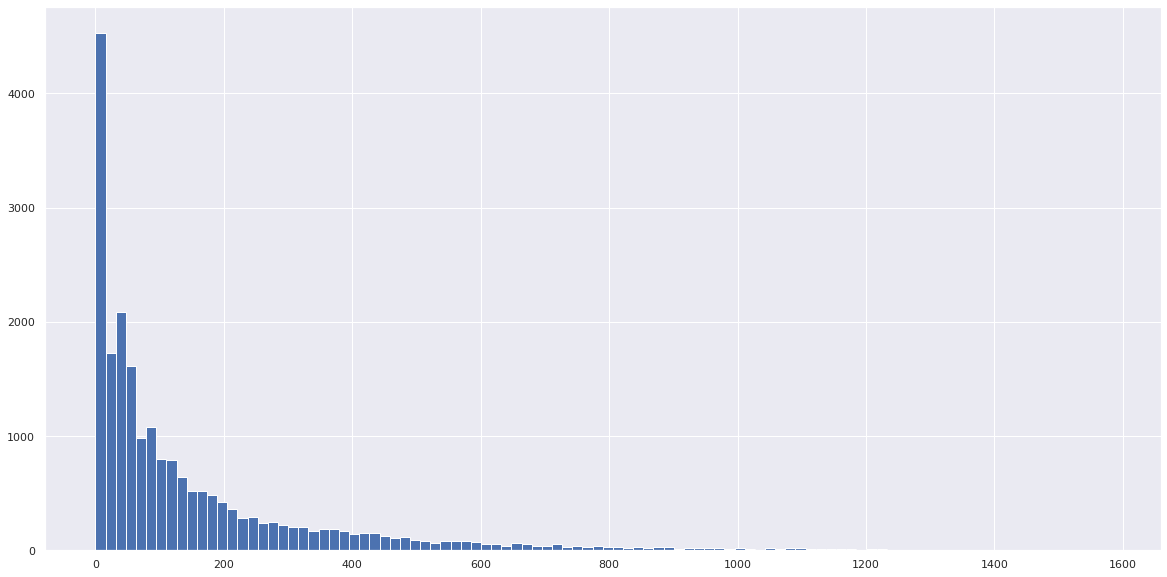

0                    9837  \
total_images                           20                   17   
last_price                       13000000              4300000   
total_area                         108.00                36.00   
first_day_exposition  2019-03-07 00:00:00  2019-02-26 00:00:00   
rooms                                   3                    1   
ceiling_height                       2.70                 2.60   
floors_total                           16                   12   
living_area                         51.00                21.00   
floor                                   8                    9   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                        25.00                 7.00   
balcony                                 0                    0   
locality_name             Санкт-Петербург      Санкт-Петербург   
locality_type                        city                 city   
airports_nearest                 18863.00             41844.00   
cityCenters_nearest              16028.00             14347.00   
parks_around3000                     1.00                 1.00   
parks_nearest                      482.00               308.00   
ponds_around3000                     2.00                 0.00   
ponds_nearest                      755.00                  NaN   
days_exposition                         0                    0   

                                     9819                 9816  \
total_images                            7                   15   
last_price                        3100000              5600000   
total_area                          30.50                90.00   
first_day_exposition  2019-04-27 00:00:00  2019-04-22 00:00:00   
rooms                                   1                    3   
ceiling_height                       2.60                 3.00   
floors_total                            5                    5   
living_area                         16.50                56.69   
floor                                   4                    5   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         6.00                11.00   
balcony                                 0                    0   
locality_name             Санкт-Петербург               Выборг   
locality_type                        city                 town   
airports_nearest                 19775.00                  NaN   
cityCenters_nearest              15371.00                  NaN   
parks_around3000                     1.00                  NaN   
parks_nearest                       76.00                  NaN   
ponds_around3000                     2.00                  NaN   
ponds_nearest                      765.00                  NaN   
days_exposition                         0                    0   

                                     9785  
total_images                           20  
last_price                        7000000  
total_area                          98.12  
first_day_exposition  2019-03-29 00:00:00  
rooms                                   3  
ceiling_height                       2.70  
floors_total                            5  
living_area                         60.50  
floor                                   3  
is_apartment                        False  
studio                              False  
open_plan                           False  
kitchen_area                        14.30  
balcony                                 1  
locality_name                        Луга  
locality_type                        town  
airports_nearest                      NaN  
cityCenters_nearest                   NaN  
parks_around3000               

dtype('int16')

In [67]:
filt_data = filt_data.query('days_exposition == 0 or days_exposition >= 3')

filt_data['days_exposition'] = filt_data['days_exposition'].astype('int16')

min_max_info('days_exposition')
filt_data['days_exposition'].dtype

Далее оценим насколько изменились предобработанные данные в сравнении с изначальными данными:

In [68]:
raw_data.info()
raw_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [69]:
filt_data.info()
filt_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21381 entries, 0 to 23696
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21381 non-null  int16         
 1   last_price            21381 non-null  int32         
 2   total_area            21381 non-null  float16       
 3   first_day_exposition  21381 non-null  datetime64[ns]
 4   rooms                 21381 non-null  int16         
 5   ceiling_height        21381 non-null  float16       
 6   floors_total          21381 non-null  int16         
 7   living_area           21381 non-null  float16       
 8   floor                 21381 non-null  int16         
 9   is_apartment          21381 non-null  bool          
 10  studio                21381 non-null  bool          
 11  open_plan             21381 non-null  bool          
 12  kitchen_area          21381 non-null  float16       
 13  balcony         

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
locality_type               0
airports_nearest         4806
cityCenters_nearest      4807
parks_around3000         4806
parks_nearest            6391
ponds_around3000         4806
ponds_nearest           13260
days_exposition             0
dtype: int64

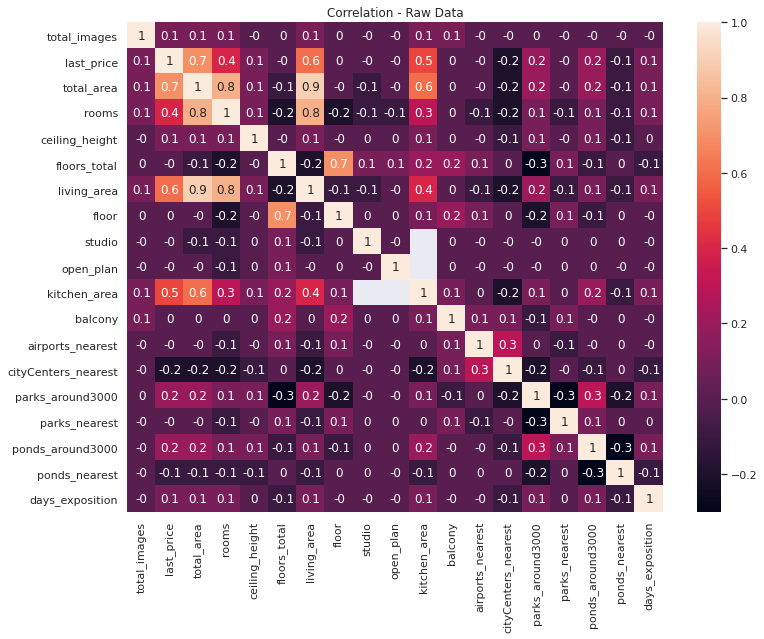

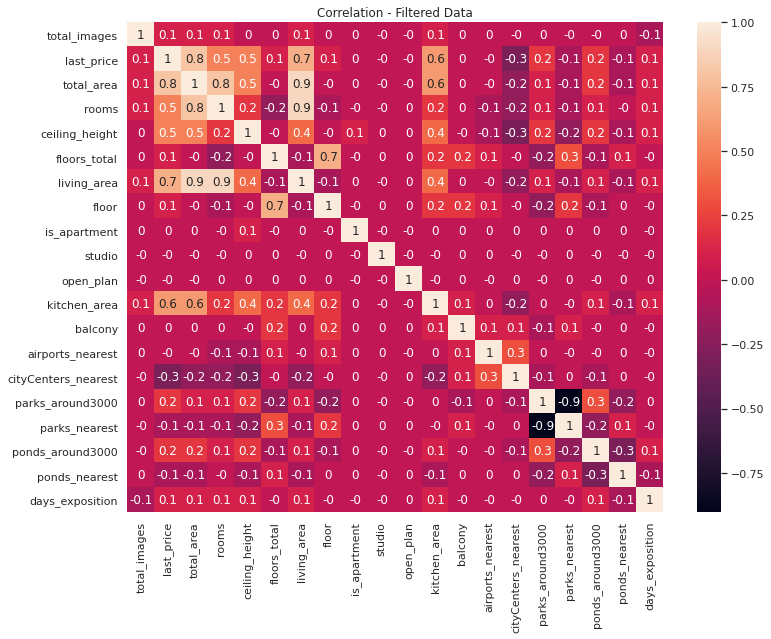

In [70]:
plt.figure(figsize=(12,9))
sns.heatmap(round(raw_data.corr(), 1), annot=True)
plt.title('Correlation - Raw Data')
plt.show()

plt.figure(figsize=(12,9))
sns.heatmap(round(filt_data.corr(), 1), annot=True)
plt.title('Correlation - Filtered Data')
plt.show()

In [71]:
na_diff = round((raw_data.isna().sum().sum()-filt_data.isna().sum().sum())/raw_data.isna().sum().sum()*100, 2)
size_diff = round((len(raw_data)-len(filt_data))/len(raw_data)*100, 2) # разница в количестве строк
memory_diff = round((3.7-2.3)/3*100, 2)


print(f'В ходе предобработки данных было обработано {na_diff}% пропущенных значений. \
Было удалено {size_diff}% датасета, при этом удалось \n сократить использование памяти на {memory_diff}%.')

В ходе предобработки данных было обработано 61.68% пропущенных значений. Было удалено 9.78% датасета, при этом удалось 
 сократить использование памяти на 46.67%.


#### Выводы из предобработки данных:

---

- В ходе предобработки данных было обработано 57.8% пропущенных значений. Было удалено 7.83% датасета, при этом удалось сократить использование памяти на 46.67%.

- В изначальном датасете больше половины столбцов содержали пропущенные значения. При детальном рассмотрении выяснилось, что в части из них доля пропусков в среднем составлял около 0.5%, что не может повлиять на результаты исследования, в связи с чем данные были удалены.

- В ходе предобработки данных выяснилось, что столбцы с пропусками можно разделить на две группы по возможным причинам возникновения пропусков.

- Для столбцов первой группы (ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony) наиболее простым обьяснением является то, что пропуски в данных столбцах являются комбинацией человеческого фактора (невнимательность/неосторожность/ожидание автоматической коррекции от сайта) и/или статусом "дополнительного" столбца на самом сайте (Яндекс.Недвижимость не запрещает разместить недвижимость с отсутствием данных в этих столбцах).

- Для столбцов второй группы (locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition) основное предположение о природе пропусков в данных столбцах в том, что пропуски являются технической ошибкой со стороны автоматизированных процессов сайта Яндекс.Недвижимость и/или ошибкой при сборе/выгрузке данных (Данные в столбцах заполняются автоматически, без участия пользователя).

- В ходе предобработки к столбцу с названиями населённых пунктов был применён метод категоризации, что стало хорошей опцией для дополнительной группировки данных. Таким образом удалось выяснить, что доля пропущенных значений очень отличается в зависимости от типа поселений - в небольших населенных пунктах, например, пропущено 100% значений столбце с расстоянием до аэропорта, с информацией о парках, прудах и расстоянии до центра города. В категориях более крупных населённых пунктах в этих столбцах пропущено больше половины значений, а вот в категории объявлений из СПБ наоборот - большая часть данных указана. Визуализация этих пропусков показала, что корреляция первых трёх категорий практически совпадает - скорее всего значения пропущены по одной и той же причине. Так как данные в столбцах заполняются автоматически, без участия пользователя, и расчитаны автоматически - это явно указывает на то, что системе хватает ресурсов делать полноценные расчёты только в черте крупных поселений.

---

In [72]:
# check
data = filt_data.copy()

In [73]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21381 entries, 0 to 23696
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21381 non-null  int16         
 1   last_price            21381 non-null  int32         
 2   total_area            21381 non-null  float16       
 3   first_day_exposition  21381 non-null  datetime64[ns]
 4   rooms                 21381 non-null  int16         
 5   ceiling_height        21381 non-null  float16       
 6   floors_total          21381 non-null  int16         
 7   living_area           21381 non-null  float16       
 8   floor                 21381 non-null  int16         
 9   is_apartment          21381 non-null  bool          
 10  studio                21381 non-null  bool          
 11  open_plan             21381 non-null  bool          
 12  kitchen_area          21381 non-null  float16       
 13  balcony         

In [74]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

In [75]:
# check
data.rooms.value_counts().to_frame()

rooms
2   7415
1   7207
3   5412
4   1050
5    239
6     44
7     14

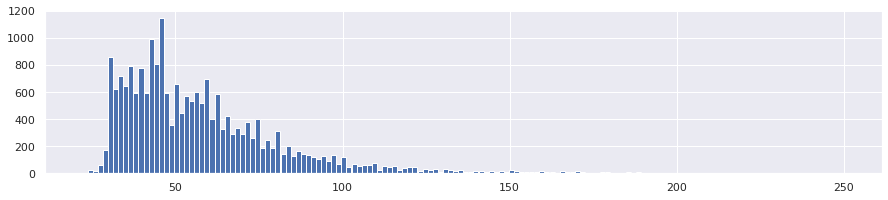

In [76]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

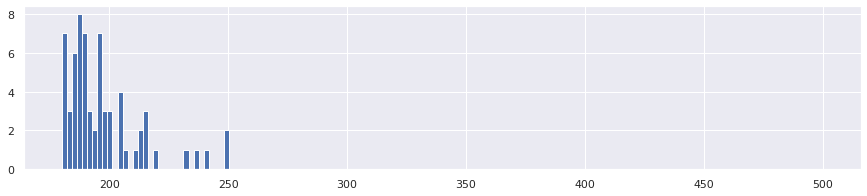

In [77]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

In [78]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

<a name="3"> </a>
### Расчет дополнительных параметров

[Вернуться в оглавление](#0)

In [79]:
filt_data['square_price'] = filt_data['last_price'] / filt_data['total_area'] # цена за квадратный метр
filt_data['living_area_ratio'] = filt_data['living_area'] / filt_data['total_area'] # cоотношение жилой и общей площади
filt_data['kitchen_area_ratio'] = filt_data['kitchen_area'] / filt_data['total_area']# отношение площади кухни к общей
filt_data['cityCenters_nearest_km'] = round(filt_data['cityCenters_nearest'] / 1000, 0) # расстояние до центра нас.пункта в км.
filt_data['expos_weekday'] = filt_data['first_day_exposition'].dt.weekday # день недели публикации
filt_data['expos_month'] = filt_data['first_day_exposition'].dt.month # месяц публикации
filt_data['expos_year'] = filt_data['first_day_exposition'].dt.year # год публикации



filt_data['square_price'] = filt_data['square_price'].astype('float32')
filt_data['expos_weekday'] = filt_data['expos_weekday'].astype('int16')
filt_data['expos_month'] = filt_data['expos_month'].astype('int16')
filt_data['expos_year'] = filt_data['expos_year'].astype('int16')
filt_data['living_area_ratio'] = filt_data['living_area_ratio'].astype('float16')
filt_data['kitchen_area_ratio'] = filt_data['kitchen_area_ratio'].astype('float16')
filt_data['cityCenters_nearest_km'] = filt_data['cityCenters_nearest_km'].astype('float32')

In [80]:
def floor_type(data):
    '''Функция для присвоения категории этажей:
      'first' для первого, 'last' для последнего, 'other' для всех остальных'''
    
    floor = data['floor']
    floors_total = data['floors_total']
    
    if floor == 1:
        return 'first'
    elif floor == floors_total:
        return 'last'
    elif 1 < floor < floors_total:
        return 'other'
    else:
        return 'ERROR: floor value is <= 0'
    
filt_data['floor_type'] = filt_data.apply(floor_type, axis=1) # добавляем столбец с результатом работы функции

In [81]:
filt_data.info() # выведем общую информацию
filt_data.sample(10).T # посмотрим на кусочек обновленного датасета

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21381 entries, 0 to 23696
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            21381 non-null  int16         
 1   last_price              21381 non-null  int32         
 2   total_area              21381 non-null  float16       
 3   first_day_exposition    21381 non-null  datetime64[ns]
 4   rooms                   21381 non-null  int16         
 5   ceiling_height          21381 non-null  float16       
 6   floors_total            21381 non-null  int16         
 7   living_area             21381 non-null  float16       
 8   floor                   21381 non-null  int16         
 9   is_apartment            21381 non-null  bool          
 10  studio                  21381 non-null  bool          
 11  open_plan               21381 non-null  bool          
 12  kitchen_area            21381 non-null  float1

13607                5651   \
total_images                              1                    6   
last_price                          6500000             14501000   
total_area                            74.19                96.62   
first_day_exposition    2017-01-23 00:00:00  2017-11-16 00:00:00   
rooms                                     3                    2   
ceiling_height                         2.70                 2.72   
floors_total                              5                   10   
living_area                           50.31                37.41   
floor                                     2                    4   
is_apartment                          False                False   
studio                                False                False   
open_plan                             False                False   
kitchen_area                          10.00                23.80   
balcony                                   0                    0   
locality_name               Санкт-Петербург      Санкт-Петербург   
locality_type                          city                 city   
airports_nearest                   32273.00             28220.00   
cityCenters_nearest                 4920.00              6923.00   
parks_around3000                       0.00                 1.00   
parks_nearest                       3127.00               956.00   
ponds_around3000                       2.00                 3.00   
ponds_nearest                        834.00               708.00   
days_exposition                         172                  113   
square_price                       87615.84            150075.03   
living_area_ratio                      0.68                 0.39   
kitchen_area_ratio                     0.13                 0.25   
cityCenters_nearest_km                 5.00                 7.00   
expos_weekday                             0                    3   
expos_month                               1                   11   
expos_year                             2017                 2017   
floor_type                            other                other   

                                      16267                19544  \
total_images                              4                   14   
last_price                          3750000              2800000   
total_area                            50.00                23.00   
first_day_exposition    2018-07-17 00:00:00  2018-07-10 00:00:00   
rooms                                     2                    1   
ceiling_height                         2.60                 2.70   
floors_total                             26                    9   
living_area                           26.00                15.00   
floor                                    25                    6   
is_apartment                          False                False   
studio                                False                False   
open_plan                             False                False   
kitchen_area                           9.40                 5.00   
balcony                                   2                    1   
locality_name                поселок Мурино              Кудрово   
locality_type                    settlement                 town   
airports_nearest                        NaN                  NaN   
cityCenters_nearest                     NaN                  NaN   
parks_around3000                        NaN                  NaN   
parks_nearest                           NaN                  NaN   
ponds_around3000                        NaN                  NaN   
ponds_nearest                           NaN                  NaN   
days_exposition                           9                  158   
square_price                       75000.00            121739.13   
living_area_ratio                      0.52                 0.65   
kitchen_area_ratio                     0.19                 0.22   
cityCenters_nearest_km   

<a name="4"> </a>
### Исследовательский анализ данных

[Вернуться в оглавление](#0)

#### Изучение параметров обьектов

Начнем исследовательский анализ данных с изучения данных столбца 'total_area' - общая площадь квартиры:

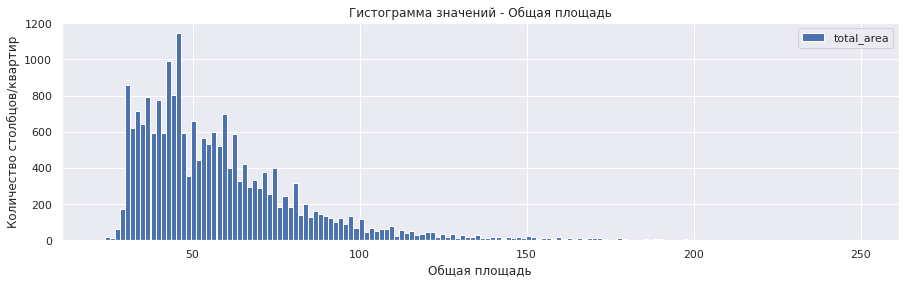

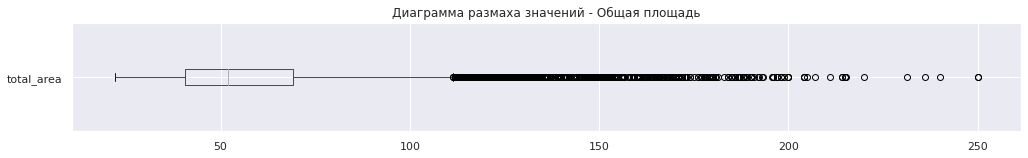

count   21381.00
mean         inf
std        25.56
min        22.23
25%        40.69
50%        52.00
75%        69.00
max       250.00
Name: total_area, dtype: float64

In [83]:
eda = filt_data.copy() # сохраним отдельный датасет для исследовательского анализа данных
eda_sold = eda.copy()
eda_sold = eda_sold[eda_sold['days_exposition'] > 0]

def eda_overview(data, data_title, bins=100): 
    
    # функция для вывода описательной статистики и диаграммы размаха 
    
    fig, ax = plt.subplots()
    eda[data].plot(kind='hist', bins=bins, figsize=[15,4], grid=True, legend=True, use_index=True)
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(f'Гистограмма значений - {data_title}')
    ax.set_xlabel(data_title)
    ax.set_ylabel('Количество столбцов/квартир')
    plt.show()
    fig, ax = plt.subplots(figsize = (17,2))
    ax = eda[[data]].boxplot(vert = False, ax =ax)
    ax.set_title(f'Диаграмма размаха значений - {data_title}')
    plt.show()
    display(eda[data].describe())
    

def eda_sold_overview(data, data_title, bins=100):
    
    # функция для вывода описательной статистики и диаграммы размаха для проданных
    # или снятых с продажи квартир на основе столбца days_exposition     
    
    fig, ax = plt.subplots()
    eda_sold[data].plot(kind='hist', bins=bins, figsize=[15,4], grid=True, legend=True, use_index=True)
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(f'Гистограмма значений - {data_title}')
    ax.set_xlabel(data_title)
    ax.set_ylabel('Количество столбцов/квартир')
    plt.show()
    fig, ax = plt.subplots(figsize = (17,2))
    ax = eda_sold[[data]].boxplot(vert = False, ax =ax)
    ax.set_title(f'Диаграмма размаха значений - {data_title}')
    plt.show()
    display(eda_sold[data].describe())
    
    
eda_overview('total_area', 'Общая площадь', 150)

Гистограмма общей площади показывает визуальную картину, которая стремится к нормальному распределению, но на "ящике с усами" сразу бросется в глаза множество редких значений и выбросов в сторону увеличения площади. В статистике также видна огромная разница между третьим квартилем и максимальным значением - максимум выше большем чем в 10 раз. Попробуем сделать проанализировать срез данных до 150м:

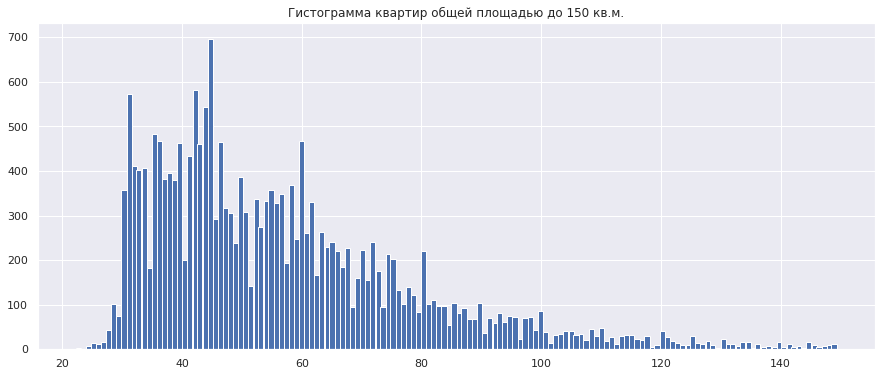

In [84]:
eda.query('total_area < 150')['total_area'].hist(bins=150, figsize=(15, 6))
plt.title('Гистограмма квартир общей площадью до 150 кв.м.')
plt.show()

Диаграмма размаха больше не показывает выбросы, но распределение значений по гистограмме уже совсем не похоже на нормальное - много пиковых значений и провал посередине. Между площадью в 30-31 кв.м. происходит резкий скачок вверх, меньшая площадь представлена значительно реже. Построим график в пределах нормальных значений диаграммы размаха, для близкого рассмотрения серединных данных:

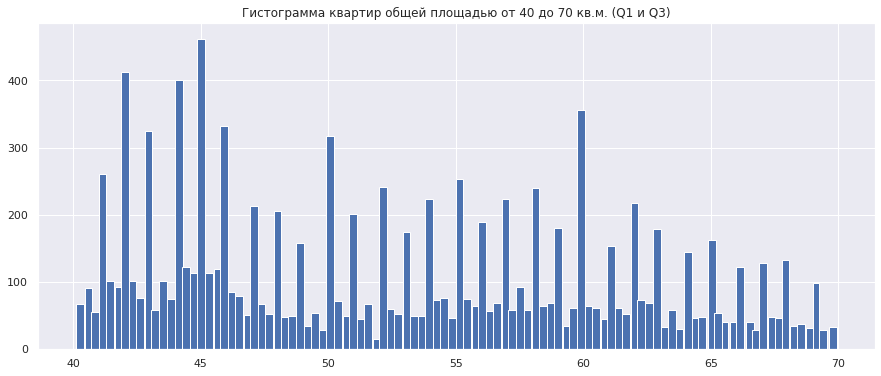

In [85]:
eda.query('40 < total_area < 70')['total_area'].hist(bins=100, figsize=(15, 6))
plt.title('Гистограмма квартир общей площадью от 40 до 70 кв.м. (Q1 и Q3)')
plt.show()

Тут мы видим большое количество пиковых значений, данные распределены неравномерно - наиболее крупные и резкие пики вверх заметны на большинстве значений, кратных 5 (45, 50, 55, 60, 65 кв.м.). Это может свидетельствовать об "приблизительности/примерности" введеных данных: так как площадь является обязательной для заполнения пользователем, есть вероятность что часть пользователей могла заполнить данные "на глазок" или округлив в большую/меньшую сторону. Значения же между данными пиками (как например 39.09, 44.1, 56 кв.м. и другие) больше похожи на правдоподобные данные из строительных документов/схем планировки.


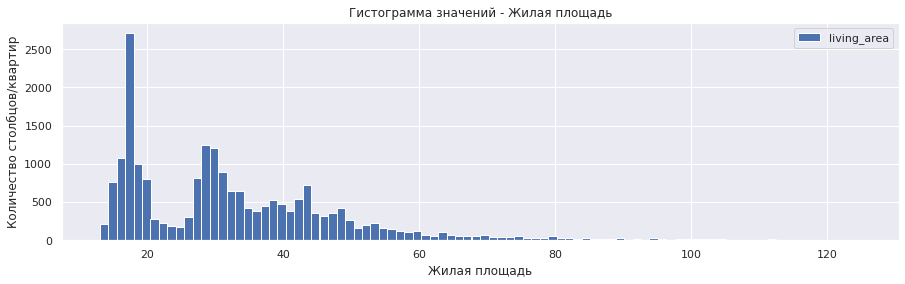

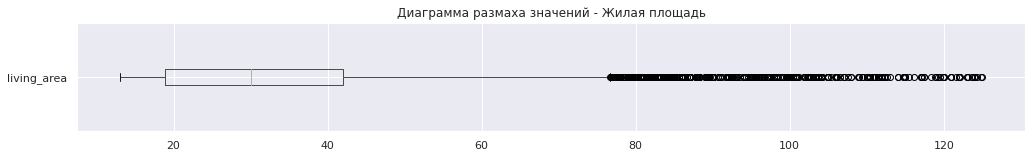

count   21381.00
mean         inf
std        16.52
min        13.05
25%        18.91
50%        30.00
75%        42.00
max       125.00
Name: living_area, dtype: float64

In [86]:
eda_overview('living_area', 'Жилая площадь', 90)

На гистограмме виден U-образный вырез ближе к середине графика и три пика, в районе ~18, ~30, и ~42-45 кв.м. Так же диаграмма размаха показывает выбросы от 67 кв.м. 

Для заполнения пропусков мы использовали группировку таблицы по общей площади и заменили пропуски медианными значениями - нет каких-либо оснований полагать, что это вызвало настолько атипичное распределение, учитывая соотношение пропусков к обычным данным. В рамках данного исследования придержимся вывода, что это аномалия исходных данных, связанная (как и данные в 'total_area') с неточным вводом данных пользователем.

Как было отмечено на этапе предобработки столбца 'total_area': согласно строительным нормам и правилам [(СНиП)](http://xn--h1ajhf.xn--p1ai/snip), площадь комнаты в однокомнатной квартире должна быть не менее 14 квадратных метров.

Исходя из этого, проанализируем гистограмму ближе:

При болезненно долгом вглядывании в гистограмму данных возникла идея, что пики значений коррелируют с числом комнат в квартире. Построим сводную таблицу по количеству комнат в квартире, чтобы оценить средние и медианные значения жилой площади:

In [87]:
pd.pivot_table(eda,
               index='rooms',
               values='living_area',
               aggfunc=('median', 'mean')
              ).T

rooms      1     2     3     4     5      6      7
mean   18.12 31.66 46.62 63.94 85.50 100.25  95.62
median 17.70 30.41 44.50 62.50 85.00 103.88 102.44

Как и предполагалось, пики значений соотносятся с количеством комнат в квартире, а так как обьем комнат может варьироваться в процессе планировки/строительства - вместо одного общего нормального распределения мы получаем волнообразный график с нормальным распределением относительно количества комнат. 

Перейдем к следующему параметру:

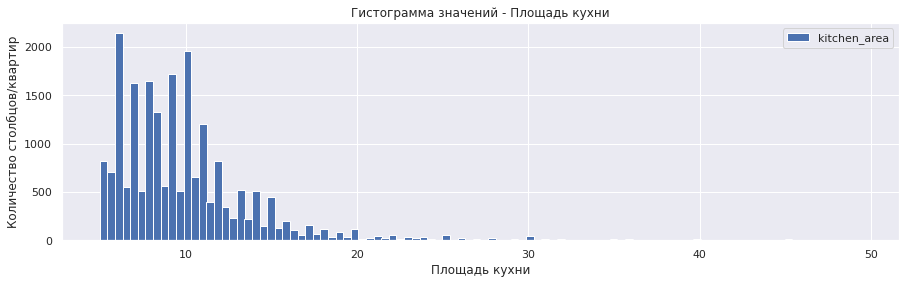

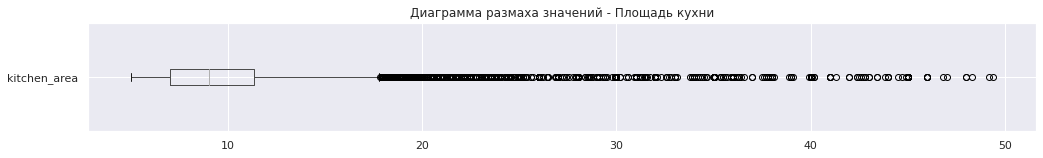

count   21381.00
mean         inf
std         4.60
min         5.00
25%         7.00
50%         9.00
75%        11.33
max        49.41
Name: kitchen_area, dtype: float64

In [88]:
eda_overview('kitchen_area', 'Площадь кухни',100)

Гистограмма данных выглядит неравномерной, с большим количеством пиков и спадов, а диаграмма разброса показывает значительное количество выбросов от 15 кв.м. Так же, как и с жилой площадью, есть минимально допустимый метраж для площади кухни жилой квартиры - 5 кв.м. Для заполнения пропусков (около 9.3%) мы использовали тот же метод, что и в 'living_area' - группировка таблицы по общей площади и заполнение получившимися медианными значениями. И так же, как и в 'living_area', такое заполнение пропусков не обьясняет атипичное распределение данных из-за недостаточного процента заполнения относительно итогового результата.

Для начала обрежем аномальные данные:

In [89]:
eda.query('kitchen_area > 40').count()

total_images              49
last_price                49
total_area                49
first_day_exposition      49
rooms                     49
ceiling_height            49
floors_total              49
living_area               49
floor                     49
is_apartment              49
studio                    49
open_plan                 49
kitchen_area              49
balcony                   49
locality_name             49
locality_type             49
airports_nearest          49
cityCenters_nearest       49
parks_around3000          49
parks_nearest             49
ponds_around3000          49
ponds_nearest             29
days_exposition           49
square_price              49
living_area_ratio         49
kitchen_area_ratio        49
cityCenters_nearest_km    49
expos_weekday             49
expos_month               49
expos_year                49
floor_type                49
dtype: int64

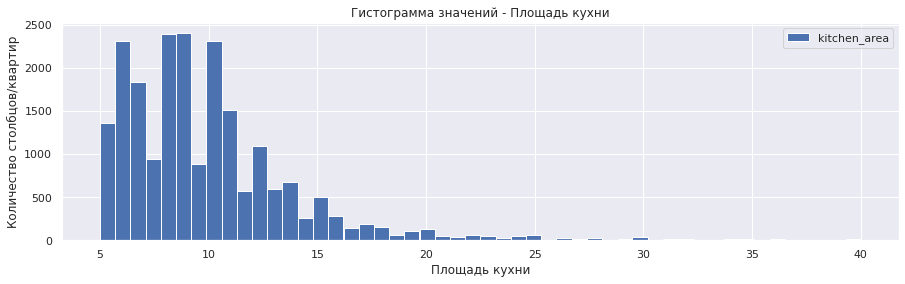

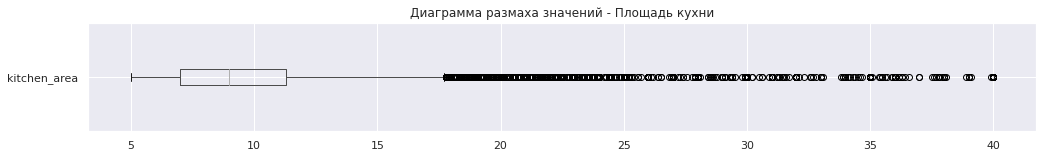

count   21332.00
mean         inf
std         4.30
min         5.00
25%         7.00
50%         9.00
75%        11.30
max        40.00
Name: kitchen_area, dtype: float64

In [90]:
eda = eda[eda['kitchen_area'] <= 40]
eda_overview('kitchen_area', 'Площадь кухни',50)

Мы обрезали большинство аномальных значений, а гистограмма стала более похожа на нормальное распределение данных - предположительно, как и с жилой площадью, большинство значений являются "приблизительными, на глазок" замерами с шагом между ними в 2 кв.м., а данные между пиками - более точные замеры или данные из схем планировки. 

Перейдем к следующему параметру:

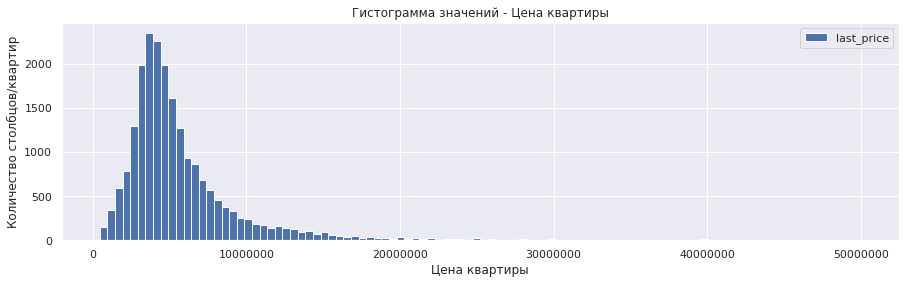

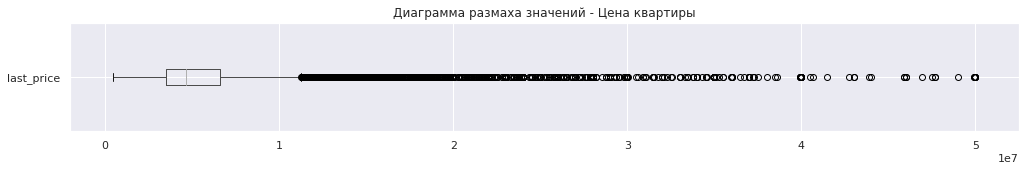

count      21332.00
mean     5789541.54
std      4325256.74
min       450000.00
25%      3490000.00
50%      4638000.00
75%      6600000.00
max     50000000.00
Name: last_price, dtype: float64

In [91]:
eda_overview('last_price', 'Цена квартиры')

Большая часть данных стремится к нормальному распределению, но также присутствует большое количество выбросов (стоимость больше ~10000000). Уберём часть этих данных из таблицы и рассмотрим оставшиеся поближе:

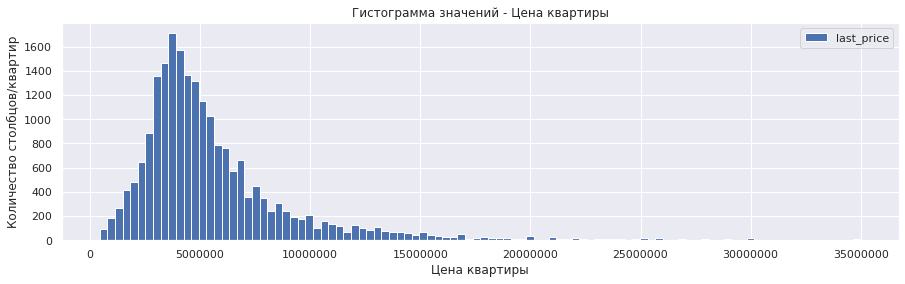

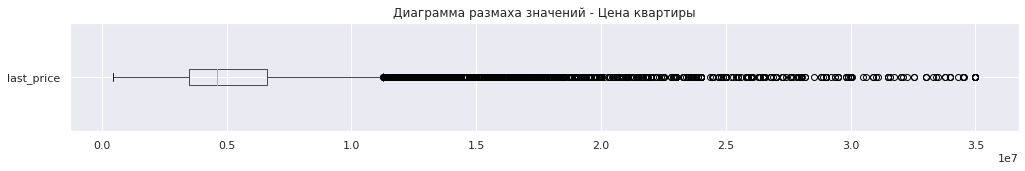

count      21278.00
mean     5698724.78
std      3928814.93
min       450000.00
25%      3490000.00
50%      4600000.00
75%      6600000.00
max     35000000.00
Name: last_price, dtype: float64

In [92]:
eda = eda[eda['last_price'] <= 35000000]
eda_overview('last_price', 'Цена квартиры',100)

Выбросы удалены, а график гистограммы визуально соответствует нормальному распределению значений. Перейдем к следующему столбцу:

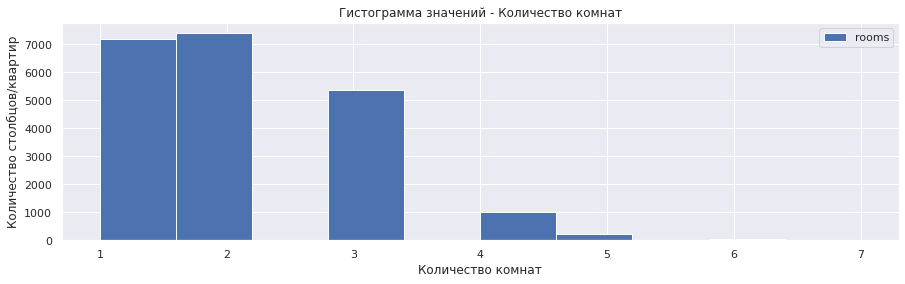

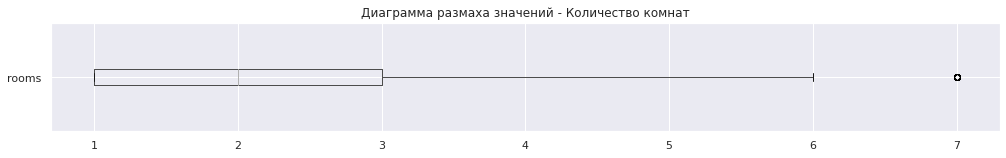

count   21278.00
mean        2.05
std         0.96
min         1.00
25%         1.00
50%         2.00
75%         3.00
max         7.00
Name: rooms, dtype: float64

In [93]:
eda_overview('rooms', 'Количество комнат',10)

Выбросы в данных были обрезаны на этапе предобработки, гистограмма показывает распределение Пуассона. Перейдем к следующему столбцу:

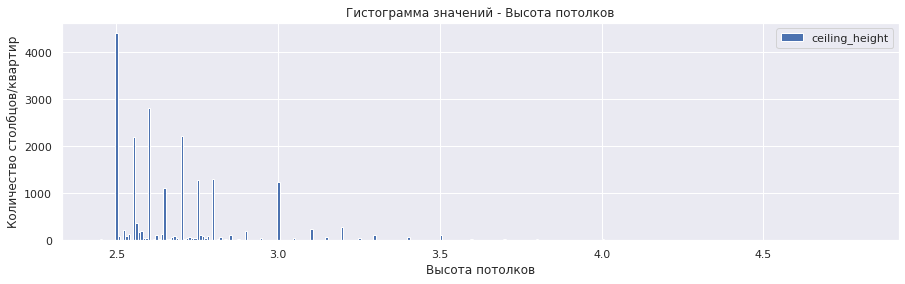

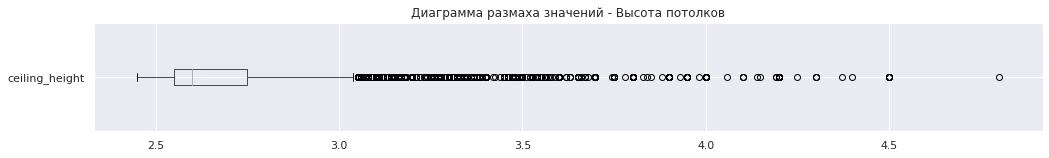

count   21278.00
mean        2.69
std         0.23
min         2.45
25%         2.55
50%         2.60
75%         2.75
max         4.80
Name: ceiling_height, dtype: float64

In [94]:
eda_overview('ceiling_height', 'Высота потолков',300)

Диаграмма размаха показывает большое количество аномальных значений, а гистограмма не свидетельствует о нормальном распределении данных.

Обрежем аномальные значения:

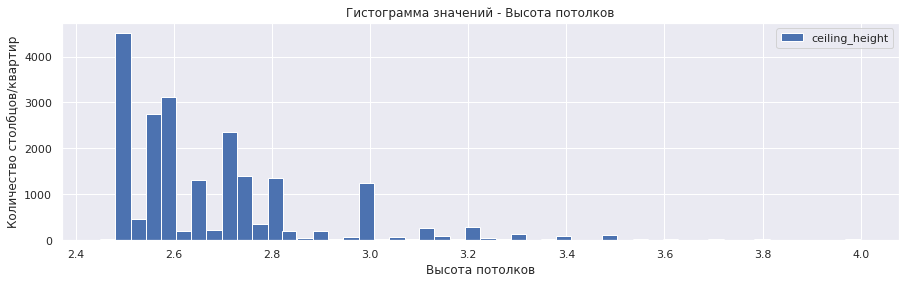

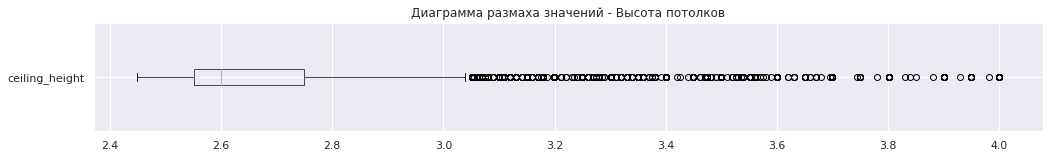

count   21247.00
mean        2.69
std         0.22
min         2.45
25%         2.55
50%         2.60
75%         2.75
max         4.00
Name: ceiling_height, dtype: float64

In [95]:
eda = eda[eda['ceiling_height'] <= 4]
eda_overview('ceiling_height', 'Высота потолков',50)

Согласно [ЖК РФ п.II-22](https://www.consultant.ru/document/cons_doc_LAW_58136/85f7dc8994f991a1132725df3886eeefc605e1b9/#dst100028), высота потолков в квартирах Санкт-Петербурга и Ленинградской области ([находящихся в климатическом районе IIВ](https://bim-proektstroy.ru/%D0%BA%D0%B0%D0%BA-%D0%BE%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B8%D1%82%D1%8C-%D0%BA%D0%BB%D0%B8%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9-%D1%80%D0%B0%D0%B9%D0%BE%D0%BD-%D1%81/)) не должна быть менее 2.5 м, а высота внутриквартирных коридоров, холлов, передних, антресолей - не менее 2,1 м.
Данные законодательные ограничения обьясняют разброс самых распространенных значений в столбце (от 2.5 до 3.2 м), как и среднее значение в 2.77 м в исходных данных. Так же данные выводы схожи и с тем, что видно на текущих графиках. На этапе предобработки в столбце было выявлено большое количество пропусков (около одной трети от всего столбца), в связи с чем было принято решение заполнить их разными способами: медианой из группировки по расстоянию от центра населенного пункта, медианой по типу населенного пункта, а оставшиеся пропуски - медианой по цене квартиры. 

Перейдем к следующему параметру:

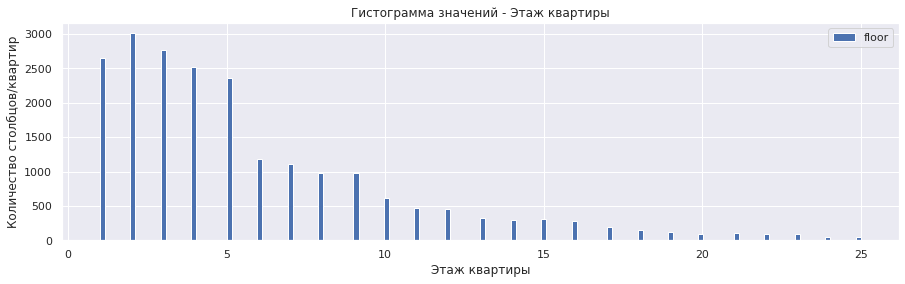

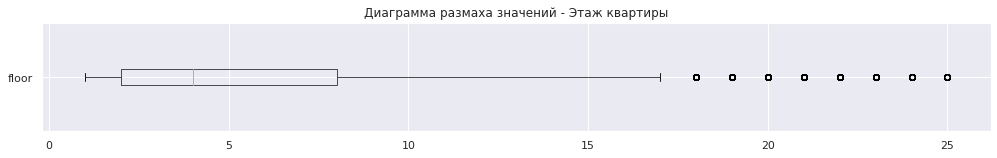

count   21247.00
mean        5.82
std         4.76
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        25.00
Name: floor, dtype: float64

In [96]:
eda_overview('floor', 'Этаж квартиры',150)

Диаграмма размаха показывает выбросы в положительную сторону, а гистограмма визуально подходит под распределение Пуассона. Перейдем к следующему параметру:

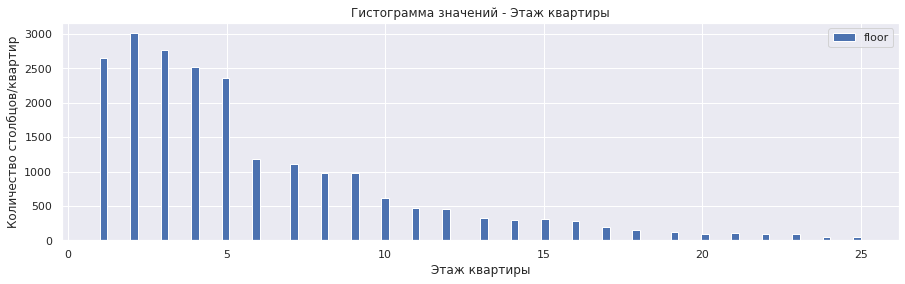

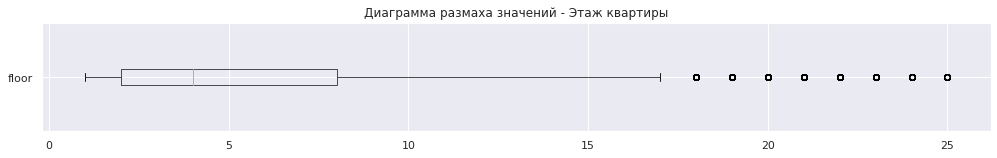

count   21247.00
mean        5.82
std         4.76
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        25.00
Name: floor, dtype: float64

In [97]:
eda_overview('floor', "Этаж квартиры", 100)

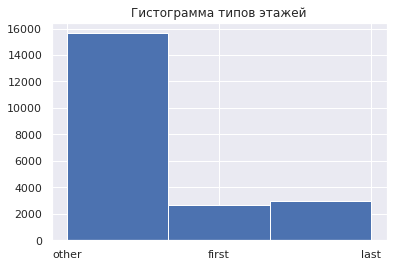

count     21247
unique        3
top       other
freq      15645
Name: floor_type, dtype: object

other    15645
last      2956
first     2646
Name: floor_type, dtype: int64

In [98]:
eda['floor_type'].hist(bins=3)
plt.title('Гистограмма типов этажей')
plt.show()
display(eda['floor_type'].describe())
eda['floor_type'].value_counts()

Не смотря на малое количество категорий в столбце, гистограмма вполне соответствует нормальному распределению данных. 

Перейдем к следующему параметру:

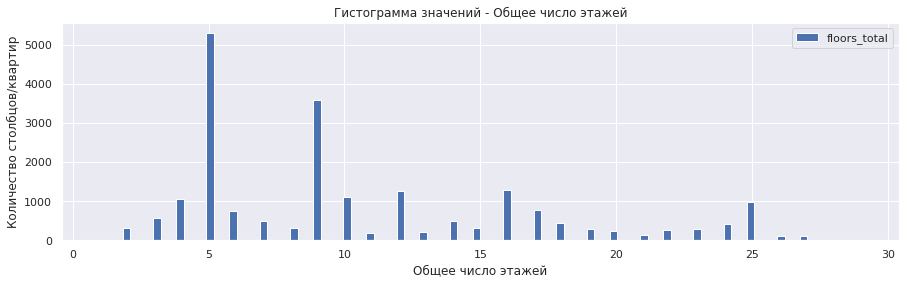

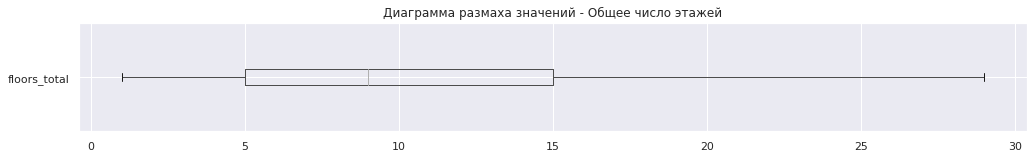

count   21247.00
mean       10.59
std         6.44
min         1.00
25%         5.00
50%         9.00
75%        15.00
max        29.00
Name: floors_total, dtype: float64

In [99]:
eda_overview('floors_total', "Общее число этажей")

Обе диаграммы указывают на положительную скошенность данных. В изначальных данных было менее 1% пропусков, которые были в последствии обрезаны, так что вероятность влияния результата предобработки данных на положительную скошенность близка к нулю. 

Есть вероятность что как и в столбце rooms существует взаимосвязь между указанным этажом квартиры и общим количеством этажей в здании. Попробуем применить схожий метод и построим сводную таблицу:

In [100]:
pd.pivot_table(eda,
               index='floors_total',
               values='floor',
               aggfunc=('median', 'count')
              )

count  median
floors_total               
1                20       1
2               321       1
3               567       2
4              1054       3
5              5292       3
6               749       4
7               499       4
8               314       4
9              3598       5
10             1098       6
11              174       7
12             1264       6
13              205       7
14              491       7
15              321       8
16             1274       9
17              765       9
18              434      10
19              279      11
20              228      10
21              131      10
22              255      11
23              298      12
24              404      12
25              966      12
26              107      15
27              119      17
28               19      13
29                1      18

Пики на гистограмме, как и значения в сводной таблице, указывают на распространенность жилых домов высотой в 5, 9, 12 и 16 этажей - что схоже с характеристиками жилых домов советской постройки (["сталинки", "хрущевки", "брежневки", и т.п.](https://ru.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B8%D0%B8_%D0%B6%D0%B8%D0%BB%D1%8B%D1%85_%D0%B4%D0%BE%D0%BC%D0%BE%D0%B2)), тогда как вероятно что более новые и менее распространенные дома современной постройки с иным (что меньшим, что кардинально большим) количеством этажей занимают меньший обьем данных в графиках. 

Перейдем к следующему параметру:

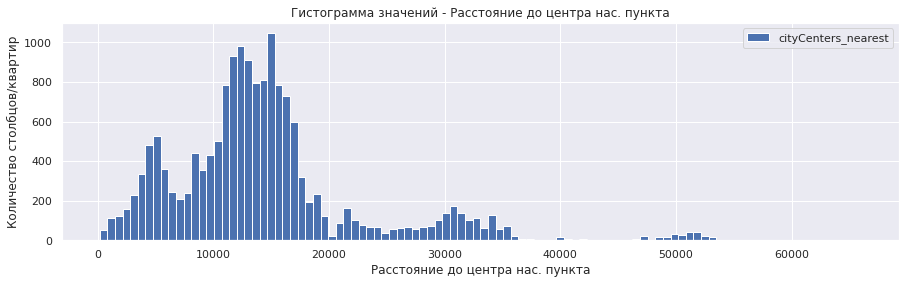

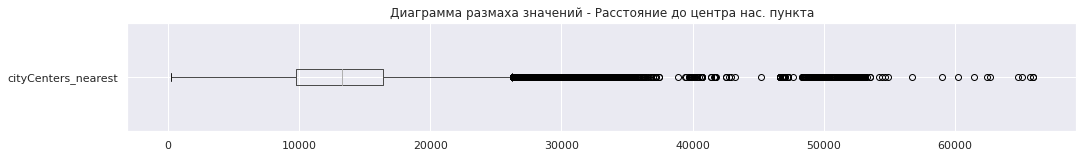

count   16443.00
mean    14440.84
std      8589.57
min       181.00
25%      9761.50
50%     13229.00
75%     16357.00
max     65968.00
Name: cityCenters_nearest, dtype: float64

In [101]:
eda_overview('cityCenters_nearest', "Расстояние до центра нас. пункта")

Диаграмма размаха показывает большое количество выбросов, а гистограмма выглядит неравномерной. Из-за особенностей природы данных в этом столбце, дальнейшее заполнение пропусков и удаление аномальных значений не представляется возможным: Не все категории населенных пунктов имеют достаточное количество данных в столбце, чтобы можно было бы заполнить пропуски (как пытались, и частично сделали, сделать в процессе предобработки), из-за чего категории кроме city (Санкт-Петербург) непропорционально подвержены любым изменениям в столбце - при попытке обрезать аномальные значения мы целиком удаляем целые поселения и города из датасета, что сказывается на результатах анализа. В качестве иллюстрации мы выведем сводную таблицу по категориям населенных пунктов (прошу обратить внимание на отсутствие столбца village из-за 100% пропусков во всех географических данных категории) и перейдем к следующему параметру:

In [102]:
pd.pivot_table(eda,
               index=['locality_type'],
               values=('cityCenters_nearest'),
               aggfunc=('median', 'mean')
              )

mean   median
locality_type                  
city          11767.04 12365.00
settlement    23725.10 21565.00
town          34807.93 32411.00

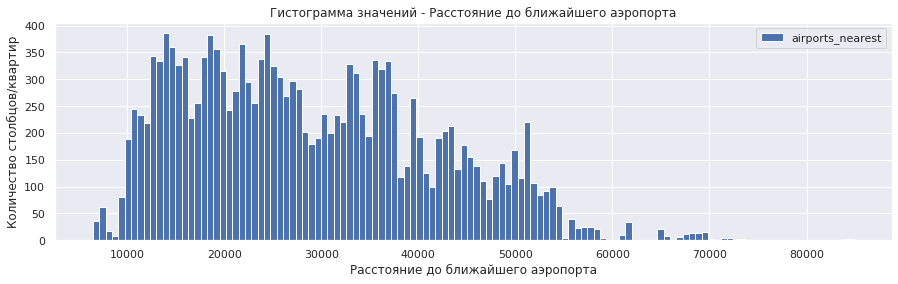

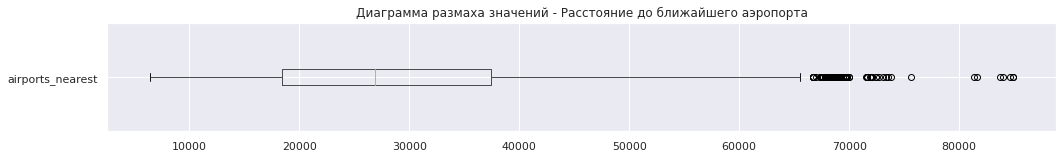

count   16444.00
mean    28880.66
std     12731.68
min      6450.00
25%     18427.00
50%     26926.00
75%     37434.00
max     84869.00
Name: airports_nearest, dtype: float64

In [103]:
eda_overview('airports_nearest', "Расстояние до ближайшего аэропорта",120)

Диаграмма размаха показывает аномальные значения выше размаха третьего квартиля, а гистограмма ~похожа на демона из моих кошмаров~ показывает атипичное распределение с положительным скосом.

Так же как и с столбцом выше, из-за особенностей природы данных в этом столбце дальнейшее заполнение пропусков и обрезание аномальных значений не представляется возможным - по тем же самым причинам, что указаны выше. Выведем сводную таблицу по категориям населенных пунктов (прошу обратить внимание на отсутствие столбца village из-за 100% пропусков во всех географических данных категории) и перейдем к следующему параметру:

In [104]:
pd.pivot_table(eda,
               index=['locality_type'],
               values=('airports_nearest'),
               aggfunc=('median', 'mean')
              )

mean   median
locality_type                  
city          28142.49 26995.00
settlement    31688.66 25212.00
town          34357.88 27164.00

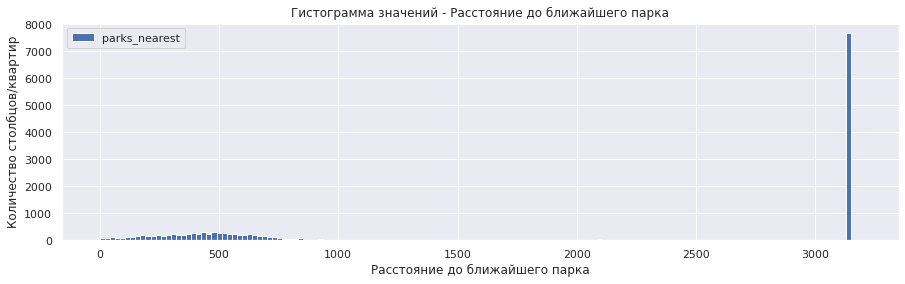

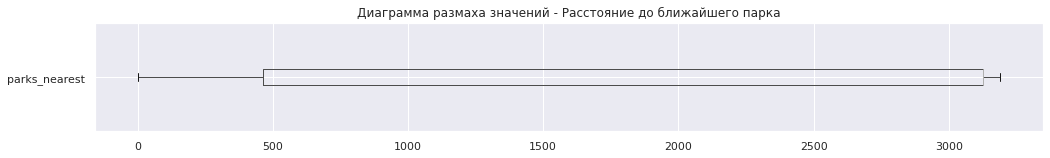

count   14860.00
mean     1852.49
std      1337.92
min         1.00
25%       464.00
50%      3127.00
75%      3127.00
max      3190.00
Name: parks_nearest, dtype: float64

In [105]:
eda_overview('parks_nearest', "Расстояние до ближайшего парка",150)

Диаграмма размаха выглядит неестественно, а гистограмма показывает атипичное распределение данных. Скорее всего это вызвано тем, что в процессе предобработки пропуски были заполнены по медианным значениям соответствующего населенного пункта и взаимосвязью с общим числом парков в пределах 3000 метров - а так как только категория city (Санкт-Петербург) имела достаточное количество значений для заполнения медианой, остальные категории пришлось оставить как есть. Аномальный столб в 7 тыс. значений справа - это результат заполнения пропусков. 

Выведем сводную таблицу из этапа предобработки для иллюстрации данного предположения и перейдем к следующему параметру:

In [106]:
pd.pivot_table(filt_data,
               index=['locality_type'],
               values=('parks_nearest', 'parks_around3000'),
               aggfunc=('median', 'count', 'max')
              )

parks_around3000             parks_nearest                
                         count  max median         count     max  median
locality_type                                                           
city                     14255 3.00   0.00         14255 3190.00 3127.00
settlement                 850 2.00   0.00            28 1073.00  700.00
town                      1470 3.00   0.00           707 2131.00  372.00
village                      0  NaN    NaN             0     NaN     NaN

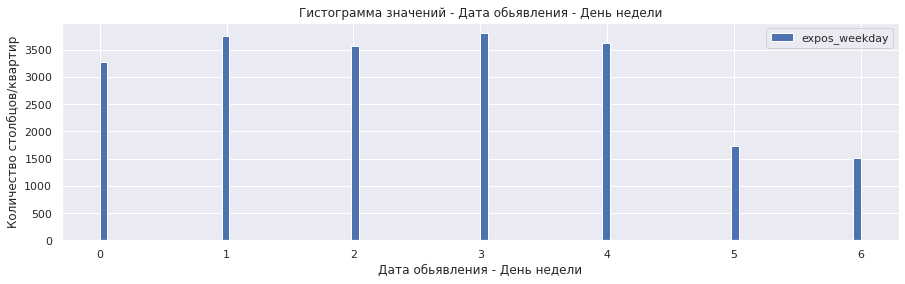

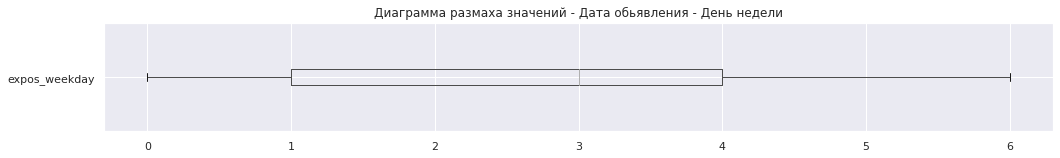

count   21247.00
mean        2.56
std         1.79
min         0.00
25%         1.00
50%         3.00
75%         4.00
max         6.00
Name: expos_weekday, dtype: float64

In [107]:
eda_overview('expos_weekday', "Дата обьявления - День недели")

Диаграмма размаха не показывает выбросов в данных. Гистограмма показывает, что количество обьявлений, которые выложили на выходных днях в среднем меньше количества обьявлений, выложенных в будние дни почти в два раза.

Перейдем к следующему параметру:

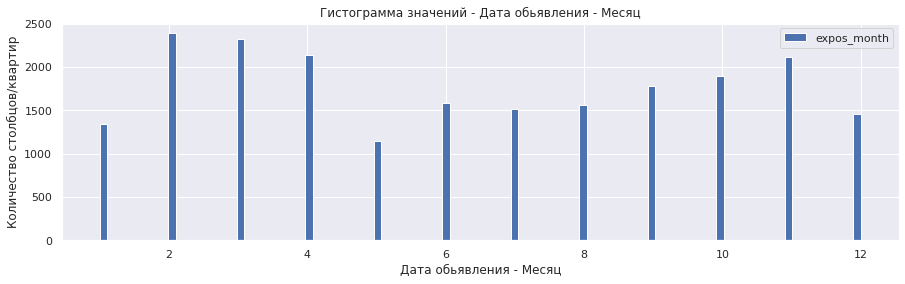

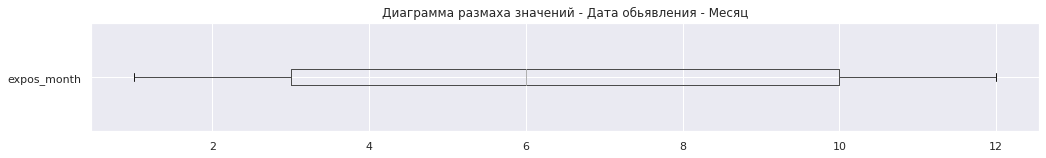

count   21247.00
mean        6.39
std         3.49
min         1.00
25%         3.00
50%         6.00
75%        10.00
max        12.00
Name: expos_month, dtype: float64

In [108]:
eda_overview('expos_month', "Дата обьявления - Месяц")

Диаграмма размаха не показывает каких-либо отклонений, а вот гистограмма, наоборот, показывает интересные тренды: наибольшее количество обьявлений выложено в месяцы 2-4 (февраль, март, апрель), в месяцах 6-11 (с июня по ноябрь) наблюдается планомерный рост, а месяцы под индексами 1, 5 и 12 (январь, май и декабрь) содержат наименьшее количество обьявлений.

Малое количество обьявлений в январе можно обьяснить длительностью и интенсивностью новогодних праздников. Февраль, как самый короткий месяц по числу дней, показывает самое высокое количество обьявлений: возможно, что с поправкой на количество дней показания гистограммы изменятся, но не сильно - февраль, март и апрель все равно займут лидирующие места. Можно предположить, что это связано с желанием получить крупную сумму для летнего отпуска/релокации/загородной жизни - но это только предположения, неподтверждаемые или опровергаемые в рамках данной работы.
 
Перейдем к следующему параметру:

#### Изучение скорости продаж квартир

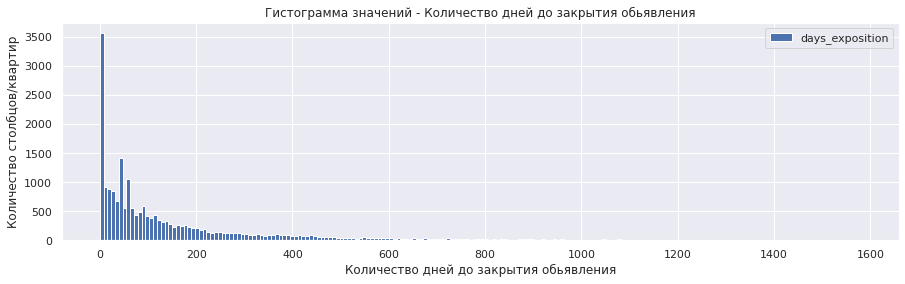

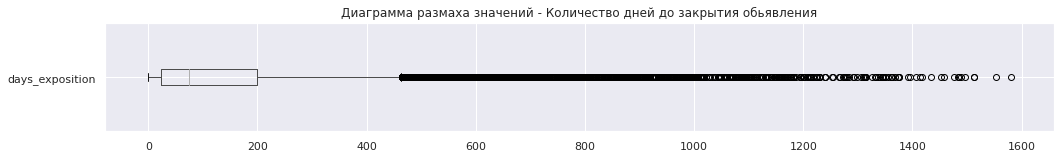

count   21247.00
mean      157.03
std       212.99
min         0.00
25%        23.00
50%        74.00
75%       199.00
max      1580.00
Name: days_exposition, dtype: float64

In [109]:
eda_overview('days_exposition', "Количество дней до закрытия обьявления", 200)

Диаграмма размаха показывает большое количество выбросов и общую положительную смещенность вправо. Гистограмма же в целом показывает распределение Пуассона, за исключением пика значений 0. Это вызвано тем, что во время предобработки данных было решено заменить пропуски на максимальное хронологическое значение в 1617 дней (отрезок времени данного датасета), так как предположительно пропуски в столбце обозначают что квартира не была продана на момент выгрузки данных - но затем было принято решение заменить пропуски нулем для упрощения работы. 

Задачей данного анализа является исследование динамики продаж квартир в Санкт-Петербурге и соседних населенных пунктах, поэтому важно отметить процентное соотношение данных аномалий - если гипотеза о "непроданности" данных квартир верна, то за период в 1617 дней (или около 4.5 лет) не продались около 11% (если считать от исходных данных, raw_data) или 13% (если смотреть на данные для исследовательского анализа, eda) от общего числа квартир. Так же стоит отметить, что снятие обьявления с сайта не является гарантией продажи квартиры. 

Чтобы не терять из виду идею того, как неснятые обьявления влияют на данные, мы обратимся к копии датасета только с закрытыми обьявлениями о продаже и проанализируем данные:

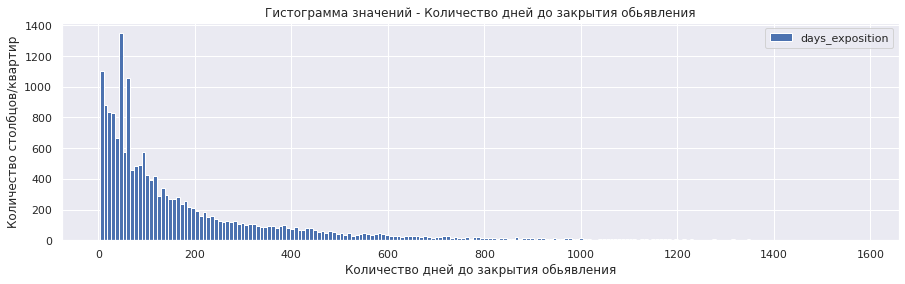

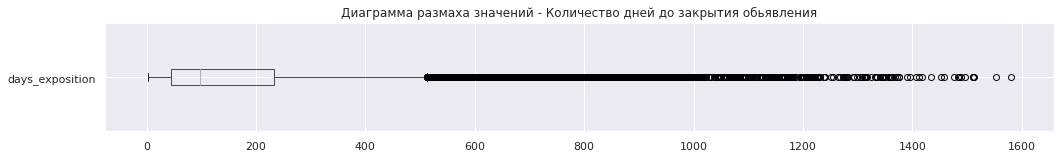

count   18520.00
mean      181.60
std       219.82
min         3.00
25%        45.00
50%        97.00
75%       232.00
max      1580.00
Name: days_exposition, dtype: float64

In [110]:
eda_sold_overview('days_exposition', 'Количество дней до закрытия обьявления', 200)
display(
    eda[['days_exposition']]
    .quantile([0.01, 0.25,.5, .75, .99])  
    .style.format("{:,.2f}")
)
(
    eda_sold[['days_exposition']]
    .quantile([0.01, 0.25, .5, .75, .99])  
    .style.format("{:,.2f}")
)

13784

186

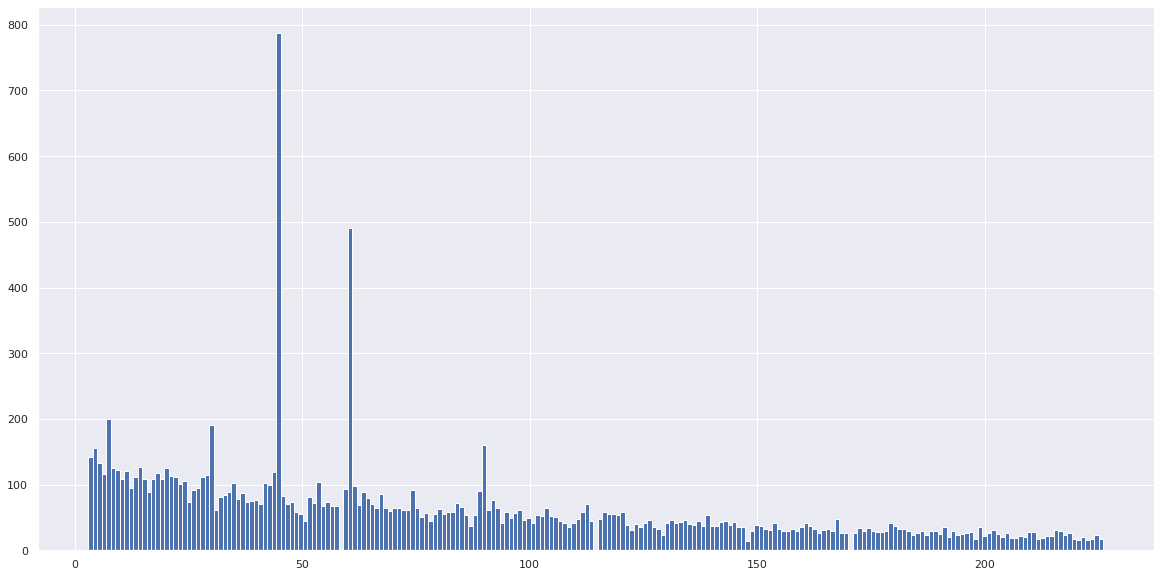

In [111]:
display(eda_sold.query('days_exposition < 227')['total_area'].count())
display(eda_sold.query('1069 < days_exposition')['total_area'].count())

eda.query('0 < days_exposition < 227')['days_exposition'].hist(bins=227, figsize=(20, 10))
plt.show()

Третий квартиль данных (75%, 13386 строк) вполне предсказуемо составляет большинство данных в столбце. Значения же после 1054 дней (99%, 177 строк) можно обрезать для анализа влияния этих аномалий на данные.


При осмотре данных за период до 365 дней, стали более очевидны выбивающиеся пики значений: 7, 30, 45, 60 и 90 дней. В рамках данной работы можно предположить, что выбивающиеся значения могут быть связаны с условиями размещения обьявлений:

1) 7 дней длится один пакет премиум-услуг для более эффективного размещения (Пакет "Турбо", "Премиум-размещение", т.п.), что может обьяснить выбивающиеся значения; 

2) Аналогичная ситуация с пиком в 30 дней - платные обьявления (на которые не действует лимит обьявлений за период в 182 дня) оплачиваются сроком на 30 дней, на 31 день происходит автоматическое списание средств. Нельзя точно сказать, снимается ли обьявление с сайта при неуплате или пользователи снимают обьявление сами для экономии средств.

3) Максимальный пик в 45 дней вызывает вопросы: сайт Яндекс.Недвижимости указывает, что 45 дней соответствует сроку бесплатного обьявления для продажи квартиры стоимостью до 4.5 млн. руб по всей России, **кроме Москвы, Санкт-Петербурга и их областей** - для них срок бесплатного обьявления увеличен до 120 дней без условий по стоимости. Возможно, что раньше условия были общие - датасет рассматривает определенный временной промежуток до 2019 года, а не нынешнюю обстановку. Подтвердить или опровергнуть такое предположение в рамках данной работы не представляется возможным.

4) Второй максимальный пик в 60 дней похож на предыдущий: срок бесплатного обьявления недвижимости от 4.5 до 10 млн. руб составляет 60 дней по всей России, **кроме Москвы, Санкт-Петербурга и их областей** - для них срок бесплатного обьявления увеличен до 120 дней без условий по стоимости. Помимо гипотезы из прошлого пункта, можно также предположить, что это результат неуплаты или добровольного снятия обьявления для избежания авто-платежа за второй месяц платного обьявления.

5) Пик значений в 90 дней тоже похож на предыдущие: срок бесплатного обьявления недвижимости от 10 млн. руб составляет 90 дней по всей России, **кроме Москвы, Санкт-Петербурга и их областей** - для них срок бесплатного обьявления увеличен до 120 дней без условий по стоимости. Помимо гипотез из прошлого пункта, можно также предположить, что это результат неуплаты или добровольного снятия обьявления для избежания авто-платежа за третий месяц платного обьявления.

Далее рассмотрим данные датасета с закрытыми обьявлениями с обрезанными данными выше 99 процентиля:

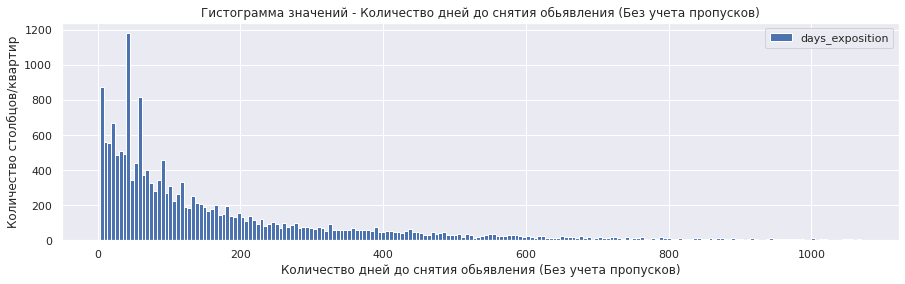

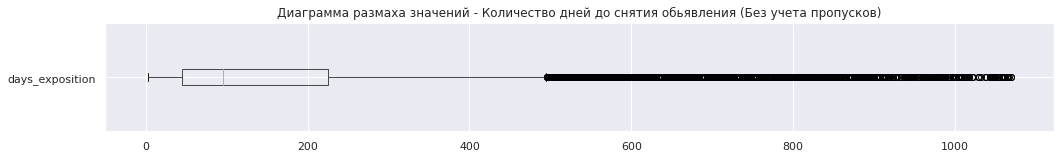

count   18334.00
mean      171.13
std       194.30
min         3.00
25%        45.00
50%        95.00
75%       225.00
max      1069.00
Name: days_exposition, dtype: float64

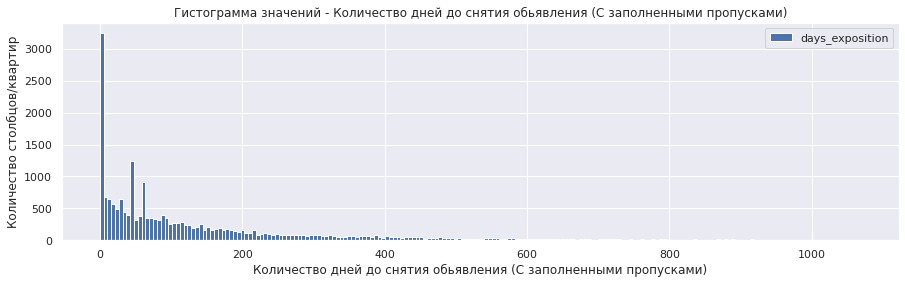

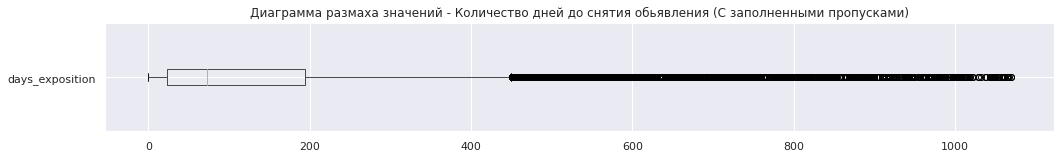

count   21066.00
mean      147.97
std       189.73
min         0.00
25%        23.00
50%        73.00
75%       194.00
max      1069.00
Name: days_exposition, dtype: float64

In [112]:
eda_sold = eda_sold[eda_sold['days_exposition'] <= 1069]
eda = eda[eda['days_exposition'] <= 1069]
eda_sold_overview('days_exposition', 'Количество дней до снятия обьявления (Без учета пропусков)', 200)
eda_overview('days_exposition', 'Количество дней до снятия обьявления (С заполненными пропусками)', 200)

In [113]:
pd.pivot_table(eda_sold,
              index=['expos_year'],
               values=['days_exposition'],
               aggfunc=['count', 'mean']
              ).T

expos_year              2014   2015    2016    2017    2018   2019
count days_exposition  69.00 857.00 2446.00 7158.00 6837.00 967.00
mean  days_exposition 738.75 562.37  319.49  160.23   94.51  31.02

Из вышеприведенных таблиц и графиков можно сделать следующие выводы относительно скорости закрытия обьявлений:

1) Значения для датасета с заполненными пропусками и без них очень сильно различаются из-за присутствия 3500 строк, в которых содержатся данные о непроданных квартирах на момент выгрузки датасета. Разница получается около 15% от обьема датасета, и при любом варианте заполнения пропусков (заполнение нулем или заполнение общим временным промежутком датасета, 1617 дней) искажения сильно влияют на итоговый результат. Поэтому для более точной оценки данных мы больше обращаем внимание на значения датасета без заполненных пропусков и оцениваем по ним датасет с заполненными пропусками.

2) Медианное значение продаж для датасета без пропусков составляет около 95 дней, или трех месяцев, что можно считать за среднее время продажи квартиры. Показания ниже первого квартиля в 45 дней можно считать за высокую скорость продажи, а показания выше третьего квартиля - 225 дней - за низкую скорость продажи. При этом не стоит забывать про 15% квартир, которые не продались за период более 4 лет и 5 месяцев (1617 дней - временной промежуток всего датасета).

3) При осмотре данных за период до 365 дней, стали более очевидны выбивающиеся пики значений: 7, 30, 45, 60 и 90 дней. В рамках данной работы можно предположить, что выбивающиеся значения могут быть связаны с условиями размещения обьявлений: все пики связаны с особенностями работы дополнительных платных услуг для размещающих пользователей и могут свидетельствовать о возможном оттоке пользователей из регионов России - кроме Москвы, Санкт-Петербурга и прилегающих областей - для которых действуют менее лояльные и более дорогостоящие условия.

4) Рассматривая таблицу по годам, можно заметить определенные тренды: в период с 2014 по 2018 количество обьявлений увеличилось более чем в 100 раз и упало в 2019 году до одной седьмой от пикового значения. Несмотря на это, средняя скорость продажи продолжает расти, сократившись в 20 раз между 2014 и 2017 годами.

#### Изучение факторов, влияющих на общую стоимость обьекта

##### Факторы первой группы: общая площадь, жилая площадь, площадь кухни, количество комнат

Далее мы изучим какие факторы больше всего влияют на общую (полную) стоимость объекта: общая площадь, жилая площадь, площадь кухни, количество комнат, этаж квартиры (первый, последний, другой), даты размещения (день недели, месяц, год). 
Для этого мы разделим факторы на три группы: в первой группе находятся факторы площади/комнат, во второй группе находится фактор этажа квартиры, а третья группа содержит даты размещения.

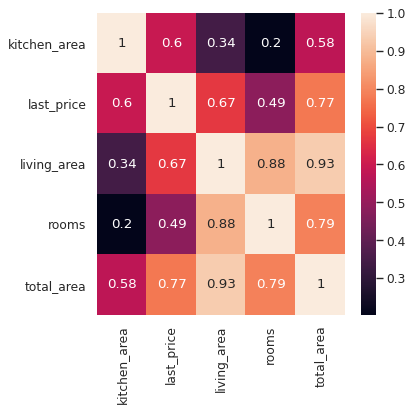

In [114]:
# сделаем тепловую карту корреляции факторов первой группы

plt.figure(figsize=(5,5), dpi= 80)

sns.heatmap(
    
    eda.pivot_table(index=eda.index, 
                    values=['kitchen_area', 'total_area','living_area','last_price', 'rooms'])
    .corr(), annot=True
)
plt.show()

На тепловой карте факторов первой группы можно отметить заметную корреляцию (0.77) между ценой и общей площадью, что вполне логично: так как цена квартиры состоит из цены за квадратный метр площади, то чем больше площадь - тем выше может оказаться стоимость. По убыванию показателя корреляции далее следует жилая площадь (0.67), кухонная площадь (0.6) и количество комнат (0.49). Это можно обьяснить второстепенностью этих факторов относительно общей площади: большая площадь кухни или количество комнат показывает значительную корреляцию с общей площадью, но не абсолютную взаимосвязь, и квартиры с одной и той же ценой и площадью могут иметь разное количество комнат или площадь кухни.

Далее рассмотрим факторы по-отдельности:

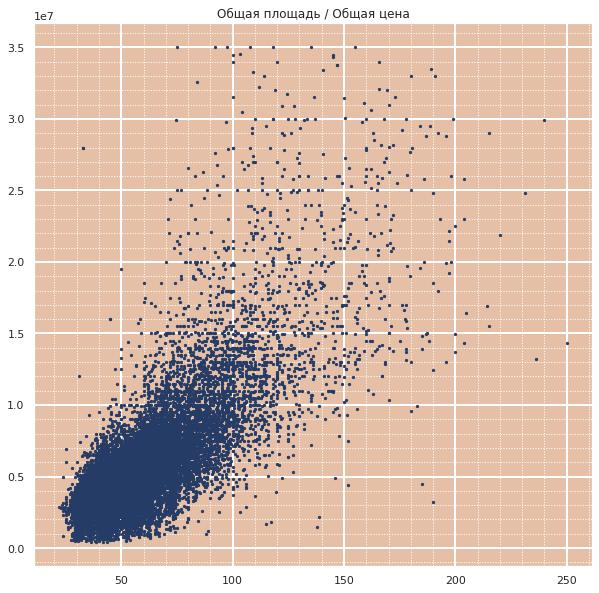

In [115]:
x = eda['total_area']
y = eda['last_price']

fig, ax = plt.subplots()

ax.scatter(x, y,
           c = '#253c66',
          s = 5)   
ax.minorticks_on()
ax.grid(color='white',
        axis='both')
ax.grid(which='major',
        color = 'white', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'white', 
        linestyle = ':')

ax.set_facecolor('#e5c0a6')     
ax.set_title('Общая площадь / Общая цена') 

fig.set_figwidth(10)     
fig.set_figheight(10)    

plt.show()

Можно увидеть сильную положительную корреляцию между общей площадью и ценой квартиры, особенно в сегменте до 10 млн. руб и 100 кв.м - но после показателей в 15 млн. руб и 125 кв.м взаимосвязь перестает быть очевидной.

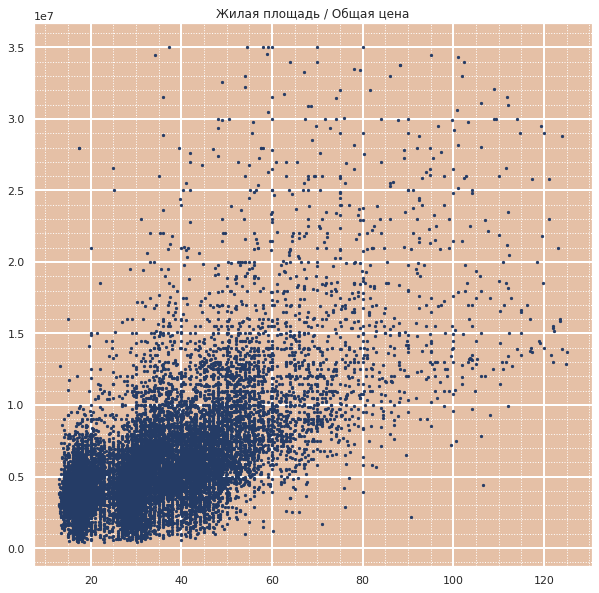

In [116]:
x = eda['living_area']
y = eda['last_price']

fig, ax = plt.subplots()

ax.scatter(x, y,
           c = '#253c66',
          s = 5)   
ax.minorticks_on()
ax.grid(color='white',
        axis='both')
ax.grid(which='major',
        color = 'white', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'white', 
        linestyle = ':')

ax.set_facecolor('#e5c0a6')     
ax.set_title('Жилая площадь / Общая цена')     

fig.set_figwidth(10)     
fig.set_figheight(10)    

plt.show()

Присутствует заметная корреляция в сегменте до 10 млн. руб и 60 кв.м. - однако вне этих значений взаимосвязь приобретает хаотичный характер.

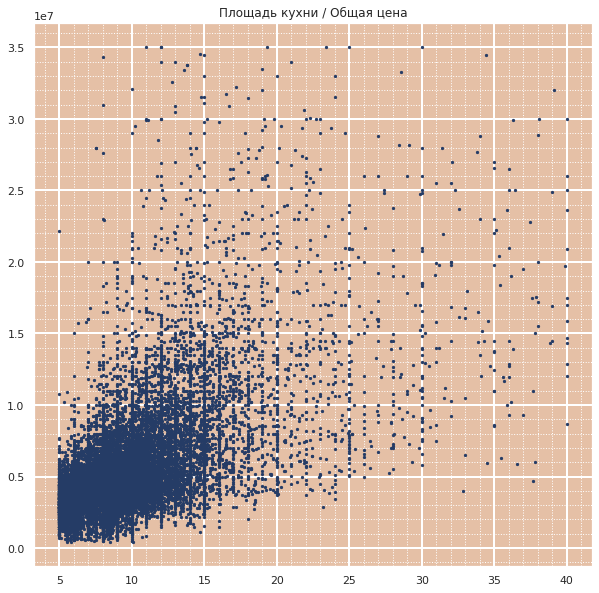

In [117]:
x = eda['kitchen_area']
y = eda['last_price']

fig, ax = plt.subplots()

ax.scatter(x, y,
           c = '#253c66',
          s = 5)   
ax.minorticks_on()
ax.grid(color='white',
        axis='both')
ax.grid(which='major',
        color = 'white', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'white', 
        linestyle = ':')

ax.set_facecolor('#e5c0a6')    
ax.set_title('Площадь кухни / Общая цена')     

fig.set_figwidth(10)     
fig.set_figheight(10)    

plt.show()

Присутствует заметная, но несильная корреляция в сегменте до 15 млн. руб и 20 кв.м. - далее взаимосвязь приобретает хаотичный характер.

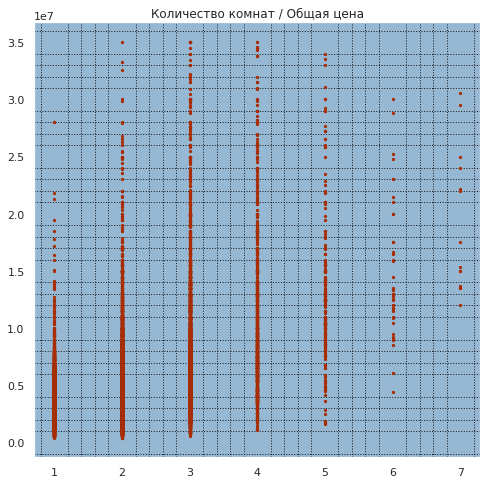

In [118]:
x = eda['rooms']
y = eda['last_price']

fig, ax = plt.subplots()

ax.scatter(x, y,
           c = '#a82d04',
          s = 5)   
ax.minorticks_on()
ax.grid(color='white',
        axis='both')
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

ax.set_facecolor('#96b8d3')   
ax.set_title('Количество комнат / Общая цена')     

fig.set_figwidth(8)     
fig.set_figheight(8)    

plt.show()

Корреляция между количеством комнат и ценой квартиры невыразительна, взаимосвязь факторов неясна.

##### Факторы второй группы: тип этажа квартиры

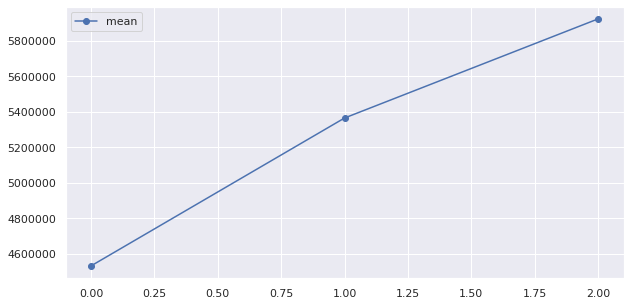

In [119]:
# построим график по второй группе факторов - посмотрим на изменение цены по типу этажа

(eda
 .pivot_table(index='floor_type', values='last_price', aggfunc=['mean'])
 .droplevel(1,axis=1)
 .reset_index()
 .plot(style='o-', grid=True,figsize=[10,5])
)
 
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Рассматривая график корреляции второго фактора - тип этажа квартиры - можно заметить четкую взаимосвязь: что медианные, что средние значения показывают рост цены с каждым повышением этажа, где самые низкие показатели цены наблюдаются у квартир на первом этаже, а самые высокие -  у квартир на последнем этаже. Предположительно, данное стремление обусловлено более высокой рентабельностью и ликвидностью квартир, расположенных выше - квартиры на последнем этаже менее подвержены окружающему шуму, загрязнению воздуха и попыткам проникновения извне, при этом возможно предлагая более "живописный" вид из окон. 

Перейдем к третьей группе факторов:

##### Факторы третьей группы:  даты размещения (день недели, месяц, год)

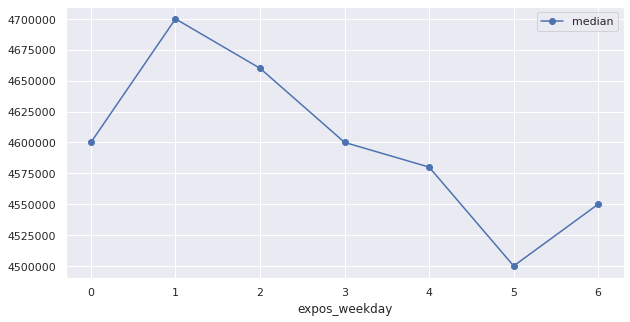

In [120]:
# для последней группы понадобится три отдельных графика, потому напишем функцию

date_list = ['expos_weekday','expos_month', 'expos_year']

def date_price_plot(index):    
    (eda
 .pivot_table(index=date_list[index], values='last_price', aggfunc=['median'])
 .droplevel(1,axis=1) 
 .plot(style='o-', grid=True,figsize=[10,5]))

    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

date_price_plot(0) # изменение цены по дням недели

График показывает заметный рост в понедельник, достигая пикового значения во вторник - и дальнейший спад всю рабочую неделю до субботы, с небольшим ростом в воскресенье. 

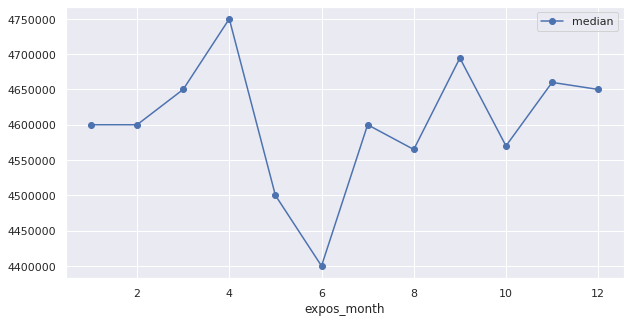

In [121]:
date_price_plot(1) # изменение цены по месяцам

Исходя из данных, можно сделать следующие заключения:

1) В период с января до апреля наблюдается рост цен на квартиры, достигая пикового значения в апреле.

2) С апреля до июня цены падают, достигая наименьшего значения в июне.

3) С июня до декабря идет неравномерный: подьем в июле, небольшой спад в августе, в сентябре появляется второй пик значений - затем идет спад в октябре, подьем в ноябре и слабый спад в декабре.

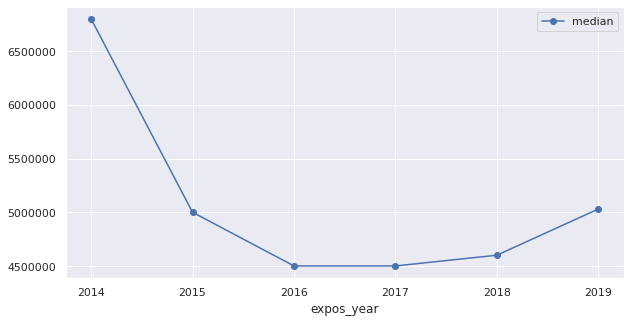

In [122]:
date_price_plot(2) # изменение цены по годам

С 2014 по 2016 идет резкое падение цен, 2016 и 2017 находятся в плато, с 2018 по 2019 заметен небольшой рост.

Далее приводится средняя цена за квадратный метр в 10 самых распространенных населенных пунктах датасета:

In [123]:
locality_list = eda['locality_name'].value_counts().head(10).index.to_list() # создадим список поселений

# сделаем сводную таблицу с указанием средней цены за квадратный метр

(eda
 [eda['locality_name'].isin(locality_list)] 
 .pivot_table(index='locality_name', values='square_price', aggfunc=['count','mean'])
 .droplevel(1,axis=1)
 .sort_values('count', ascending=False)
 .rename(columns={'mean':'mean_price'})
)


count  mean_price
locality_name                       
Санкт-Петербург    13988   109796.91
поселок Мурино       415    85134.34
поселок Шушары       414    77489.85
Всеволожск           353    67247.41
Пушкин               335   102383.83
Колпино              325    75219.09
Гатчина              291    68874.88
поселок Парголово    287    89682.88
деревня Кудрово      243    91821.21
Выборг               219    58171.60

Далее приводится средняя цена по возрастанию среди 10 самых распространенных населенных пунктов в датасете:

locality_name  Санкт-Петербург    Пушкин  деревня Кудрово  поселок Парголово  \
mean_price           109796.91 102383.83         91821.21           89682.88   

locality_name  поселок Мурино  поселок Шушары  Колпино  Гатчина  Всеволожск  \
mean_price           85134.34        77489.85 75219.09 68874.88    67247.41   

locality_name   Выборг  
mean_price    58171.60

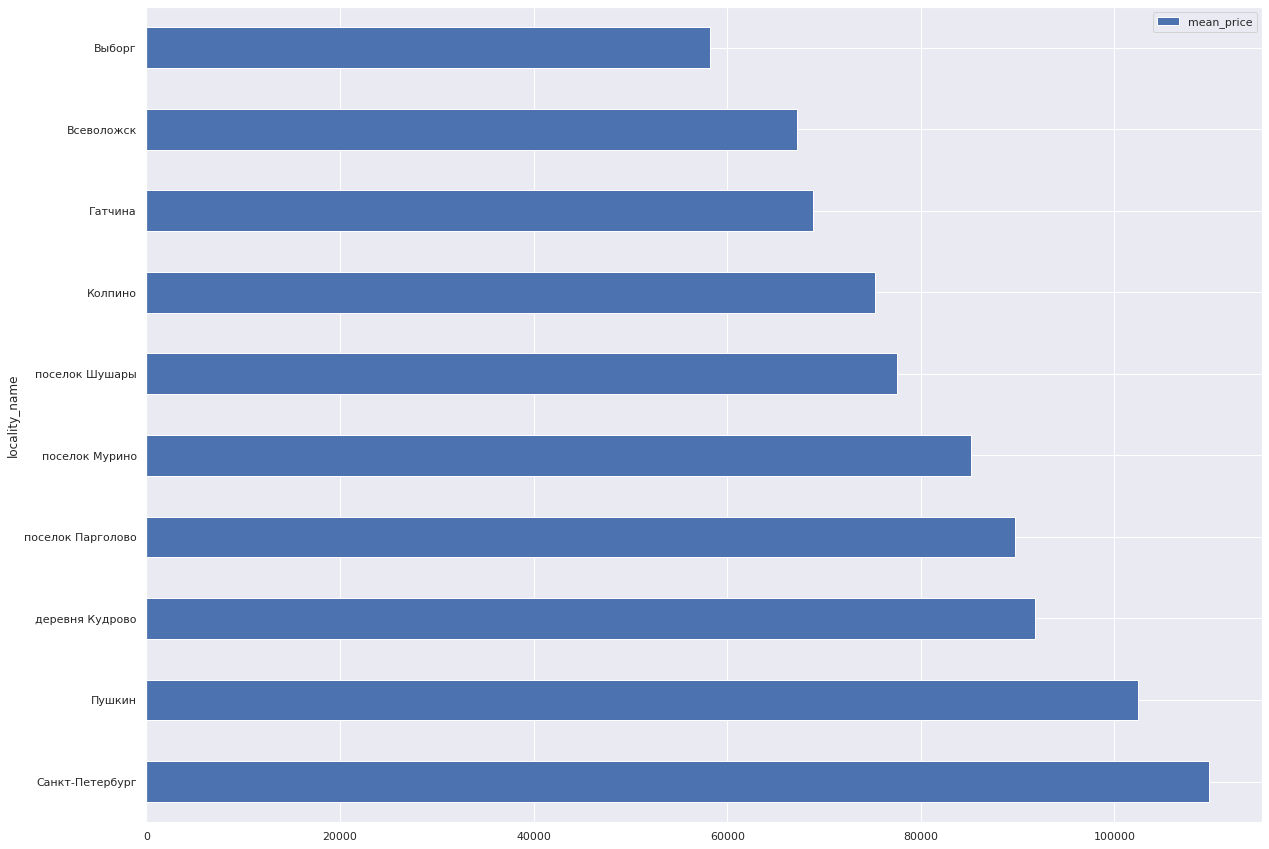

In [124]:
price_list = (eda
 [eda['locality_name'].isin(locality_list)] 
 .pivot_table(index='locality_name', values='square_price', aggfunc=['mean'])
 .droplevel(1,axis=1)
 .sort_values('mean', ascending=False)
 .rename(columns={'mean':'mean_price'})
)

display(price_list.T)

price_list.plot(kind='barh',style='o-',grid=True, figsize=[20,15])
plt.show()

Исходя из данных двух сводных таблиц, можно сделать следующие наблюдения: самая высокая цена за квадратный метр выявлена в Санкт-Петербурге, у него же первое место по количеству объявлений. Самая же низкая цена в городе Выборг, самое малое количество объявлений - в деревне Кудрово.

Далее рассмотрим среднюю цену за квадратный метр в Санкт-Петербурге по километрам от центра города:

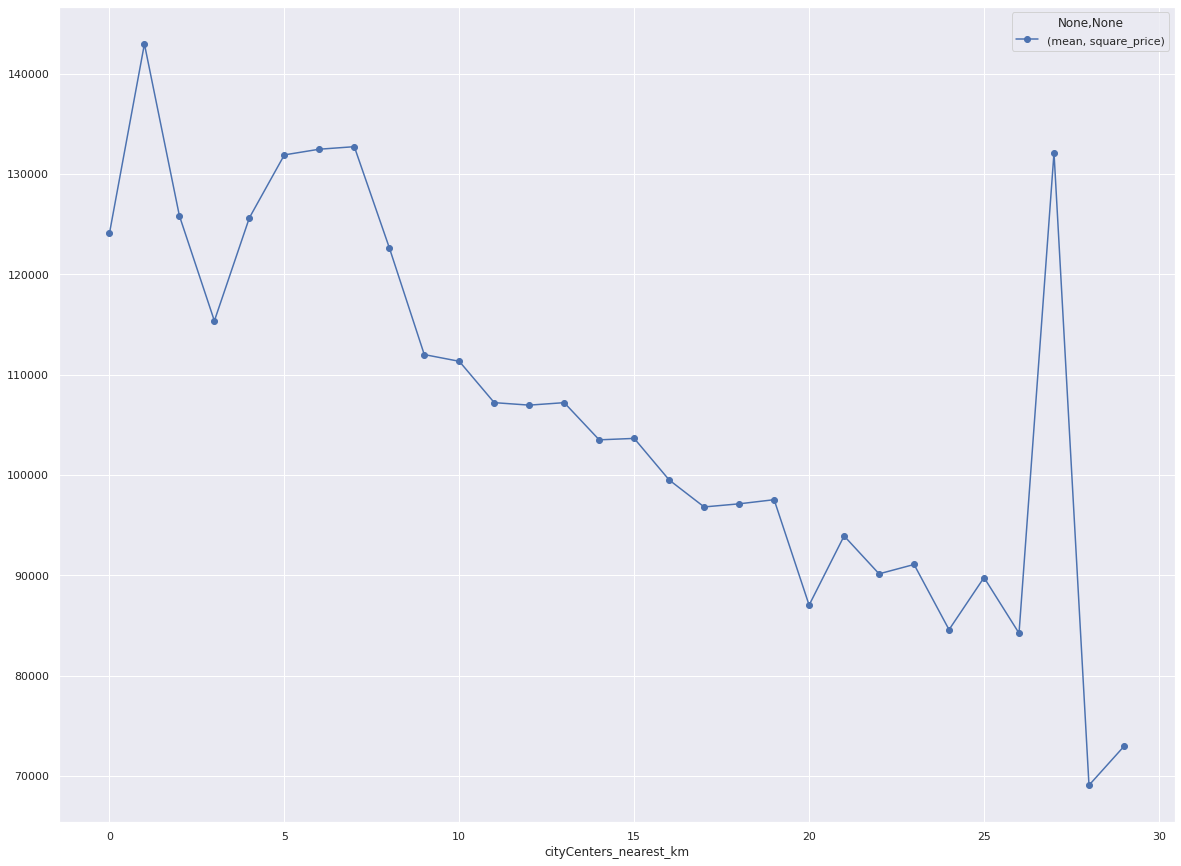

In [125]:
spb_eda = eda[eda['locality_name'] == 'Санкт-Петербург']


pd.pivot_table(spb_eda,
               index=spb_eda['cityCenters_nearest_km'],
               values=['square_price'],
               aggfunc=['mean']
              ).plot(style='o-',
                     grid=True, 
                     figsize=[20,15])

plt.show()

Для более полной картины рассмотрим аналогичный график с общей средней ценой квартиры в Санкт-Петербурге по километрам от центра города:

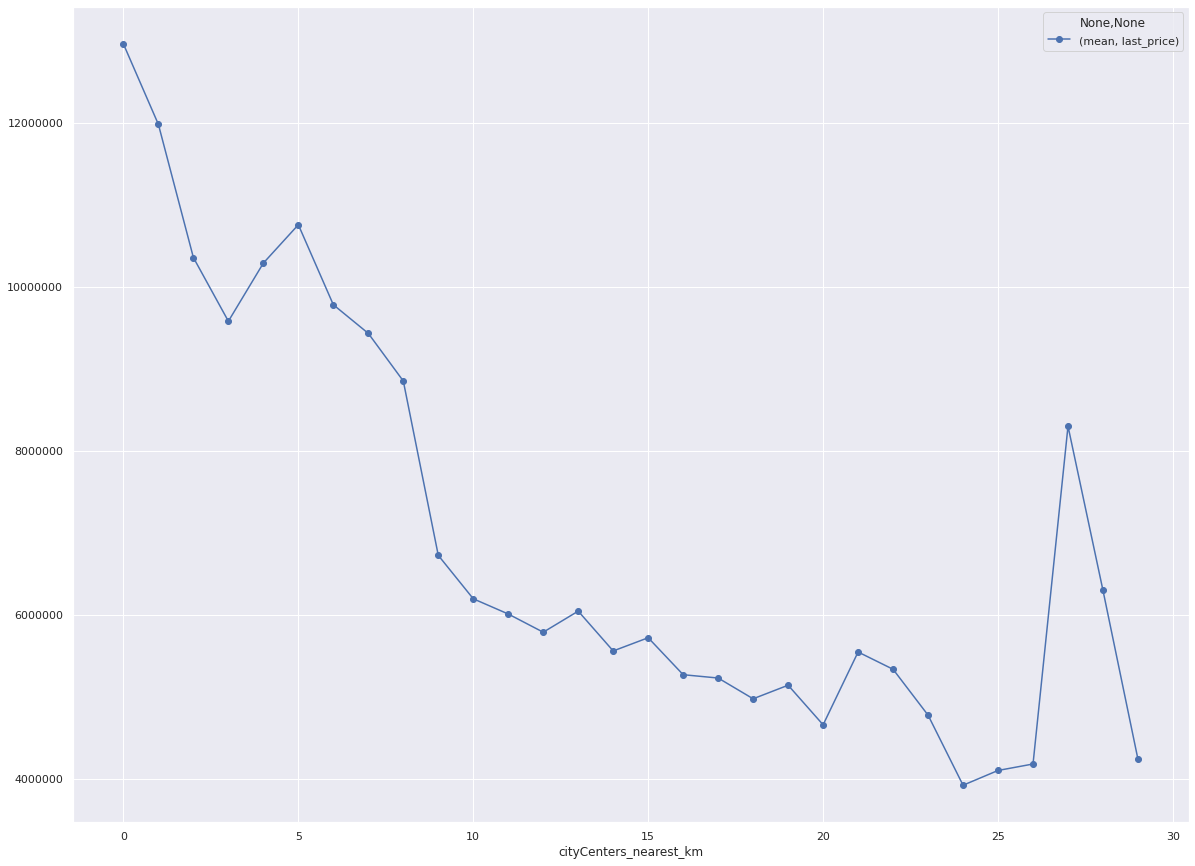

In [126]:
pd.pivot_table(spb_eda,
               index=spb_eda['cityCenters_nearest_km'].round(decimals=0),
               values=['last_price'],
               aggfunc=['mean']
              ).plot(style='o-',
                     grid=True, 
                     figsize=[20,15])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

На графиках видна закономерная тенденция к снижению цен при удалении от центра города. Разница между пиковыми значениями в пределах 5 километров от центра и минимальными значениями в пределах 25-30 километров почти двухкратная. Вместе с этим можно отметить аномальные показатели в крайних значениях графика: после длительного спада на 27 километре начинается новый пик, где стоимость за кв. м. несильно уступает показателям в центре города.
Рассмотрим данные квартир на 27 километре:

In [127]:
eda.query('cityCenters_nearest_km == 27').sort_values(by='square_price', ascending=False).T

2414                 748    \
total_images                             20                   13   
last_price                         29500000             14350000   
total_area                           115.00                74.00   
first_day_exposition    2017-07-21 00:00:00  2017-11-28 00:00:00   
rooms                                     3                    2   
ceiling_height                         3.00                 3.13   
floors_total                              2                    5   
living_area                           69.75                30.00   
floor                                     2                    3   
is_apartment                          False                False   
studio                                False                False   
open_plan                             False                False   
kitchen_area                          19.20                25.00   
balcony                                   4                    0   
locality_name                        Пушкин      Санкт-Петербург   
locality_type                          town                 city   
airports_nearest                   14456.00             23888.00   
cityCenters_nearest                26609.00             27313.00   
parks_around3000                       3.00                 1.00   
parks_nearest                        229.00              1496.00   
ponds_around3000                       3.00                 0.00   
ponds_nearest                        172.00                  NaN   
days_exposition                         328                  128   
square_price                      256521.73            193918.92   
living_area_ratio                      0.61                 0.41   
kitchen_area_ratio                     0.17                 0.34   
cityCenters_nearest_km                27.00                27.00   
expos_weekday                             4                    1   
expos_month                               7                   11   
expos_year                             2017                 2017   
floor_type                             last                other   

                                      12466                140    \
total_images                             11                    8   
last_price                         15000000             16912000   
total_area                            89.62               105.69   
first_day_exposition    2017-01-31 00:00:00  2016-12-09 00:00:00   
rooms                                     3                    2   
ceiling_height                         3.05                 2.70   
floors_total                              3                    3   
living_area                           57.00                48.41   
floor                                     3                    1   
is_apartment                          False                False   
studio                                False                False   
open_plan                             False                False   
kitchen_area                          13.50                15.40   
balcony                                   0                    0   
locality_name                        Пушкин               Пушкин   
locality_type                          town                 town   
airports_nearest                   15065.00             14352.00   
cityCenters_nearest                27218.00             26506.00   
parks_around3000                       3.00                 3.00   
parks_nearest                        317.00               366.00   
ponds_around3000                       3.00                 3.00   
ponds_nearest                        509.00               179.00   
days_exposition                         357                  390   
square_price                      167364.02            160018.92   
living_area_ratio                      0.64                 0.46   
kitchen_area_ratio                     0.15                 0.15   
cityCenters_nearest_km   

Похоже что пик вызван наличием в продаже нескольких десятков квартир высокого ценового сегмента из города Пушкин, контраст которых с остальным жильем в данном радиусе от центра создает аномальный пик на графике. Данное наблюдение согласуется с предыдущими графиками, где город Пушкин находится на втором месте по стоимости квадратного метра квартиры после Санкт-Петербурга.

In [128]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21066 entries, 0 to 23696
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            21066 non-null  int16         
 1   last_price              21066 non-null  int32         
 2   total_area              21066 non-null  float16       
 3   first_day_exposition    21066 non-null  datetime64[ns]
 4   rooms                   21066 non-null  int16         
 5   ceiling_height          21066 non-null  float16       
 6   floors_total            21066 non-null  int16         
 7   living_area             21066 non-null  float16       
 8   floor                   21066 non-null  int16         
 9   is_apartment            21066 non-null  bool          
 10  studio                  21066 non-null  bool          
 11  open_plan               21066 non-null  bool          
 12  kitchen_area            21066 non-null  float1

<a name="5"> </a>
### Общий вывод

[Вернуться в оглавление](#0)

---

Рекомендации

Ниже приведены несколько тезисов, реализация которых поможет значительно улучшить качество анализа данных.

- Необходимо оптимизировать сбор данных путём использования единого набора показателей для всех населёных пунктов, а если это не является возможным (например, расстояние до центра в деревне/посёлке), то необходимо выгружать и анализировать данные отдельно по каждой группе населённых пунктов, имеющих общие признаки.
- Все поля для заполнения клиентами должны быть обязательными, а также иметь разумные ограничения (например, не принимать объявление с высотой потолков 1м или ценой продажи 12,190).
- Необходимо доработать систему расчёта данных на основе картографических показателей - предположительно именно она является основным источником пропущенных значений. Также можно добавить дополнительные параметры, которые могут влиять на стоимость недвижимости (ближайшая станция метро/остановка общественного транспорта, наличии поблизости школ или детских садов, продуктовых магазинов).
- Реализовать автоматическую подгрузку дополнительных данных о недвижимости из открытых источников (например, год постройки дома, округ/район) или дать возможность пользователям заполнить это самим.

Целью исследования являлось установление параметров для определения рыночной стоимости объектов недвижимости, основываясь на данных сервиса Яндекс.Недвижимость - архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Это позволит построить автоматизированную систему, которая сможет отслеживать аномалии и мошенническую деятельность.

При обзоре данных была совершена проверка на возможные ошибки, которые могли помещать исследованию. После была совершена предобработка данных с целью исправления ошибок и обработки пропущенных значений, были изменены типы данных. Затем на основе обработанных данных были расчитаны необходимые дополнительные параметры, что позволило провести полноценный исследовательский анализ данных.

Таким образом, исследование прошло в пять этапов:

- Обзор данных
- Предобработка данных
- Расчёт дополнительных параметров
- Исследовательский анализ данных
- Формирование общего вывода

В ходе предобработки данных было обработано 57.8% пропущенных значений. Было удалено 1.84% датасета, при этом удалось сократить использование памяти на 40.0%.

В изначальном датасете больше половины столбцов содержали пропущенные значения. При детальном рассмотрении выяснилось, что в части из них доля пропусков в среднем составлял около 0.5%, что не может повлиять на результаты исследования, в связи с чем данные были удалены.

В ходе предобработки данных выяснилось, что столбцы с пропусками можно разделить на две группы по возможным причинам возникновения пропусков.

Для столбцов первой группы (ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony) наиболее простым обьяснением является то, что пропуски в данных столбцах являются комбинацией человеческого фактора (невнимательность/неосторожность/ожидание автоматической коррекции от сайта) и/или статусом "дополнительного" столбца на самом сайте (Яндекс.Недвижимость не запрещает разместить недвижимость с отсутствием данных в этих столбцах).

Для столбцов второй группы (locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition) основное предположение о природе пропусков в данных столбцах в том, что пропуски являются технической ошибкой со стороны автоматизированных процессов сайта Яндекс.Недвижимость и/или ошибкой при сборе/выгрузке данных (Данные в столбцах заполняются автоматически, без участия пользователя).

В ходе предобработки к столбцу с названиями населённых пунктов был применён метод категоризации, что стало хорошей опцией для дополнительной группировки данных. Таким образом удалось выяснить, что доля пропущенных значений очень отличается в зависимости от типа поселений - в небольших населенных пунктах, например, пропущено 100% значений столбце с расстоянием до аэропорта, с информацией о парках, прудах и расстоянии до центра города. В категориях более крупных населённых пунктах в этих столбцах пропущено больше половины значений, а вот в категории объявлений из СПБ наоборот - большая часть данных указана. Визуализация этих пропусков показала, что корреляция первых трёх категорий практически совпадает - скорее всего значения пропущены по одной и той же причине. Так как данные в столбцах заполняются автоматически, без участия пользователя, и расчитаны автоматически - это явно указывает на то, что системе хватает ресурсов делать полноценные расчёты только в черте крупных поселений.

Были подробно изучены параметры площади, цены, числа комнат, высоты потолков и времени продажи квартиры. Большая часть данных стремится к нормальному распределению, но при этом содержит много выбросов и провалов на графиках и редких значений, в целом данные распределены неравномерно.

Нормальными значениями (с точки зрения размаха распределения данных) для квартиры являются следующие параметры:

- Общая площадь - от 40м до 68м.
- Общая цена - от 3,48 млн до 6,55 млн.
- Количество комнат - от одной до трёх, количество двухкомнатных и трёхкомнатых квартир сопоставимо друг с другом и составляют большинство значений.
- Высота потолков - от 2.55м до 2.75м. В данных было много аномалий, в том числе высота 1м (невозможно с точки зрения норм строительства) и 100м (нереалистичный показатель)
- Срок продажи - от 45 до 225 дней. Срок меньше полутора месяцев определён как быстрая продажа, больше семи с половиной - слишком долгая. При этом не стоит забывать про 15% квартир, которые не продались за период более 4 лет и 5 месяцев (1617 дней - временной промежуток всего датасета).

В ходе анализа факторов влияния на цену были сделаны следующие выводы:

- Есть значительная корреляция (0.77) между ценой и общей площадью, что вполне логично: так как цена квартиры состоит из цены за квадратный метр площади, то чем больше площадь - тем выше может оказаться стоимость. По убыванию показателя корреляции далее следует жилая площадь (0.67), кухонная площадь (0.6) и количество комнат (0.49). 

- Цена явно зависит от этажа - в среднем самая низкая у квартир на первом этаже, самая высокая - на последнем этаже.

- По дням недели график показывает заметный рост в понедельник, достигая пикового значения во вторник - и дальнейший спад всю рабочую неделю до субботы, с небольшим ростом в воскресенье. 

Динамику цены по месяцам можно описать следующим образом:

1) В период с января до апреля наблюдается рост цен на квартиры, достигая пикового значения в апреле.

2) С апреля до июня цены падают, достигая наименьшего значения в июне.

3) С июня до декабря идет неравномерный: подьем в июле, небольшой спад в августе, в сентябре появляется второй пик значений - затем идет спад в октябре, подьем в ноябре и слабый спад в декабре.

Самая высокая цена за квадратный метр выявлена в Санкт-Петербурге, у него же первое место по количеству объявлений. Самая же низкая цена в городе Выборг, как и самое малое количество объявлений.

Средняя цена каждого километра от центра Санкт-Петербурга показывает закономерное снижение с каждым следующим километром, достигая минимального значения от 20 до 25 километров. Разница между пиковыми значениями в пределах 5 километров от центра и минимальными значениями в пределах 25-30 километров почти двухкратная. Вместе с этим можно отметить аномальные показатели в крайних значениях графика: после длительного спада на 27 километре начинается новый пик, где стоимость за кв. м. несильно уступает показателям в центре города. Похоже что пик вызван наличием в продаже нескольких десятков квартир высокого ценового сегмента из города Пушкин, контраст которых с остальным жильем в данном радиусе от центра создает аномальный пик на графике. Данное наблюдение согласуется с предыдущими графиками, где город Пушкин находится на втором месте по стоимости квадратного метра квартиры после Санкт-Петербурга.

---